# ***Read DF***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
import scipy.stats as st
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.lines import Line2D
from joblib import dump
from joblib import load
#%matplotlib ipympl
#from google.colab import output
#output.enable_custom_widget_manager()

pd.set_option('display.max_columns', None)

# from statsmodels.graphics.tsaplots import plot_acf
#import statsmodels.graphics.correlation as pltcorr
#from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import resample



#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
import scipy.stats as st
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.lines import Line2D
from joblib import dump
from joblib import load
#%matplotlib ipympl
#from google.colab import output
#output.enable_custom_widget_manager()

pd.set_option('display.max_columns', None)

# from statsmodels.graphics.tsaplots import plot_acf
#import statsmodels.graphics.correlation as pltcorr
#from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')



#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
def file_prep(df):
    # convert from csv to pandas dataframe
    df = pd.read_csv(df, sep = ",")  # Using header=None since it seems there's no header in your data.
    return df

diabetesDf = file_prep('/content/drive/MyDrive/Diabetes/diabetes_prediction_dataset.csv')

# generate a numeric value for each HbA1c_level value starting from 0
#diabetesDf['HbA1c_cat'] = diabetesDf['HbA1c_level'].rank(method='dense').astype(int) - 1

# generate a numeric value for each blood_glucose_level value starting from 0d
# diabetesDf['blood_glucose_level_cat'] = diabetesDf['blood_glucose_level'].rank(method='dense').astype(int) - 1


diabetesDf['gender_cat'] = diabetesDf['gender'].str.strip().str.lower().replace({'male': 1, 'female': 0, 'other': 2})


# diabetesDf['diabetes anomaly'] = (((diabetesDf["HbA1c_level"] >= 6.5) |
#                                    (diabetesDf['blood_glucose_level'] >= 200)) &
#                                    (diabetesDf["diabetes"] == 0)).astype(int)

# # Define your custom mapping
smoking_mapping_1 = {
    'never': 0,
    'No Info': 1,
    'current': 2,
    'ever': 3,
    'former': 3,
    'not current': 3
}

# # # Apply the mapping to the recategorized 'smoking_history_cat_2' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history_cat_2'].replace(smoking_mapping_1)



# Apply the new mapping to the 'smoking_history_cat' column
diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)

# Print unique values in the 'smoking_history' column
#print(diabetesDf['smoking_history'].unique())

# Define a function to map the existing categories to new ones
################################################################################################
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
diabetesDf['smoking_history'] = diabetesDf['smoking_history'].apply(recategorize_smoking)

# Check unique values after applying recategorize_smoking
print("Unique values after recategorize_smoking:", diabetesDf['smoking_history'].unique())

################################################################################################

# def recategorize_smoking_1(smoking_status_1):
#     if smoking_status_1 in ['never', 'No Info']:
#         return 'non-smoker'
#     elif smoking_status_1 == 'current':
#         return 'current'
#     elif smoking_status_1 in ['ever', 'former', 'not current']:
#         return 'past_smoker'

# # # Apply the function to the original 'smoking_history' column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].apply(recategorize_smoking_1)
######################################################################################################



# Apply the new mapping to the 'smoking_history_cat' column
#diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)
########################################################################################################

# # Define your custom mapping
# Define a new mapping (modify as needed)
new_smoking_mapping = {
    'non-smoker': 0,
    'current': 1,
    'past_smoker': 2,
    # Add any additional categories here
}



# Apply the new mapping to the 'smoking_history_cat' column
diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].replace(new_smoking_mapping)

# Print unique values in the 'smoking_history' column
print(diabetesDf['smoking_history'].unique())

# Apply the new mapping to the 'smoking_history_cat' column
diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].replace(new_smoking_mapping)

################################################################################################
# def recategorize_smoking_2(smoking_status):
#     if smoking_status in ['never', 'No Info']:
#         return 'non-smoker'
#     elif smoking_status == 'current':
#         return 'current'
#     elif smoking_status in ['ever', 'former', 'not current']:
#         return 'past_smoker'

# # # # Apply the function to the 'smoking_history' column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].apply(recategorize_smoking_2)

# # # # Define your custom mapping
# smoking_mapping = {
#     'non-smoker': 0,
#     'current': 1,
#     'past_smoker': 2}

# # Apply the mapping to your column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history_cat'].replace(smoking_mapping)

################################################################################################


# # Apply the mapping to your column
# diabetesDf['smoking_history_cat'] = diabetesDf['smoking_history'].replace(smoking_mapping)
# def recategorize_smoking(smoking_status):
#     if smoking_status == 'never':
#         return 0
#     elif smoking_status == 'No Info':
#         return 1
#     elif smoking_status in ['ever', 'former', 'not current']:
#         return 2
#     elif smoking_status == 'current':
#         return 3

# # Apply the function to the 'smoking_history' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].apply(recategorize_smoking)


# # # Define your custom mapping
# smoking_mapping_1 = {
#     'non-smoker': 0,
#     'no_info': 1,
#     'current': 2,
#     'past_smoker': 3
# }

# # # # Apply the mapping to the recategorized 'smoking_history_cat_2' column
# # diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history_cat_2'].replace(smoking_mapping_1)



# # Apply the new mapping to the 'smoking_history_cat' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)

# # Print unique values in the 'smoking_history' column
# print(diabetesDf['smoking_history'].unique())

# # Apply the new mapping to the 'smoking_history_cat' column
# diabetesDf['smoking_history_cat_2'] = diabetesDf['smoking_history'].replace(smoking_mapping_1)

################################################################################
# blood_glucose_level_groups based on
def blood_glucose_level_groups(blood_glucose_level):
    if blood_glucose_level < 100:
        return 1  # normal
    elif 100 <= blood_glucose_level <= 125:
        return 2  # pre diabetes
    else:
        return 3  # diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['blood_glucose_level_cat'] = diabetesDf['blood_glucose_level'].apply(blood_glucose_level_groups)
################################################################################

# blood_glucose_level_groups based on
def blood_glucose_level_groups(blood_glucose_level):
    if blood_glucose_level <= 100:
        return 1  # normal
    elif 126 <= blood_glucose_level <= 200:
        return 2  # pre diabetes
    else:
        return 3  # diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['blood_glucose_level_cat_1'] = diabetesDf['blood_glucose_level'].apply(blood_glucose_level_groups)
################################################################################

def age_groups(age):
    if age < 18:
        return 1  # lessed risky diabetes group
    elif 18 <= age <= 44:
        return 2  # higher risky group
    elif 45 <= age <= 64: # higher risk group
        return 3
    else:
        return 4 # highest risk group

# Apply the function to the 'HbA1c_level' column
diabetesDf['age_cat'] = diabetesDf['age'].apply(age_groups)


################################################################################


def categorize_HbA1c_level(HbA1c_level):
    if HbA1c_level < 5.7:
        return 1  # normal
    elif 5.7 <= HbA1c_level <= 6.4:
        return 2  # indicates prediabetes
    elif HbA1c_level >= 6.5:
        return 3  # indicates diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['HbA1c_level_cat'] = diabetesDf['HbA1c_level'].apply(categorize_HbA1c_level)

################################################################################

def categorize_HbA1c_level(HbA1c_level):
    if HbA1c_level < 5.7:
        return 1  # normal
    elif 5.7 <= HbA1c_level <= 6.6:
        return 2  # indicates prediabetes
    elif HbA1c_level >= 6.8:
        return 3  # indicates diabetes

# Apply the function to the 'HbA1c_level' column
diabetesDf['HbA1c_level_cat_2'] = diabetesDf['HbA1c_level'].apply(categorize_HbA1c_level)

################################################################################

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 1     # Underweight
    elif 18.5 <= bmi < 25:
        return 2    # Healthy Weight
    elif 25 <= bmi < 30:
        return 3   # Overweight
    else:
        return 4   # Obesity

# Apply the function to the 'bmi' column
diabetesDf['bmi_cat'] = diabetesDf['bmi'].apply(categorize_bmi)
print(diabetesDf)

################################################################################

print(diabetesDf['smoking_history_cat'].value_counts())

print(diabetesDf)

Unique values after recategorize_smoking: ['non-smoker' 'current' 'past_smoker']
['non-smoker' 'current' 'past_smoker']
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1      non-smoker  25.19   
1      Female  54.0             0              0      non-smoker  27.32   
2        Male  28.0             0              0      non-smoker  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0      non-smoker  27.32   
99996  Female   2.0             0              0      non-smoker  17.37   
99997    Male  66.0             0              0     past_smoker  27.83   
99998  Female  24.0             0              0      non-smoker  35.42   
99999  Female  57.0             0              0       

In [ ]:
print(diabetesDf['smoking_history_cat_2'].unique())
print(diabetesDf['smoking_history_cat'].unique())
print(diabetesDf['smoking_history'].unique())


[0 1 2 3]
[0 1 2]
['non-smoker' 'current' 'past_smoker']


In [ ]:
print(diabetesDf[diabetesDf['blood_glucose_level_cat_1'] == 3])

       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
87     Female  36.0             0              0         current  32.27   
94     Female  60.0             0              0      non-smoker  27.32   
104    Female  80.0             1              0      non-smoker  27.32   
125    Female  77.0             0              0      non-smoker  31.70   
...       ...   ...           ...            ...             ...    ...   
99867    Male  64.0             1              0     past_smoker  33.12   
99897    Male  67.0             0              0         current  27.32   
99938    Male  55.0             0              1     past_smoker  30.42   
99957  Female  61.0             0              0      non-smoker  34.45   
99979  Female  61.0             0              0         current  30.11   

       HbA1c_level  blood_glucose_level  diabetes  gender_cat  \
38             5.7                

In [ ]:
print('Diabetes df:', diabetesDf.shape)
print()
print('Missing values of Diabetes df', diabetesDf.isnull().sum().sum())

Diabetes df: (100000, 18)

Missing values of Diabetes df 0


In [ ]:
# Handle duplicates
duplicate_rows_data = diabetesDf[diabetesDf.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)


number of duplicate rows:  (4032, 18)


In [ ]:
diabetesDf = diabetesDf.drop_duplicates()

In [ ]:
# Loop through each column and count the number of distinct values
for column in diabetesDf.columns:
    num_distinct_values = len(diabetesDf[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 3 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values
gender_cat: 3 distinct values
smoking_history_cat_2: 4 distinct values
smoking_history_cat: 3 distinct values
blood_glucose_level_cat: 3 distinct values
blood_glucose_level_cat_1: 3 distinct values
age_cat: 4 distinct values
HbA1c_level_cat: 3 distinct values
HbA1c_level_cat_2: 3 distinct values
bmi_cat: 4 distinct values


In [ ]:
# Checking null values
print(diabetesDf.isnull().sum())

gender                       0
age                          0
hypertension                 0
heart_disease                0
smoking_history              0
bmi                          0
HbA1c_level                  0
blood_glucose_level          0
diabetes                     0
gender_cat                   0
smoking_history_cat_2        0
smoking_history_cat          0
blood_glucose_level_cat      0
blood_glucose_level_cat_1    0
age_cat                      0
HbA1c_level_cat              0
HbA1c_level_cat_2            0
bmi_cat                      0
dtype: int64


In [ ]:
# Remove Unneccessary value [0.00195%]
diabetesDf = diabetesDf[diabetesDf['gender'] != 'Other']

In [ ]:
diabetesDf.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_cat,smoking_history_cat_2,smoking_history_cat,blood_glucose_level_cat,blood_glucose_level_cat_1,age_cat,HbA1c_level_cat,HbA1c_level_cat_2,bmi_cat
count,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00,95950.00
mean,41.77,0.08,0.04,27.32,5.53,138.22,0.09,0.42,1.14,0.50,2.51,1.75,2.49,1.83,1.66,2.84
std,22.46,0.27,0.20,6.77,1.07,40.92,0.28,0.49,1.12,0.81,0.82,0.50,0.98,0.75,0.55,0.90
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,24.00,0.00,0.00,23.39,4.80,100.00,0.00,0.00,0.00,0.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00,0.00,1.00,0.00,3.00,2.00,2.00,2.00,2.00,3.00
75%,59.00,0.00,0.00,29.87,6.20,159.00,0.00,1.00,2.00,1.00,3.00,2.00,3.00,2.00,2.00,3.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00,1.00,3.00,2.00,3.00,3.00,4.00,3.00,3.00,4.00


In [ ]:
# smoking_history_age = diabetesDf[['smoking_history', 'age']]


# def recategorize_smoking(smoking_status, age):
#     if (smoking_status in ['past_smoker', 'current']) and (age <= 16):
#         return 'non-smoker'
#     else:
#         return smoking_status

# # Applying the function to the DataFrame
# # Assuming 'smoking_history' and 'age' are column names in the diabetesDf DataFrame
# diabetesDf['smoking_history'] = diabetesDf.apply(lambda row: recategorize_smoking(row['smoking_history'], row['age']), axis=1)

# def define_age(age):
#     if age <= 1.5:  # Categorize all ages <= 1.5 years as 1
#         return 1
#     elif age <= 2:  # Categorize ages > 1.5 and <= 2 years as 2
#         return 2
#     else:
#         return age  # Return the actual age for all other cases

# # # Apply the function to the 'age' column
# # # Ensure you are updating the correct column in the DataFrame
# diabetesDf['age'] = diabetesDf['age'].apply(define_age)


# smoking_history_age = diabetesDf[['smoking_history', 'age']]


In [ ]:
import pandas as pd

# Assuming diabetesDf is a pandas DataFrame with 'smoking_history' and 'age' columns
# Sample DataFrame
# diabetesDf = pd.DataFrame({
#     'smoking_history': ['past_smoker', 'current', 'non-smoker', 'past_smoker'],
#     'age': [15, 30, 20, 12]
# })
# 'never' 'No Info' 'current' 'former' 'ever' 'not current' 'non-smoker'
def recategorize_smoking(smoking_status, age):
    if (smoking_status in ['past_smoker', 'current', 'never', 'No Info', 'current', 'former', 'ever', 'not current']) and (age < 16):
        return 'non-smoker'
    else:
        return smoking_status

# Applying the function to the DataFrame
diabetesDf['smoking_history'] = diabetesDf.apply(lambda row: recategorize_smoking(row['smoking_history'], row['age']), axis=1)

# def define_age(age):
#     if age <= 1.5:  # Categorize all ages <= 1.5 years as 1
#         return 1
#     elif age <= 2:  # Categorize ages > 1.5 and <= 2 years as 2
#         return 2
#     else:
#         return age  # Return the actual age for all other cases

# # # Apply the function to the 'age' column
# # # Ensure you are updating the correct column in the DataFrame
# diabetesDf['age'] = diabetesDf['age'].apply(define_age)
diabetesDf = diabetesDf[diabetesDf['age'] >= 1]

diabetesDf = diabetesDf[(diabetesDf['age'] <= 1) | (diabetesDf['age'] >= 2)]


In [ ]:
diabetesDf['age'] = diabetesDf['age'].astype(int)


In [ ]:
age_smoking_crosstab = pd.crosstab(diabetesDf['smoking_history'], diabetesDf['age'])
print(age_smoking_crosstab) # ever, former, non-smoker, not current, current

age              1     2    3    4    5    6    7    8    9    10   11   12  \
smoking_history                                                               
current           0     0    0    0    0    0    0    0    0    0    0    0   
non-smoker       83  1159  995  923  958  900  879  838  756  818  804  859   
past_smoker       0     0    0    0    0    0    0    0    0    0    0    0   

age               13   14   15   16   17   18   19   20   21   22   23   24  \
smoking_history                                                               
current            0    0    0   23   36   78  101  122  146  156  182  172   
non-smoker       909  883  943  901  869  958  970  908  881  869  827  844   
past_smoker        0    0    0   61   74   95  139  148  159  155  182  163   

age               25   26   27   28   29   30   31   32   33   34   35   36  \
smoking_history                                                               
current          174  171  199  194  208  182  177

In [ ]:
print(diabetesDf['smoking_history_cat_2'].unique())
print(diabetesDf['smoking_history_cat'].unique())
print(diabetesDf['smoking_history'].unique())

print(diabetesDf['blood_glucose_level_cat'].unique())
print(diabetesDf['blood_glucose_level_cat_1'].unique())

print(diabetesDf['HbA1c_level_cat_2'].unique())
print(diabetesDf['HbA1c_level_cat'].unique())

[0 1 2 3]
[0 1 2]
['non-smoker' 'current' 'past_smoker']
[3 1 2]
[2 1 3]
[2 1 3]
[3 2 1]


In [ ]:
print(diabetesDf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93937 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     93937 non-null  object 
 1   age                        93937 non-null  int64  
 2   hypertension               93937 non-null  int64  
 3   heart_disease              93937 non-null  int64  
 4   smoking_history            93937 non-null  object 
 5   bmi                        93937 non-null  float64
 6   HbA1c_level                93937 non-null  float64
 7   blood_glucose_level        93937 non-null  int64  
 8   diabetes                   93937 non-null  int64  
 9   gender_cat                 93937 non-null  int64  
 10  smoking_history_cat_2      93937 non-null  int64  
 11  smoking_history_cat        93937 non-null  int64  
 12  blood_glucose_level_cat    93937 non-null  int64  
 13  blood_glucose_level_cat_1  93937 non-null  int

In [ ]:
# print(diabetesDf.describe())

descriptive_diabetes = diabetesDf[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
                                    'blood_glucose_level', 'diabetes', 'gender_cat', 'smoking_history_cat_2', 'blood_glucose_level_cat',
                                    'HbA1c_level_cat_2', 'blood_glucose_level_cat_1', 'HbA1c_level_cat',]]


print(descriptive_diabetes.describe())

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  93937.000000  93937.000000   93937.000000  93937.000000  93937.000000   
mean      42.645816      0.079394       0.041741     27.523283      5.536290   
std       21.886383      0.270354       0.199997      6.677728      1.075061   
min        1.000000      0.000000       0.000000     10.010000      3.500000   
25%       25.000000      0.000000       0.000000     23.700000      4.800000   
50%       44.000000      0.000000       0.000000     27.320000      5.800000   
75%       60.000000      0.000000       0.000000     30.000000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes    gender_cat  smoking_history_cat_2  \
count         93937.000000  93937.000000  93937.000000           93937.000000   
mean            138.330796      0.090284      0.413894               1.147450   
std              41.051207      0.28

# Gradient Boost

In [ ]:
'''
import wandb
# Initialize the WandB API client
api = wandb.Api()

# Specify the project, entity, and run ID
entity_name = "aozk"  # Replace with your entity name or WandB username
project_name = "Diabetes_Classification_1_gradientB"  # Replace with your project name
run_id = "e1oio9iq"  # The run ID

# Fetch the run
run = api.run(f"{entity_name}/{project_name}/{run_id}")

# Access the run details
print(f"Run ID: {run.id}")
print(f"Run Name: {run.name}")
# print(f"Sweep ID: {run.sweep_id}")  # This will print the sweep ID if the run is part of a sweep
'''

'\nimport wandb\n# Initialize the WandB API client\napi = wandb.Api()\n\n# Specify the project, entity, and run ID\nentity_name = "aozk"  # Replace with your entity name or WandB username\nproject_name = "Diabetes_Classification_1_gradientB"  # Replace with your project name\nrun_id = "e1oio9iq"  # The run ID\n\n# Fetch the run\nrun = api.run(f"{entity_name}/{project_name}/{run_id}")\n\n# Access the run details\nprint(f"Run ID: {run.id}")\nprint(f"Run Name: {run.name}")\n# print(f"Sweep ID: {run.sweep_id}")  # This will print the sweep ID if the run is part of a sweep\n'

In [ ]:
import wandb

# Replace 'YOUR_API_KEY' with your actual API key
wandb.login(key='1a537b93f04137770d8cbb64490f630fd3b78339')


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# initial one
# Diabetes_Classification_1_gradientB_NOTALL_INTERACTION_NUMERCI_CAT
# 9vvupwch

# aozk/Diabetes_Classification_1_gradientB_INTERACTION_Complex/zya6v13j

# aozk/Diabetes_Classification_1_gradientB_INTERACTION_Complex_1/yciciffh

In [ ]:
import wandb

# Initialize the WandB API client
api = wandb.Api()

# Specify the project, entity, and run ID
entity_name = "aozk"  # Replace with your entity name or WandB username
project_name = "Diabetes_Classification_1_gradientB_INTERACTION_Complex_1"  # Replace with your project name
run_id = "yciciffh"
# Fetch the run
run = api.run(f"{entity_name}/{project_name}/{run_id}")

# Access the hyperparameters (config) of the run
GB_hyperparameters = run.config

# Print the hyperparameters
print("Hyperparameters:", GB_hyperparameters)


Hyperparameters: {'loss': 'deviance', 'max_depth': 6, 'subsample': 0.7056180210163511, 'max_features': 'log2', 'n_estimators': 356, 'learning_rate': 0.023836462989253952, 'min_samples_leaf': 2, 'min_samples_split': 9}


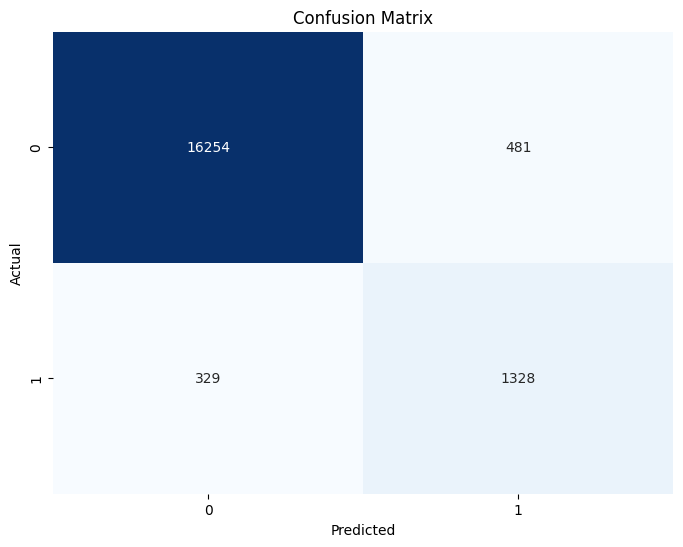

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16735
           1       0.73      0.80      0.77      1657

    accuracy                           0.96     18392
   macro avg       0.86      0.89      0.87     18392
weighted avg       0.96      0.96      0.96     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight

# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df



# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']
# Categorical feature names smoking_history_cat_2

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the gb_model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier

gb_model = GradientBoostingClassifier(**GB_hyperparameters)

class_weights_list = [{0: 1, 1: 4}]

# Assuming you have one set of class weights. If more, iterate over them.
weights = class_weights_list[0]

# Compute sample weights
sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

# Fit the gb_model
gb_model.fit(X_train_processed, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = gb_model.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
GB_classification_report_df = pd.DataFrame(report_dict).transpose()


GB_classification_report_df = GB_classification_report_df[['precision', 'recall', 'f1-score']]


second_row = GB_classification_report_df.iloc[1]

# Convert the filtered row to a new DataFrame
GB_classification_report_df = pd.DataFrame(second_row).transpose()

print(GB_classification_report_df)


   precision    recall  f1-score
1   0.737368  0.801448  0.768074


In [ ]:
print(91960 * .2)
print(91960 - 18392.0)

18392.0
73568.0


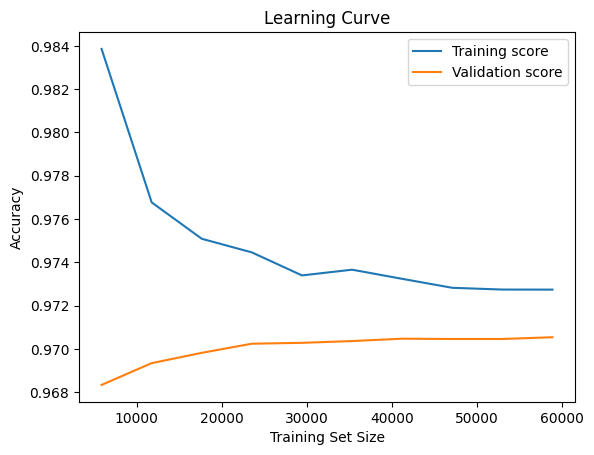

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    gb_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


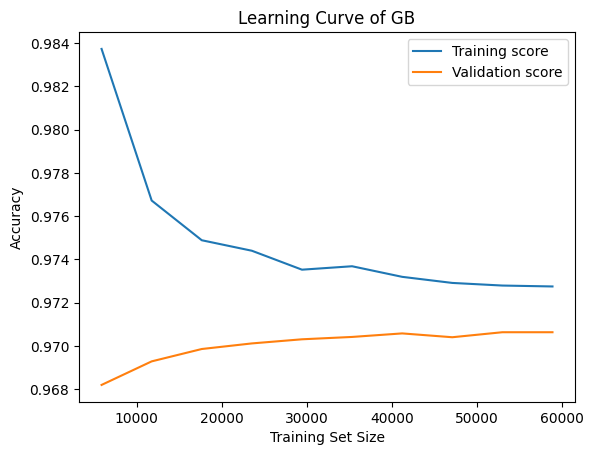

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    gb_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve of GB')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


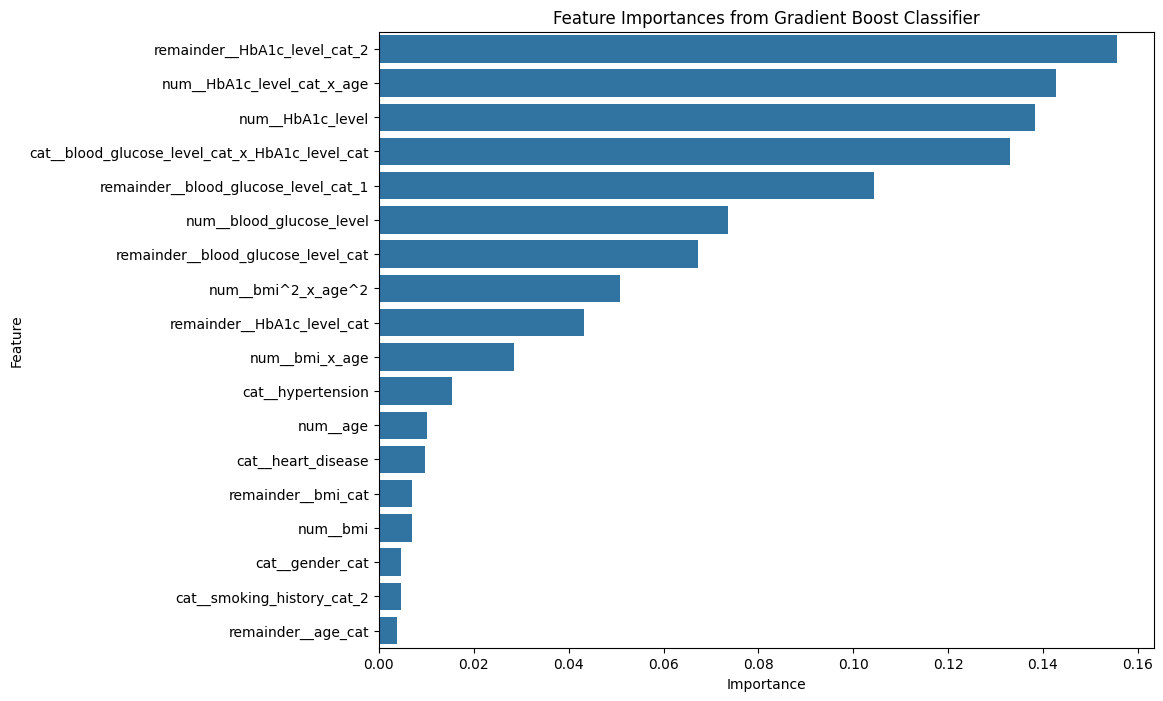

In [ ]:
importances_GB = gb_model.feature_importances_

# Retrieve the feature names from ColumnTransformer
feature_names_GB = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
feature_importance_GB = pd.DataFrame({'Feature': feature_names_GB, 'Importance': importances_GB})

# Sort the DataFrame by importance
feature_importance_GB = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data = feature_importance_GB)
plt.title('Feature Importances from Gradient Boost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ***Resampling Gradient Boost***


In [ ]:
import wandb

# Replace 'YOUR_API_KEY' with your actual API key
wandb.login(key='1a537b93f04137770d8cbb64490f630fd3b78339')


wandb: Currently logged in as: aozk. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True, random_state = 55)

# Sample the data and add interaction terms
sample_size = 20000  #73568 Set your sample size
sample = random_sample(diabetesDf, sample_size)


def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y


# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

sample_with_interactions = add_interaction_terms(sample)

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)
# Generate features and target
X, y = generate_X_y(sample_with_interactions)

X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=55)
print(X_test.shape)
print(X_test.columns)

X_train_initial = preprocessor.fit_transform(X_train_initial)
X_test = preprocessor.transform(X_test)

print(X_test)

(4000, 18)
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')
[[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]


Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')
(58854, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Na

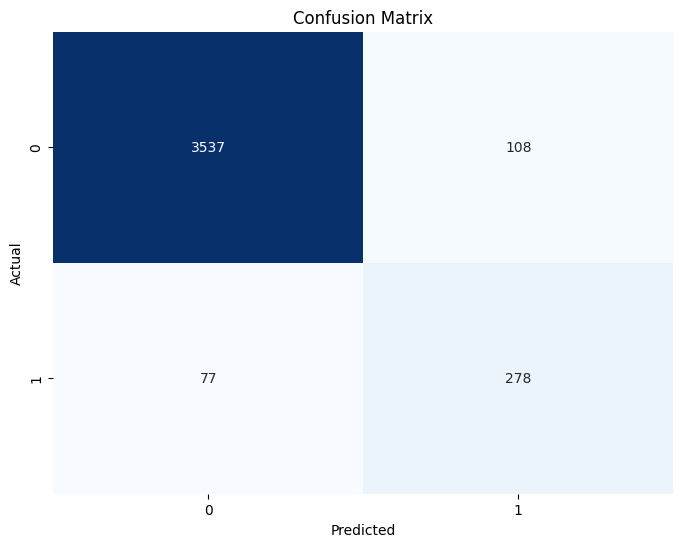

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.72      0.78      0.75       355

    accuracy                           0.95      4000
   macro avg       0.85      0.88      0.86      4000
weighted avg       0.96      0.95      0.95      4000

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')
(58854, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537

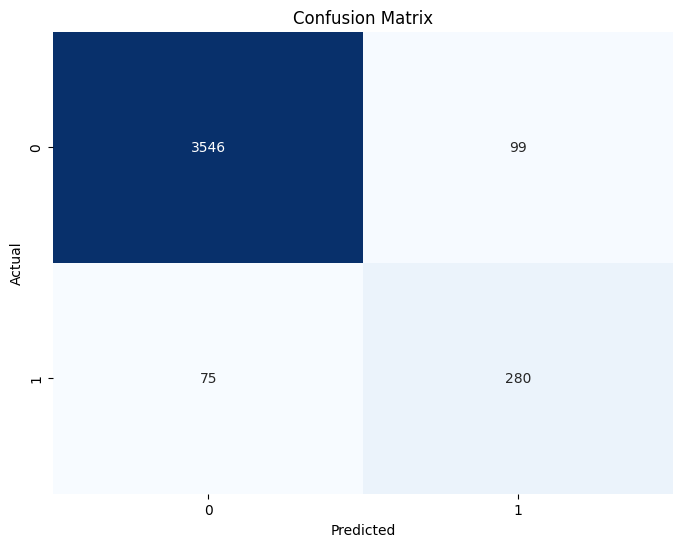

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3645
           1       0.74      0.79      0.76       355

    accuracy                           0.96      4000
   macro avg       0.86      0.88      0.87      4000
weighted avg       0.96      0.96      0.96      4000

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')
(58854, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537

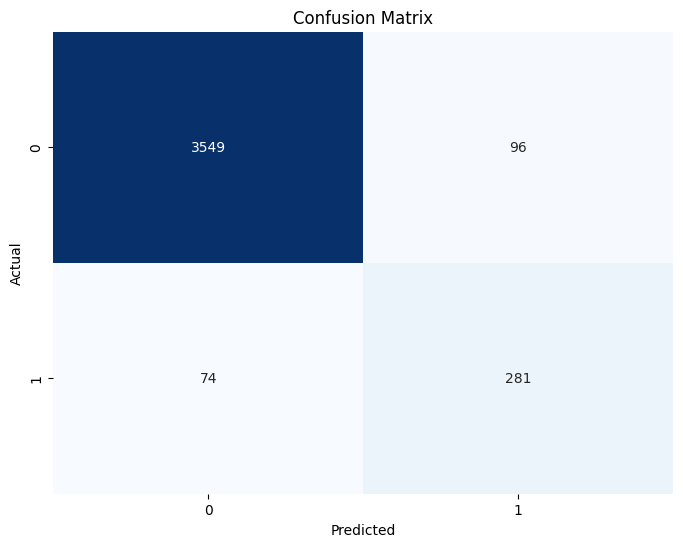

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3645
           1       0.75      0.79      0.77       355

    accuracy                           0.96      4000
   macro avg       0.86      0.88      0.87      4000
weighted avg       0.96      0.96      0.96      4000

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')
(58854, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537

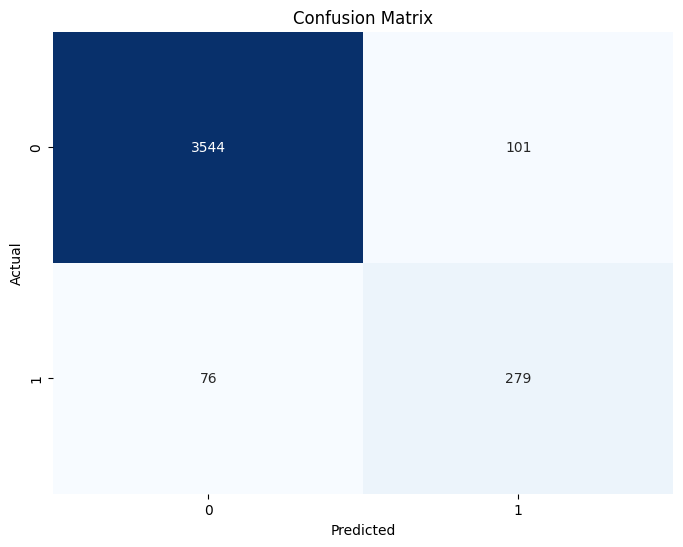

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3645
           1       0.73      0.79      0.76       355

    accuracy                           0.96      4000
   macro avg       0.86      0.88      0.87      4000
weighted avg       0.96      0.96      0.96      4000

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')
(58854, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537

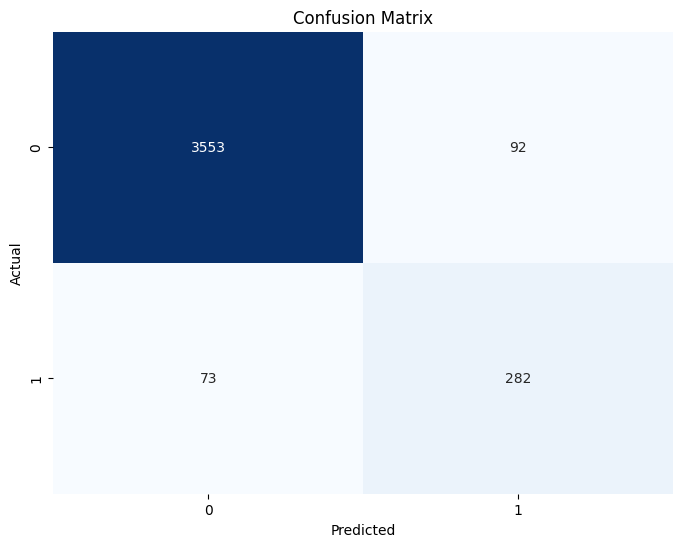

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3645
           1       0.75      0.79      0.77       355

    accuracy                           0.96      4000
   macro avg       0.87      0.88      0.88      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
from sklearn.utils.class_weight import compute_sample_weight


# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


#Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 73568  #73568 Set your sample size
sample = random_sample(diabetesDf, sample_size)

sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

GB_true_labels_pred_list = []  # list for storing true labels, predicted labels, probability

rounds = 5
# X_test gleich bleiben nur X_train ändern jedes mal trainierd und nues
for i in range(rounds):
    # Split the dataset
    X_train, X_test_DoNotUse , y_train, y_train_DoNotUse  = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 45 + i) # , random_state = 45 + i
    print(X_train.columns)
    print(X_train.shape)
    # X_test y_test fixieren
    # Preprocess the data
    X_train = preprocessor.fit_transform(X_train)
    #X_test_DoNotUse = preprocessor.transform(X_test_DoNotUse)
    print('X_test', X_test)
    print('y_test', y_test)

    print('X_train', X_train)
    print('y_train', y_train)
    gb_model = GradientBoostingClassifier(**GB_hyperparameters)

    class_weights_list = [{0: 1, 1: 4}]

    # Assuming you have one set of class weights. If more, iterate over them.
    weights = class_weights_list[0]

    # Compute sample weights
    sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

    # Fit the gb_model
    gb_model.fit(X_train, y_train, sample_weight = sample_weights)

    # Make predictions
    y_pred = gb_model.predict(X_test)

    # Generate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.show()

    # Print the classification report
    print(classification_report(y_test, y_pred))

    y_pred = gb_model.predict_proba(X_test)
    prob_class_1 = y_pred[:, 1]  # Probabilities for class 1
    y_pred_classes = gb_model.predict(X_test)

    # Create a DataFrame
    GB_true_labels_pred = pd.DataFrame({
        'True_Label': y_test,
        'Predicted_Label': y_pred_classes,
        'Predicted_Probability': prob_class_1
    })

    # Append the DataFrame to the list
    GB_true_labels_pred_list.append(GB_true_labels_pred)


In [ ]:
GB_true_labels_pred_1, GB_true_labels_pred_2, GB_true_labels_pred_3, GB_true_labels_pred_4, GB_true_labels_pred_5 = GB_true_labels_pred_list


In [ ]:
print(GB_true_labels_pred_4[(GB_true_labels_pred_4["Predicted_Label"] == 0) &  (GB_true_labels_pred_4["Predicted_Probability"] > 0.5)])
print(GB_true_labels_pred_4[(GB_true_labels_pred_4["Predicted_Label"] == 1) &  (GB_true_labels_pred_4["Predicted_Probability"] < 0.5)])

Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


In [ ]:
GB_existing_thresholds = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
                      0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
                      0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
                      0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
                      0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
                      0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
                      0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                      0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.35 ,0.4, 0.5, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
                      0.68, 0.69 ,0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.961, 0.962, 0.963, 0.9634
                          ]

# Generating new threshold values from 0.014 to 0.1 in increments of 0.001
GB_new_thresholds = np.arange(0.014, 0.101, 0.001).tolist()

# Combine existing and new thresholds
GB_combined_thresholds = GB_existing_thresholds + GB_new_thresholds
GB_combined_thresholds.sort()

print(GB_combined_thresholds)

[0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.011, 0.012, 0.013, 0.014, 0.014, 0.015, 0.016, 0.016999999999999998, 0.017999999999999995, 0.018999999999999996, 0.019999999999999997, 0.020999999999999994, 0.021999999999999992, 0.022999999999999993, 0.023999999999999994, 0.02499999999999999, 0.02599999999999999, 0.02699999999999999, 0.02799999999999999, 0.028999999999999988, 0.029999999999999985, 0.030999999999999986, 0.

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_GB, recall_GB, GB_thresholds = precision_recall_curve(y_test, prob_class_1)


In [ ]:

GB_true_labels_pred_1, GB_true_labels_pred_2, GB_true_labels_pred_3, GB_true_labels_pred_4, GB_true_labels_pred_5 = GB_true_labels_pred_list

def GB_Precision_Recall_MyFunction(df, thresholds, min_positives = 1):
    results = {}

    for threshold in thresholds:
        # Calculate Predicted_Label based on the current threshold
        df['Predicted_Label'] = (df['Predicted_Probability'] >= threshold).astype(int)

        # Calculate TP, FP, and FN for each threshold
        TP = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 1)).sum()
        FP = ((df['True_Label'] == 0) & (df['Predicted_Label'] == 1)).sum()
        FN = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 0)).sum()

        num_predicted_positives = TP + FP                     # (TP + FP)

        if num_predicted_positives >= min_positives:
            precision = TP / num_predicted_positives         # Precision = TP / (TP + FP)
            recall = TP / (TP + FN) if TP + FN != 0 else 0   # Recall = TP / (TP + FN
        else:
            precision =  1.0 # or set to a specific value
            recall = 0.000766  # or set to a specific value

        results[threshold] = {'TP': TP, 'FP': FP, 'FN': FN, 'Precision': precision, 'Recall': recall}

    return results


# # Example usage
# threshold_values_ = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
#                     0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
#                     0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
#                     0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
#                     0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
#                     0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
#                     0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
#                     0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.96]

GB_threshold_values =  GB_thresholds #GB_combined_thresholds
#threshold_values = list_of_thresholds
GB_result_1 = GB_Precision_Recall_MyFunction(GB_true_labels_pred_1, GB_threshold_values) # df = true_labels_pred, thresholds = threshold_values
GB_result_2 = GB_Precision_Recall_MyFunction(GB_true_labels_pred_2, GB_threshold_values) # df = true_labels_pred, thresholds = threshold_values
GB_result_3 = GB_Precision_Recall_MyFunction(GB_true_labels_pred_3, GB_threshold_values) # df = true_labels_pred, thresholds = threshold_values
GB_result_4 = GB_Precision_Recall_MyFunction(GB_true_labels_pred_4, GB_threshold_values) # df = true_labels_pred, thresholds = threshold_values
GB_result_5 = GB_Precision_Recall_MyFunction(GB_true_labels_pred_5, GB_threshold_values) # df = true_labels_pred, thresholds = threshold_values


# Function to create a DataFrame from the result
def GB_create_prc_df(result):
    precision_values = [v['Precision'] for v in result.values()]
    recall_values = [v['Recall'] for v in result.values()]
    return pd.DataFrame({
        'Threshold': list(result.keys()),
        'Precision': precision_values,
        'Recall': recall_values
    })

# Creating DataFrames for each set of results
GB_Precision_Recall_MyFunction_df_1 = GB_create_prc_df(GB_result_1)
GB_Precision_Recall_MyFunction_df_2 = GB_create_prc_df(GB_result_2)
GB_Precision_Recall_MyFunction_df_3 = GB_create_prc_df(GB_result_3)
GB_Precision_Recall_MyFunction_df_4 = GB_create_prc_df(GB_result_4)
GB_Precision_Recall_MyFunction_df_5 = GB_create_prc_df(GB_result_5)

# print(GB_Precision_Recall_MyFunction_df)

# Precision_at_thresholds_1 = GB_Precision_Recall_MyFunction_df[['Precision']]
# Recall_at_thresholds_1 = GB_Precision_Recall_MyFunction_df[['Recall']]

In [ ]:
print(GB_Precision_Recall_MyFunction_df_3)

      Threshold  Precision    Recall
0      0.000605   0.089106  1.000000
1      0.000614   0.089263  1.000000
2      0.000618   0.089286  1.000000
3      0.000623   0.089331  1.000000
4      0.000628   0.089421  1.000000
...         ...        ...       ...
3881   0.998337   1.000000  0.008451
3882   0.998343   1.000000  0.008451
3883   0.998364   1.000000  0.008451
3884   0.998365   1.000000  0.008451
3885   0.998505   1.000000  0.002817

[3886 rows x 3 columns]


In [ ]:
# Target recall
target_recall = 0.85

# Find the index where recall is closest to the target recall
closest_index = np.argmin(np.abs(recall - target_recall))
closest_recall = recall[closest_index]

closest_index, closest_recall

In [ ]:
# def sort_precision_recall(precision, recall, thresholds):
#     # Combine into a single data frame
#     pr_data = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds})
#     # Sort by recall
#     pr_data_sorted = pr_data.sort_values('recall', inplace=False)
#     return pr_data_sorted['precision'], pr_data_sorted['recall'], pr_data_sorted['thresholds']

# # Sort each precision-recall set
# GB_precision_1, GB_recall_1, GB_thresholds_1 = sort_precision_recall(GB_precision_1, GB_recall_1, GB_thresholds_1)
# GB_precision_2, GB_recall_2, GB_thresholds_2 = sort_precision_recall(GB_precision_2, GB_recall_2, GB_thresholds_2)
# GB_precision_3, GB_recall_3, GB_thresholds_3 = sort_precision_recall(GB_precision_3, GB_recall_3, GB_thresholds_3)
# GB_precision_4, GB_recall_4, GB_thresholds_4 = sort_precision_recall(GB_precision_4, GB_recall_4, GB_thresholds_4)
# GB_precision_5, GB_recall_5, GB_thresholds_5 = sort_precision_recall(GB_precision_5, GB_recall_5, GB_thresholds_5)

<Figure size 1400x600 with 0 Axes>

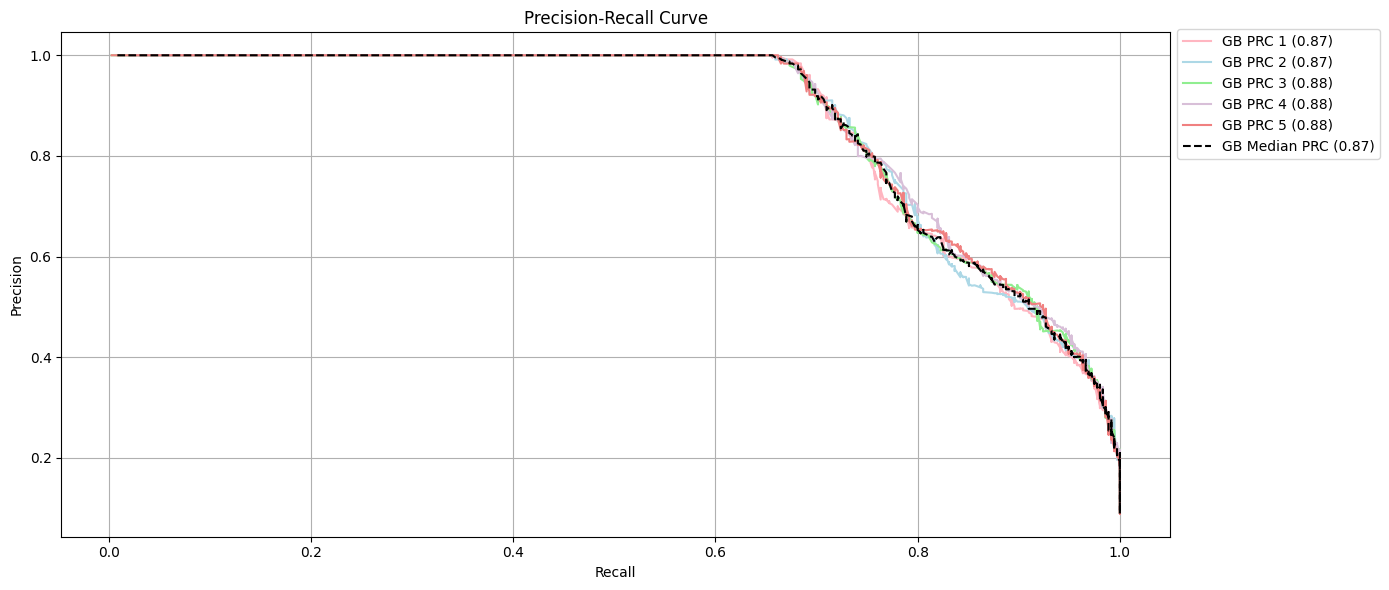

In [ ]:

########################################################################
plt.figure(figsize=(14, 6))

GB_precision_1 = GB_Precision_Recall_MyFunction_df_1['Precision']
GB_recall_1 = GB_Precision_Recall_MyFunction_df_1['Recall']
GB_thresholds_1 = GB_Precision_Recall_MyFunction_df_1['Threshold']

GB_precision_2 = GB_Precision_Recall_MyFunction_df_2['Precision']
GB_recall_2 = GB_Precision_Recall_MyFunction_df_2['Recall']
GB_thresholds_2 = GB_Precision_Recall_MyFunction_df_2['Threshold']

GB_precision_3 = GB_Precision_Recall_MyFunction_df_3['Precision']
GB_recall_3 = GB_Precision_Recall_MyFunction_df_3['Recall']
GB_thresholds_3 = GB_Precision_Recall_MyFunction_df_3['Threshold']

GB_precision_4 = GB_Precision_Recall_MyFunction_df_4['Precision']
GB_recall_4 = GB_Precision_Recall_MyFunction_df_4['Recall']
GB_thresholds_4 = GB_Precision_Recall_MyFunction_df_4['Threshold']

GB_precision_5 = GB_Precision_Recall_MyFunction_df_5['Precision']
GB_recall_5 = GB_Precision_Recall_MyFunction_df_5['Recall']
GB_thresholds_5 = GB_Precision_Recall_MyFunction_df_5['Threshold']

def sort_precision_recall(precision, recall, thresholds):
    # Combine into a single data frame
    pr_data = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds})
    # Sort by recall
    pr_data_sorted = pr_data.sort_values('recall', inplace=False)
    return pr_data_sorted['precision'], pr_data_sorted['recall'], pr_data_sorted['thresholds']

# Sort each precision-recall set
GB_precision_1, GB_recall_1, GB_thresholds_1 = sort_precision_recall(GB_precision_1, GB_recall_1, GB_thresholds_1)
GB_precision_2, GB_recall_2, GB_thresholds_2 = sort_precision_recall(GB_precision_2, GB_recall_2, GB_thresholds_2)
GB_precision_3, GB_recall_3, GB_thresholds_3 = sort_precision_recall(GB_precision_3, GB_recall_3, GB_thresholds_3)
GB_precision_4, GB_recall_4, GB_thresholds_4 = sort_precision_recall(GB_precision_4, GB_recall_4, GB_thresholds_4)
GB_precision_5, GB_recall_5, GB_thresholds_5 = sort_precision_recall(GB_precision_5, GB_recall_5, GB_thresholds_5)



GB_median_precision = np.median([GB_precision_1, GB_precision_2, GB_precision_3, GB_precision_4, GB_precision_5], axis=0)
GB_median_recall = np.median([GB_recall_1, GB_recall_2, GB_recall_3, GB_recall_4, GB_recall_5], axis=0)

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']


def sort_and_calculate_auc(recall, precision):
    # Combine recall and precision into a single array and sort by recall
    recall_precision = sorted(zip(recall, precision), key=lambda x: x[0])
    sorted_recall, sorted_precision = zip(*recall_precision)

    # Calculate AUC
    return auc(sorted_recall, sorted_precision)


# Calculate Average Precision (AP) for each dataset
# Calculate Average Precision (AP) for each dataset
GB_AP_1 = sort_and_calculate_auc(GB_recall_1, GB_precision_1)
GB_AP_2 = sort_and_calculate_auc(GB_recall_2, GB_precision_2)
GB_AP_3 = sort_and_calculate_auc(GB_recall_3, GB_precision_3)
GB_AP_4 = sort_and_calculate_auc(GB_recall_4, GB_precision_4)
GB_AP_5 = sort_and_calculate_auc(GB_recall_5, GB_precision_5)
GB_AP_M = sort_and_calculate_auc(GB_median_recall, GB_median_precision)


# Plotting the Precision-Recall curves
plt.figure(figsize=(14, 6))
plt.plot(GB_recall_1, GB_precision_1, label=f'GB PRC 1 ({GB_AP_1:.2f})', color=colors[0])
plt.plot(GB_recall_2, GB_precision_2, label=f'GB PRC 2 ({GB_AP_2:.2f})', color=colors[1])
plt.plot(GB_recall_3, GB_precision_3, label=f'GB PRC 3 ({GB_AP_3:.2f})', color=colors[2])
plt.plot(GB_recall_4, GB_precision_4, label=f'GB PRC 4 ({GB_AP_5:.2f})', color=colors[3])
plt.plot(GB_recall_5, GB_precision_5, label=f'GB PRC 5 ({GB_AP_5:.2f})', color=colors[4])
plt.plot(GB_median_recall, GB_median_precision, label= f'GB Median PRC ({GB_AP_M:.2f})', color=colors[5], linestyle='--')



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Place a legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


In [ ]:
# Target recall
target_recall = 0.4

# Find the index where recall is closest to the target recall
closest_index = np.argmin(np.abs(GB_recall_3 - target_recall))
closest_recall = GB_recall_3[closest_index]

closest_index, closest_recall

(157, 1.0)

In [ ]:
GB_precision_3
GB_thresholds_3

3885    0.998505
3879    0.998260
3880    0.998281
3884    0.998365
3882    0.998343
          ...   
1300    0.001520
1301    0.001521
1302    0.001521
1274    0.001507
1942    0.002000
Name: thresholds, Length: 3886, dtype: float64

In [ ]:
chosen_precision = GB_precision_3[157]
chosen_threshold = GB_thresholds_3[157]

print(chosen_precision,"|", 'Threshold:', chosen_threshold)

0.09545576767948373 | Threshold: 0.0008531905257005693


# GB Histogram

In [ ]:
GB_true_labels_pred_1, GB_true_labels_pred_2, GB_true_labels_pred_3, GB_true_labels_pred_4, GB_true_labels_pred_5 = GB_true_labels_pred_list

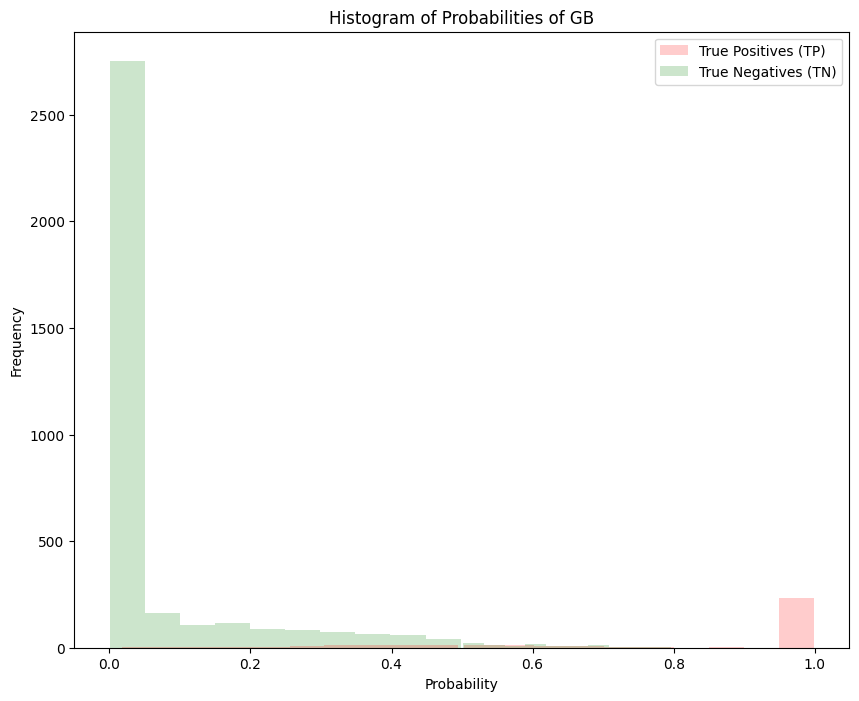

In [ ]:
TP = GB_true_labels_pred_3[(GB_true_labels_pred_3['True_Label'] == 1) & (GB_true_labels_pred_3['Predicted_Label'] == 1)]
TN = GB_true_labels_pred_3[(GB_true_labels_pred_3['True_Label'] == 0) & (GB_true_labels_pred_3['Predicted_Label'] == 0)]
FP = GB_true_labels_pred_3[(GB_true_labels_pred_3['True_Label'] == 0) & (GB_true_labels_pred_3['Predicted_Label'] == 1)]
FN = GB_true_labels_pred_3[(GB_true_labels_pred_3['True_Label'] == 1) & (GB_true_labels_pred_3['Predicted_Label'] == 0)]

TP = TP[['Predicted_Probability']]
TN = TN[['Predicted_Probability']]
FP = FP[['Predicted_Probability']]
FN = FN[['Predicted_Probability']]
# Set the size of the figure
plt.figure(figsize=(10, 8))  # Width=12 inches, Height=8 inches, for example

# Assuming prob_TP, prob_TN, prob_FP, prob_FN are your arrays of probability values
plt.hist(TP, bins=10, alpha=0.2, color='red', label='True Positives (TP)')  # Blue for TP
plt.hist(TN, bins=10, alpha=0.2, color='green', label='True Negatives (TN)')  # Same color for FN

plt.hist(FN, bins=10, alpha=0.2, color='red')  # Green for TN
plt.hist(FP, bins=10, alpha=0.2, color='green')  # Same color for FP

plt.title('Histogram of Probabilities of GB')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()  # Adds a legend to distinguish the different histograms
plt.show()


# XG BOOST

In [ ]:
import wandb

# Replace 'YOUR_API_KEY' with your actual API key
wandb.login(key='1a537b93f04137770d8cbb64490f630fd3b78339')


wandb: Currently logged in as: aozk. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# aozk/Diabetes_WCW_BMI_AGE_CAT_INTERACTIONS_XG_recallMax/8tn7medd best model

In [ ]:
import wandb

# Initialize the WandB API client
api = wandb.Api()

# Specify the project, entity, and run ID
entity_name = "aozk"  # Replace with your entity name or WandB username
project_name = "Diabetes_WCW_BMI_AGE_CAT_INTERACTIONS_XG_recallMax"  # Replace with your project name
run_id = "8tn7medd"
# Fetch the run
run = api.run(f"{entity_name}/{project_name}/{run_id}")

# Access the hyperparameters (config) of the run
XGB_hyperparameters = run.config

# Print the hyperparameters
print("Hyperparameters:", XGB_hyperparameters)


Hyperparameters: {'gamma': 2.0656885664152327, 'max_depth': 4, 'objective': 'binary:logistic', 'reg_alpha': 0.1034061883116515, 'subsample': 0.8487967144301252, 'reg_lambda': 1.439060422705018, 'eval_metric': 'logloss', 'tree_method': 'gpu_hist', 'n_estimators': 384, 'learning_rate': 0.021246762152162965, 'max_delta_step': 0, 'colsample_bytree': 0.6012962846453576, 'min_child_weight': 1, 'scale_pos_weight': 4}


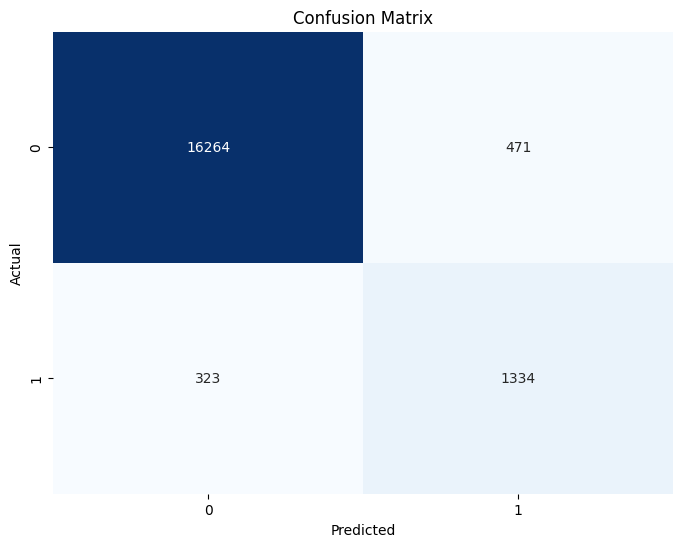

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16735
           1       0.74      0.81      0.77      1657

    accuracy                           0.96     18392
   macro avg       0.86      0.89      0.87     18392
weighted avg       0.96      0.96      0.96     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms: "bmi_cat_x_age",
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
# hyperparameters = {...}
XG_model = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = XG_model.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
XGB_classification_report_df = pd.DataFrame(report_dict).transpose()


XGB_classification_report_df = XGB_classification_report_df[['precision', 'recall', 'f1-score']]


second_row = XGB_classification_report_df.iloc[1]

# Convert the filtered row to a new DataFrame
XGB_classification_report_df = pd.DataFrame(second_row).transpose()

print(XGB_classification_report_df)


   precision    recall  f1-score
1   0.739058  0.805069  0.770653


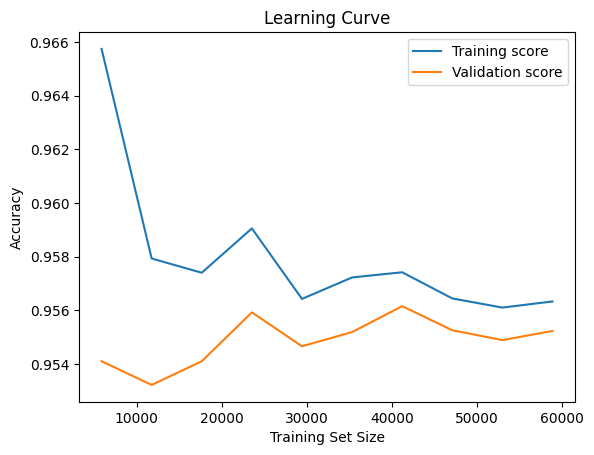

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    XG_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


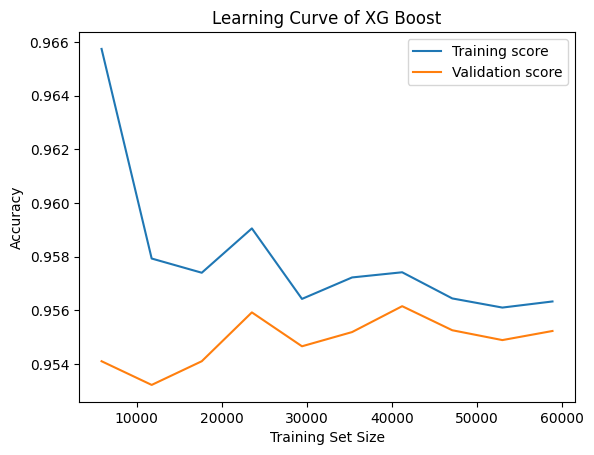

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    XG_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve of XG Boost')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


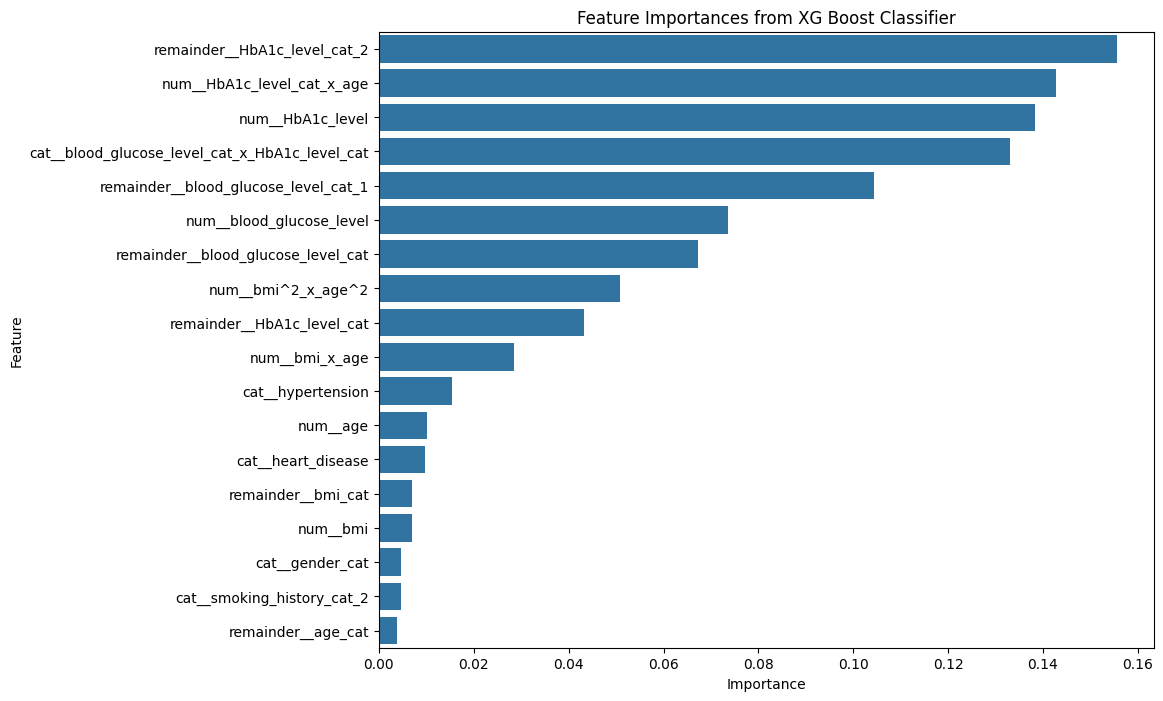

In [ ]:
importances_XGB = XG_model.feature_importances_

# Retrieve the feature names from ColumnTransformer
feature_names_XGB = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
feature_importance_XGB = pd.DataFrame({'Feature': feature_names_XGB, 'Importance': importances_XGB})

# Sort the DataFrame by importance
feature_importance_XGB = feature_importance_XGB.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_XGB)
plt.title('Feature Importances from XG Boost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Resampling XG BOOST

In [ ]:
import wandb

# Replace 'YOUR_API_KEY' with your actual API key
wandb.login(key='1a537b93f04137770d8cbb64490f630fd3b78339')


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True, random_state = 55)

# Sample the data and add interaction terms
sample_size = 20000  #73568 Set your sample size
sample = random_sample(diabetesDf, sample_size)


def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y


num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

sample_with_interactions = add_interaction_terms(sample)

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)
# Generate features and target
X, y = generate_X_y(sample_with_interactions)

X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=55)
# print(X_test.shape)
# print(X_test.columns)

X_train_initial = preprocessor.fit_transform(X_train_initial)
X_test = preprocessor.transform(X_test)

print(X_test)

[[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]


X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.52348625  0.01854643  0.28478353 ...  1.          1.
   3.        ]
 [-0.98654288 -0.85975467 -0.92857629 ...  1.          1.
   2.        ]
 [-1.00435275 -0.68043552 -0.57346782 ...  1.          1.
   4.        ]
 ...
 [ 0.01080987  1.45313758  1.37809461 ...  1.          1.
   3.        ]
 [ 1.22188107  0.85791613  0.97836033 ...  2.          2.
   3.        ]


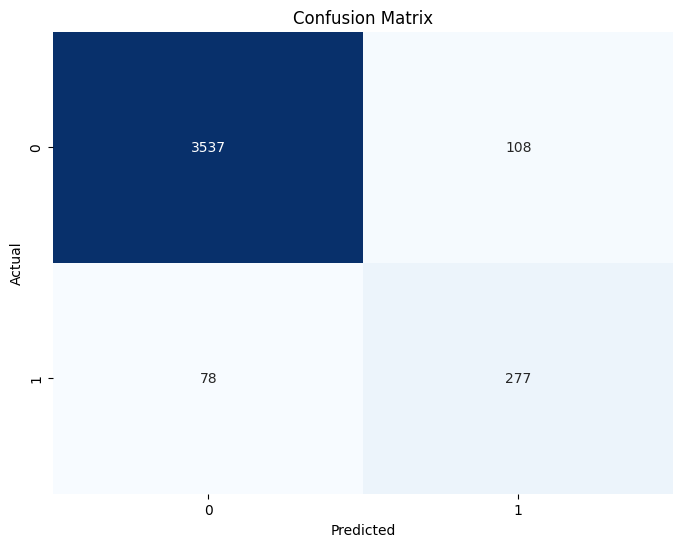

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.72      0.78      0.75       355

    accuracy                           0.95      4000
   macro avg       0.85      0.88      0.86      4000
weighted avg       0.96      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.2197099   0.07977311  0.34343865 ...  

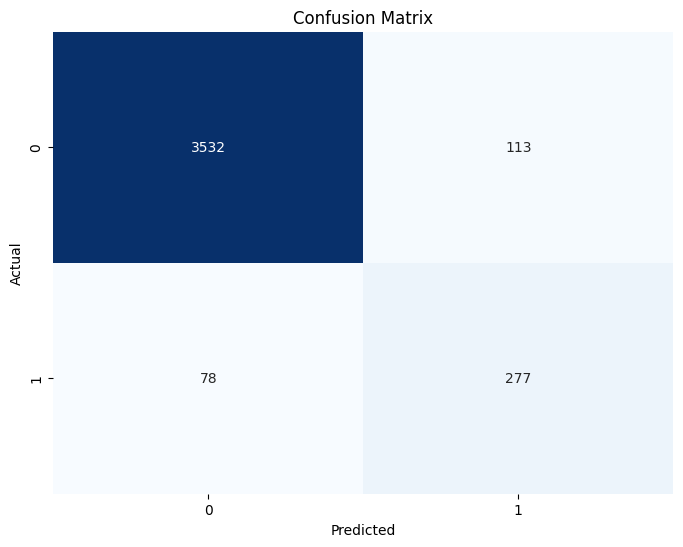

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.71      0.78      0.74       355

    accuracy                           0.95      4000
   macro avg       0.84      0.87      0.86      4000
weighted avg       0.95      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.64774177 -0.55822795 -0.3843792  ...  

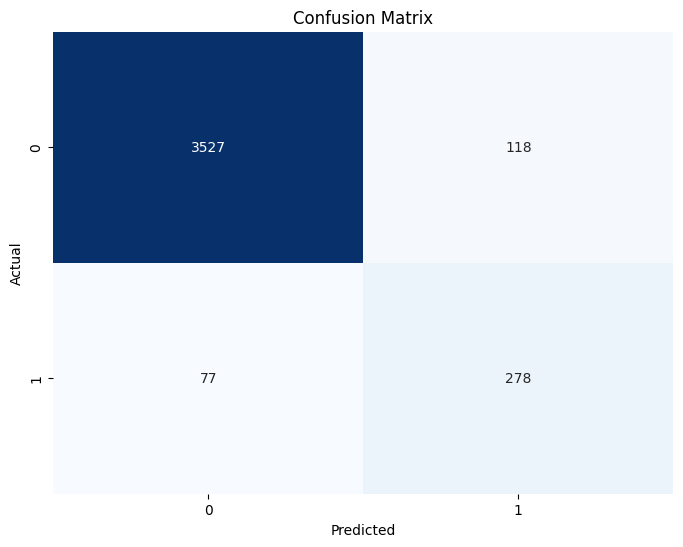

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.70      0.78      0.74       355

    accuracy                           0.95      4000
   macro avg       0.84      0.88      0.86      4000
weighted avg       0.95      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[ 0.26242792 -0.5419245  -0.36056972 ...  

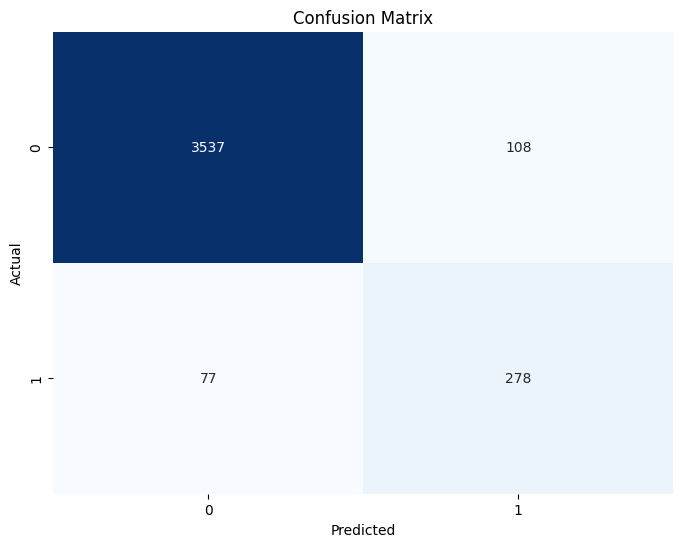

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.72      0.78      0.75       355

    accuracy                           0.95      4000
   macro avg       0.85      0.88      0.86      4000
weighted avg       0.96      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.09551313 -0.33746455 -0.09569652 ...  

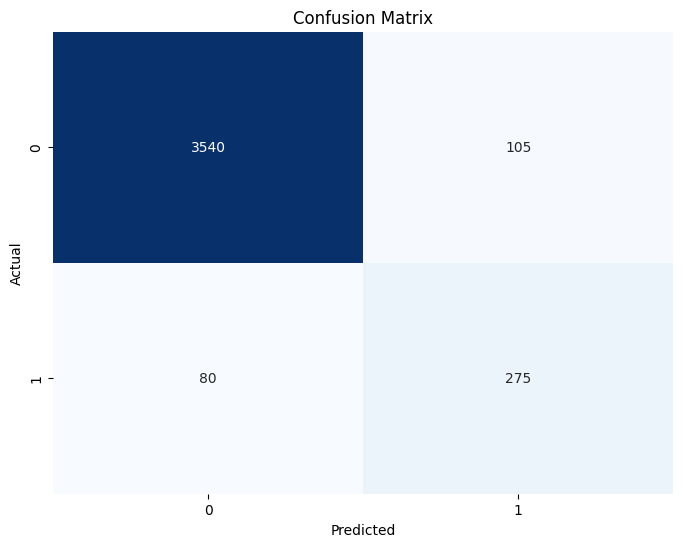

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.72      0.77      0.75       355

    accuracy                           0.95      4000
   macro avg       0.85      0.87      0.86      4000
weighted avg       0.96      0.95      0.95      4000



In [ ]:
# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


#Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 73568  #73568 Set your sample size
sample = random_sample(diabetesDf, sample_size)

sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat']

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)



rounds = 5
XGB_true_labels_pred_list = []  # list for storing true labels, predicted labels, probability


# Split the dataset
for i in range(rounds):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, stratify=y, random_state=45 + i)

    print('X_test',X_test)
    print('y_test',y_test)

    # Debug: Print column names before transformation

    # Preprocess the data
    X_train = preprocessor.fit_transform(X_train)
    print('X_train',X_train)
    print('y_train',y_train)
    # Define the model
    XG_model = XGBClassifier(**XGB_hyperparameters)

    # Make predictions - Transform X_test here if necessary
    XG_model.fit(X_train, y_train)

    # Make predictions
    y_pred = XG_model.predict(X_test)

    # Generate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.show()

    # Print the classification report
    print(classification_report(y_test, y_pred))

    y_pred = XG_model.predict_proba(X_test)
    prob_class_1 = y_pred[:, 1]  # Probabilities for class 1
    y_pred_classes = XG_model.predict(X_test)

    # Create a DataFrame
    XGB_true_labels_pred = pd.DataFrame({
        'True_Label': y_test,
        'Predicted_Label': y_pred_classes,
        'Predicted_Probability': prob_class_1
    })

    # Append the DataFrame to the list
    XGB_true_labels_pred_list.append(XGB_true_labels_pred)


In [ ]:
print(X.columns)


Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_cat', 'smoking_history_cat_2',
       'blood_glucose_level_cat', 'blood_glucose_level_cat_1', 'age_cat',
       'HbA1c_level_cat', 'HbA1c_level_cat_2', 'bmi_cat',
       'blood_glucose_level_cat_x_HbA1c_level_cat', 'HbA1c_level_cat_x_age',
       'bmi^2_x_age^2', 'bmi_x_age'],
      dtype='object')


In [ ]:
true_labels_pred_1, true_labels_pred_2, true_labels_pred_3, true_labels_pred_4, true_labels_pred_5 = XGB_true_labels_pred_list
df_list = [true_labels_pred_1, true_labels_pred_2, true_labels_pred_3, true_labels_pred_4, true_labels_pred_5]

def check(df):
    print(df[(df["Predicted_Label"] == 0) &  (df["Predicted_Probability"] > 0.5)])
    print(df[(df["Predicted_Label"] == 1) &  (df["Predicted_Probability"] < 0.5)])

for df in df_list:
    check(df)

Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


In [ ]:
print(true_labels_pred_1)

       True_Label  Predicted_Label  Predicted_Probability
23221           0                0               0.108070
72984           0                0               0.426913
13483           0                0               0.000357
50660           1                1               0.885904
3970            1                0               0.038973
...           ...              ...                    ...
66499           0                0               0.373366
12664           1                0               0.391925
63461           0                0               0.203363
56821           0                0               0.400986
84048           1                1               0.727490

[4000 rows x 3 columns]


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, XGB_thresholds = precision_recall_curve(y_test, prob_class_1)

# Target recall
target_recall = 0.6

# Find the index where recall is closest to the target recall
closest_index = np.argmin(np.abs(recall - target_recall))
closest_recall = recall[closest_index]

closest_index, closest_recall

# Assuming precision and XGB_thresholds are numpy arrays
chosen_precision = precision[3491]
chosen_threshold = XGB_thresholds[3491]

# Threshold
threshold = 0.9936085

# Convert probabilities to binary predictions based on the threshold
binary_predictions = (prob_class_1 >= threshold).astype(int)

# Identifying False Positives and False Negatives
false_positives = (binary_predictions == 1) & (y_test == 0)
false_negatives = (binary_predictions == 0) & (y_test == 1)

# Extracting indices or characteristics of False Positives and False Negatives
fp_indices = np.where(false_positives)[0]
fn_indices = np.where(false_negatives)[0]

# Use these indices to extract characteristics from the original dataset
fp_characteristics = diabetesDf.loc[fp_indices]
fn_characteristics = diabetesDf.loc[fn_indices]


KeyError: '[241, 1358, 3311, 3824] not in index'

In [ ]:
print(len(y_test))

4000


In [ ]:
XG_existing_thresholds = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
                      0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
                      0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
                      0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
                      0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
                      0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
                      0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                      0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.35 ,0.4, 0.5, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
                      0.68, 0.69 ,0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.961, 0.962, 0.963, 0.964, 0.965, 0.966,
                      0.967, 0.968, 0.969, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
                      0.9991, 0.9992, 0.9993, 0.9994, 0.99946, 0.99947, 0.99948, 0.9995, 0.9996]

# Generating new threshold values from 0.014 to 0.1 in increments of 0.001
XG_new_thresholds = np.arange(0.014, 0.101, 0.001).tolist()

# Combine existing and new thresholds
XG_combined_thresholds = XG_existing_thresholds + XG_new_thresholds
XG_combined_thresholds.sort()

print(len(XG_combined_thresholds))

229


In [ ]:
true_labels_pred_1, true_labels_pred_2, true_labels_pred_3, true_labels_pred_4, true_labels_pred_5 = XGB_true_labels_pred_list
true_labels_pred_1, true_labels_pred_2, true_labels_pred_3, true_labels_pred_4, true_labels_pred_5 = XGB_true_labels_pred_list
df_list = [true_labels_pred_1, true_labels_pred_2, true_labels_pred_3, true_labels_pred_4, true_labels_pred_5]

def check(df):
    print(df[(df["Predicted_Label"] == 0) &  (df["Predicted_Probability"] > 0.5)])
    print(df[(df["Predicted_Label"] == 1) &  (df["Predicted_Probability"] < 0.5)])

for df in df_list:
    check(df)

def XG_Precision_Recall_MyFunction(df, thresholds, min_positives=1):
    results = {}

    for threshold in thresholds:
        df['Predicted_Label'] = (df['Predicted_Probability'] >= threshold).astype(int)

        TP = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 1)).sum()
        FP = ((df['True_Label'] == 0) & (df['Predicted_Label'] == 1)).sum()
        FN = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 0)).sum()

        num_predicted_positives = TP + FP

        if num_predicted_positives >= min_positives:
            precision = TP / num_predicted_positives
            recall = TP / (TP + FN) if TP + FN != 0 else 0
        else:
            precision =  1.0 # or set to a specific value
            recall = 0.000766  # or set to a specific value

        results[threshold] = {'TP': TP, 'FP': FP, 'FN': FN, 'Precision': precision, 'Recall': recall}

    return results


# # Example usage
# threshold_values = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
#                     0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
#                     0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
#                     0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
#                     0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
#                     0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
#                     0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
#                     0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.981]

threshold_values = XGB_thresholds #XG_combined_thresholds
#threshold_values = list_of_thresholds
XG_result_1 = XG_Precision_Recall_MyFunction(true_labels_pred_1, threshold_values) # df = true_labels_pred, thresholds = threshold_values
XG_result_2 = XG_Precision_Recall_MyFunction(true_labels_pred_2, threshold_values) # df = true_labels_pred, thresholds = threshold_values
XG_result_3 = XG_Precision_Recall_MyFunction(true_labels_pred_3, threshold_values) # df = true_labels_pred, thresholds = threshold_values
XG_result_4 = XG_Precision_Recall_MyFunction(true_labels_pred_4, threshold_values) # df = true_labels_pred, thresholds = threshold_values
XG_result_5 = XG_Precision_Recall_MyFunction(true_labels_pred_5, threshold_values) # df = true_labels_pred, thresholds = threshold_values


# # Extracting precision and recall values
# precision_values = [v['Precision'] for v in result.values()] # list with precision values
# recall_values = [v['Recall'] for v in result.values()] # list with recall values

def create_prc_df(result):
    precision_values = [v['Precision'] for v in result.values()]
    recall_values = [v['Recall'] for v in result.values()]
    return pd.DataFrame({
        'Threshold': list(result.keys()),
        'Precision': precision_values,
        'Recall': recall_values})

XG_Precision_Recall_MyFunctiondf_1 = create_prc_df(XG_result_1)
XG_Precision_Recall_MyFunctiondf_2 = create_prc_df(XG_result_2)
XG_Precision_Recall_MyFunctiondf_3 = create_prc_df(XG_result_3)
XG_Precision_Recall_MyFunctiondf_4 = create_prc_df(XG_result_4)
XG_Precision_Recall_MyFunctiondf_5 = create_prc_df(XG_result_5)


Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


<Figure size 1400x600 with 0 Axes>

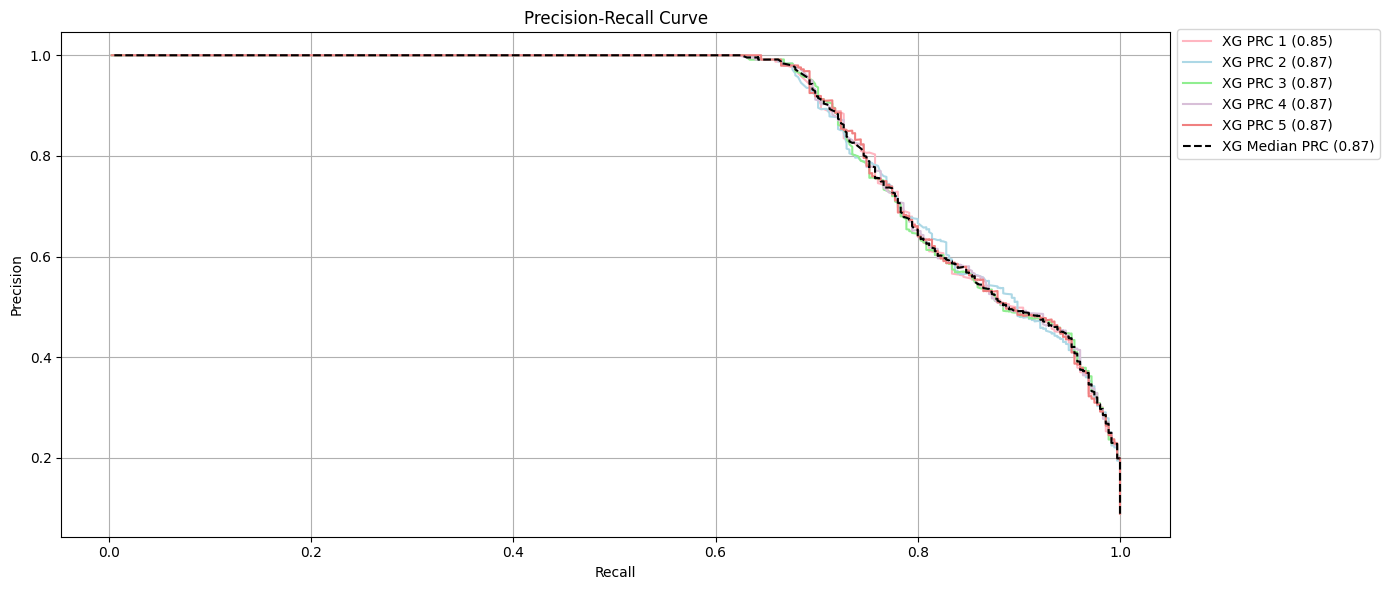

In [ ]:

########################################################################
plt.figure(figsize=(14, 6))

XG_precision_1 = XG_Precision_Recall_MyFunctiondf_1['Precision']
XG_recall_1 = XG_Precision_Recall_MyFunctiondf_1['Recall']
XG_thresholds_1 = XG_Precision_Recall_MyFunctiondf_1['Threshold']

XG_precision_2 = XG_Precision_Recall_MyFunctiondf_2['Precision']
XG_recall_2 = XG_Precision_Recall_MyFunctiondf_2['Recall']
XG_thresholds_2 = XG_Precision_Recall_MyFunctiondf_2['Threshold']

XG_precision_3 = XG_Precision_Recall_MyFunctiondf_3['Precision']
XG_recall_3 = XG_Precision_Recall_MyFunctiondf_3['Recall']
XG_thresholds_3 = XG_Precision_Recall_MyFunctiondf_3['Threshold']

XG_precision_4 = XG_Precision_Recall_MyFunctiondf_4['Precision']
XG_recall_4 = XG_Precision_Recall_MyFunctiondf_4['Recall']
XG_thresholds_4 = XG_Precision_Recall_MyFunctiondf_4['Threshold']

XG_precision_5 = XG_Precision_Recall_MyFunctiondf_5['Precision']
XG_recall_5 = XG_Precision_Recall_MyFunctiondf_5['Recall']
XG_thresholds_5 = XG_Precision_Recall_MyFunctiondf_5['Threshold']



XG_median_precision = np.median([XG_precision_1, XG_precision_2, XG_precision_3, XG_precision_4, XG_precision_5], axis=0)
XG_median_recall = np.median([XG_recall_1, XG_recall_2, XG_recall_3, XG_recall_4, XG_recall_5], axis=0)

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']


def sort_and_calculate_auc(recall, precision):
    # Combine recall and precision into a single array and sort by recall
    recall_precision = sorted(zip(recall, precision), key=lambda x: x[0])
    sorted_recall, sorted_precision = zip(*recall_precision)

    # Calculate AUC
    return auc(sorted_recall, sorted_precision)


# Calculate Average Precision (AP) for each dataset
# Calculate Average Precision (AP) for each dataset
XG_AP_1 = sort_and_calculate_auc(XG_recall_1, XG_precision_1)
XG_AP_2 = sort_and_calculate_auc(XG_recall_2, XG_precision_2)
XG_AP_3 = sort_and_calculate_auc(XG_recall_3, XG_precision_3)
XG_AP_4 = sort_and_calculate_auc(XG_recall_4, XG_precision_4)
XG_AP_5 = sort_and_calculate_auc(XG_recall_5, XG_precision_5)
XG_AP_M = sort_and_calculate_auc(XG_median_recall, XG_median_precision)


# Plotting the Precision-Recall curves
plt.figure(figsize=(14, 6))
plt.plot(XG_recall_1, XG_precision_1, label=f'XG PRC 1 ({XG_AP_1:.2f})', color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, label=f'XG PRC 2 ({XG_AP_2:.2f})', color=colors[1])
plt.plot(XG_recall_3, XG_precision_3, label=f'XG PRC 3 ({XG_AP_3:.2f})', color=colors[2])
plt.plot(XG_recall_4, XG_precision_4, label=f'XG PRC 4 ({XG_AP_5:.2f})', color=colors[3])
plt.plot(XG_recall_5, XG_precision_5, label=f'XG PRC 5 ({XG_AP_5:.2f})', color=colors[4])
plt.plot(XG_median_recall, XG_median_precision, label= f'XG Median PRC ({XG_AP_M:.2f})', color=colors[5], linestyle='--')



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Place a legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


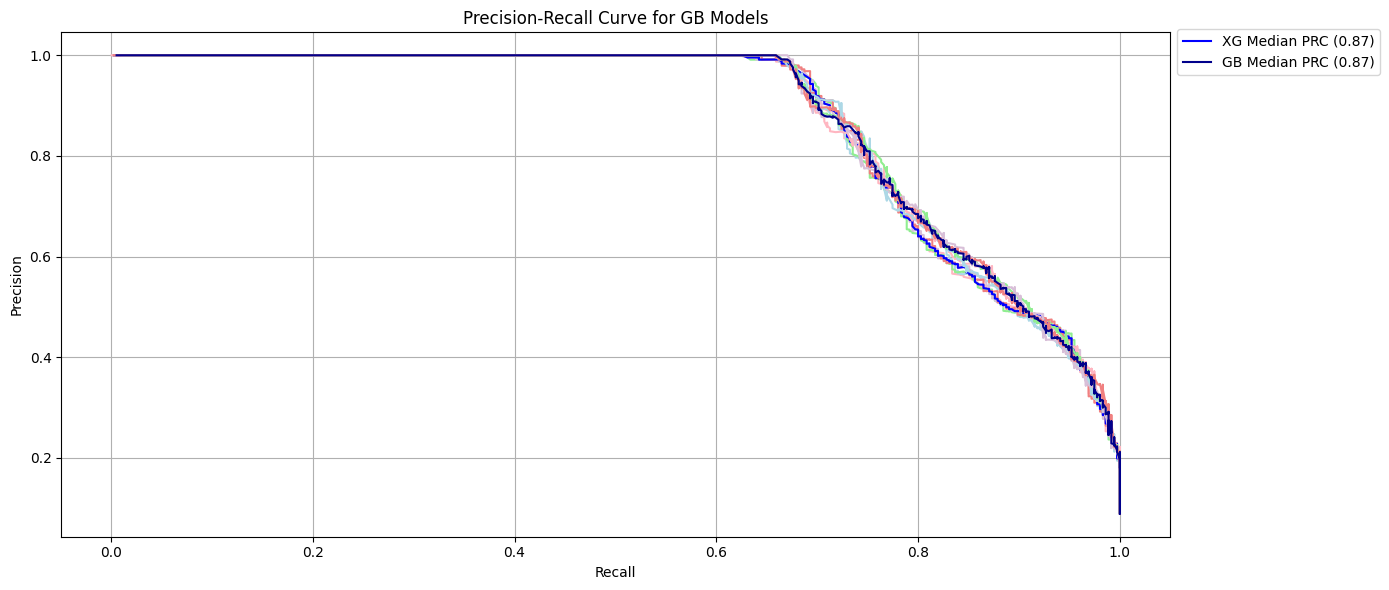

In [ ]:
plt.figure(figsize=(14, 6))

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']

plt.plot(XG_recall_1, XG_precision_1, color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, color=colors[1])
plt.plot(XG_recall_3, XG_precision_3, color=colors[2])
plt.plot(XG_recall_4, XG_precision_4, color=colors[3])
plt.plot(XG_recall_5, XG_precision_5, color=colors[4])
plt.plot(XG_median_recall, XG_median_precision, label= f'XG Median PRC ({XG_AP_M:.2f})', color= 'blue')

plt.plot(GB_recall_1, GB_precision_1, color=colors[0])
plt.plot(GB_recall_2, GB_precision_2, color=colors[1])
plt.plot(GB_recall_3, GB_precision_3, color=colors[2])
plt.plot(GB_recall_4, GB_precision_4, color=colors[3])
plt.plot(GB_recall_5, GB_precision_5, color=colors[4])
plt.plot(GB_median_recall, GB_median_precision, label= f'GB Median PRC ({GB_AP_M:.2f})', color='darkblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GB Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()


# Histogram XG Boost

In [ ]:
XB_true_labels_pred_1, XB_true_labels_pred_2, XB_true_labels_pred_3, XB_true_labels_pred_4, XB_true_labels_pred_5 = XGB_true_labels_pred_list


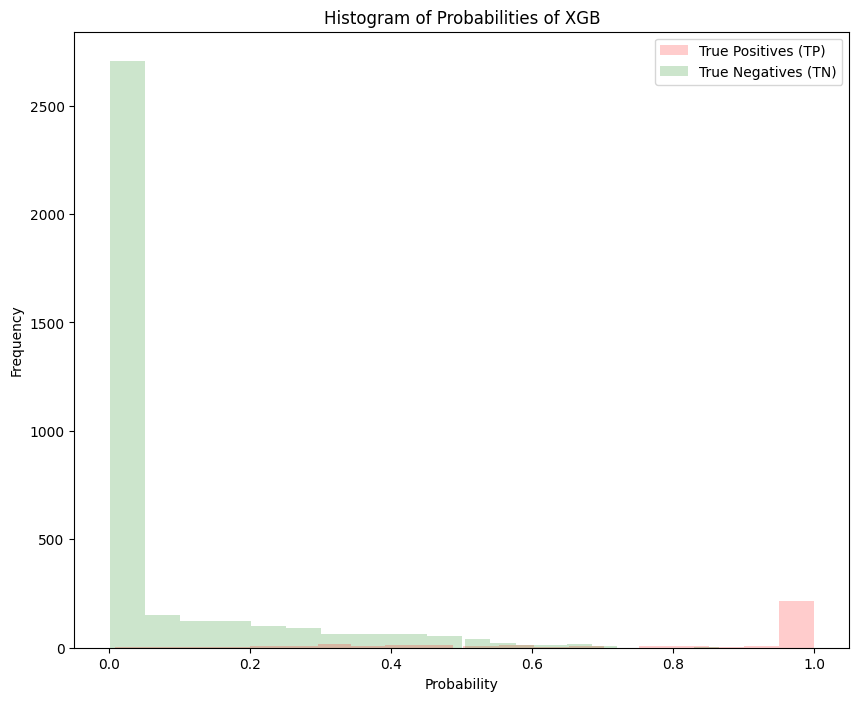

In [ ]:
TP_XGB = XB_true_labels_pred_3[(XB_true_labels_pred_3['True_Label'] == 1) & (XB_true_labels_pred_3['Predicted_Label'] == 1)]
TN_XGB = XB_true_labels_pred_3[(XB_true_labels_pred_3['True_Label'] == 0) & (XB_true_labels_pred_3['Predicted_Label'] == 0)]
FP_XGB = XB_true_labels_pred_3[(XB_true_labels_pred_3['True_Label'] == 0) & (XB_true_labels_pred_3['Predicted_Label'] == 1)]
FN_XGB = XB_true_labels_pred_3[(XB_true_labels_pred_3['True_Label'] == 1) & (XB_true_labels_pred_3['Predicted_Label'] == 0)]

TP_XGB = TP_XGB[['Predicted_Probability']]
TN_XGB = TN_XGB[['Predicted_Probability']]
FP_XGB = FP_XGB[['Predicted_Probability']]
FN_XGB = FN_XGB[['Predicted_Probability']]
# Set the size of the figure
plt.figure(figsize=(10, 8))  # Width=12 inches, Height=8 inches, for example

# Assuming prob_TP, prob_TN, prob_FP, prob_FN are your arrays of probability values
plt.hist(TP_XGB, bins=10, alpha=0.2, color='red', label='True Positives (TP)')  # Blue for TP
plt.hist(TN_XGB, bins=10, alpha=0.2, color='green', label='True Negatives (TN)')  # Same color for FN

plt.hist(FN_XGB, bins=10, alpha=0.2, color='red')  # Green for TN
plt.hist(FP_XGB, bins=10, alpha=0.2, color='green')  # Same color for FP

plt.title('Histogram of Probabilities of XGB')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()  # Adds a legend to distinguish the different histograms
plt.show()


# Random Forest

In [ ]:
import wandb

# Initialize the WandB API client
api = wandb.Api()

# Specify the project, entity, and run ID
entity_name = "aozk"  # Replace with your entity name or WandB username
project_name = "Diabetes_Classification_WCW_More_complexInteractions_RF_1"  # Replace with your project name
run_id = "y9jkcbh6"
# Fetch the run
run = api.run(f"{entity_name}/{project_name}/{run_id}")

# Access the hyperparameters (config) of the run
RF_hyperparameters = run.config

# Print the hyperparameters
print("Hyperparameters:", RF_hyperparameters)


Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.1, 'n_estimators': 174, 'min_samples_leaf': 14, 'min_samples_split': 134}


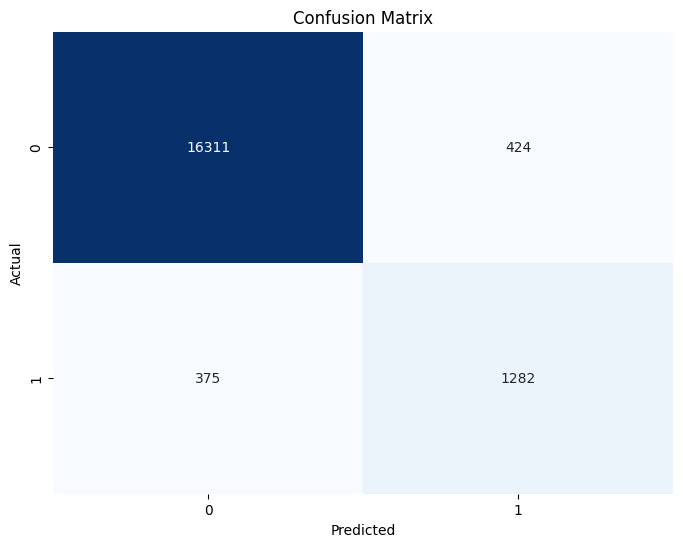

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16735
           1       0.75      0.77      0.76      1657

    accuracy                           0.96     18392
   macro avg       0.86      0.87      0.87     18392
weighted avg       0.96      0.96      0.96     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression


# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df



# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)



# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
RF_model = RandomForestClassifier(**RF_hyperparameters)

class_weights_list = [{0:1, 1:4}]
sample_weights = compute_sample_weight(class_weight=weights, y=y_train)
# Fit the model
RF_model.fit(X_train_processed, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = RF_model.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
class_weights_list = [{0:1, 1:4}]
sample_weights = compute_sample_weight(class_weight=weights, y=y_train)
print(sample_weights)

[1. 4. 1. ... 1. 1. 1.]


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
RF_classification_report_df = pd.DataFrame(report_dict).transpose()


RF_classification_report_df = RF_classification_report_df[['precision', 'recall', 'f1-score']]


second_row = RF_classification_report_df.iloc[1]

# Convert the filtered row to a new DataFrame
RF_classification_report_df = pd.DataFrame(second_row).transpose()

print(RF_classification_report_df)


   precision    recall  f1-score
1   0.732275  0.779119  0.754971


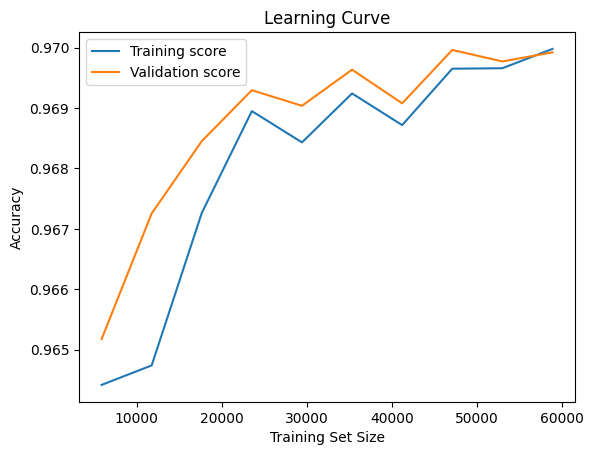

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    RF_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


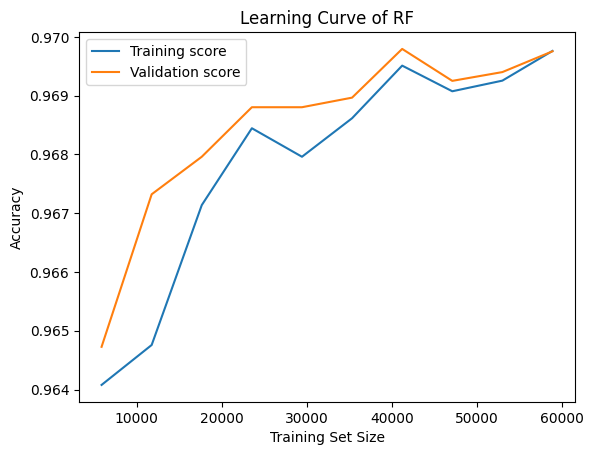

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    RF_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve of RF')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


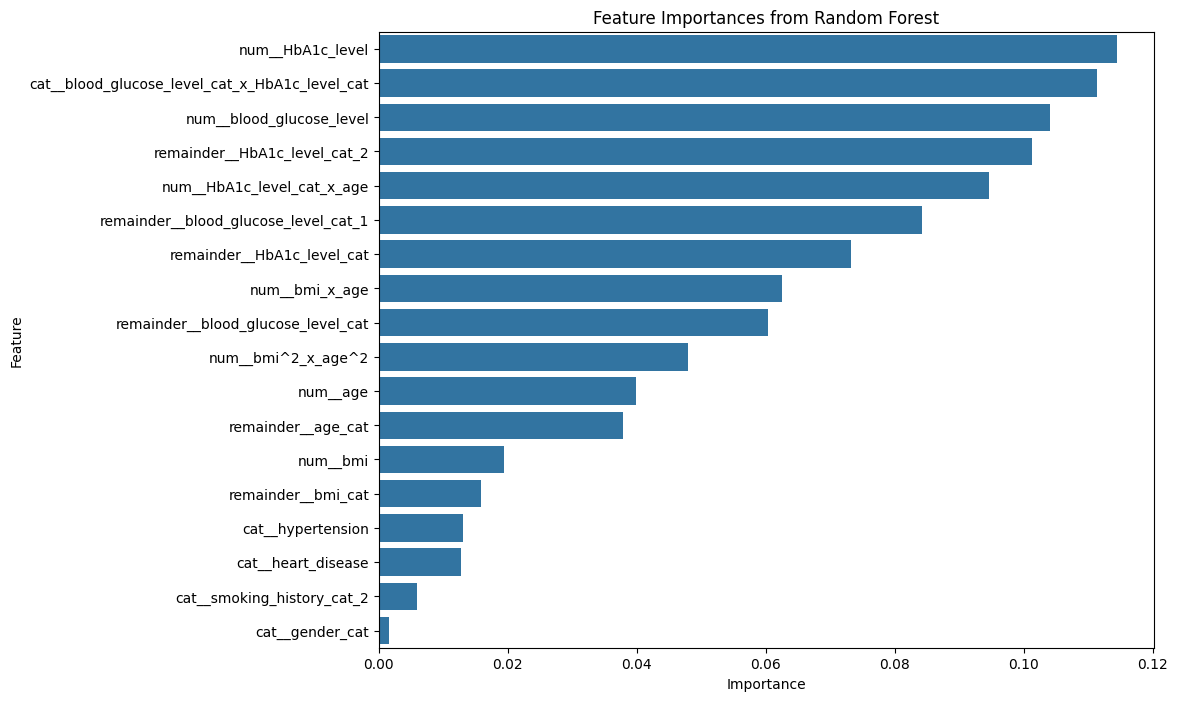

In [ ]:
# Get the feature importances
importances_RF = RF_model.feature_importances_

# Get feature names from the preprocessor
feature_names_RF = preprocessor.get_feature_names_out()

# Create a DataFrame of features and their importances
feature_importance_RF = pd.DataFrame({'Feature': feature_names_RF, 'Importance': importances_RF})

# Sort the DataFrame by importance
feature_importance_RF = feature_importance_RF.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_RF)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Resampling Random Forest

In [ ]:
# hyperparameters['class_weight'] = {0: 0.7, 1: 3.3}
# RF_model = RandomForestClassifier(**hyperparameters)


In [ ]:
import wandb

# Replace 'YOUR_API_KEY' with your actual API key
wandb.login(key='1a537b93f04137770d8cbb64490f630fd3b78339')


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']


    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True, random_state = 55)

# Sample the data and add interaction terms
sample_size = 20000  #73568 Set your sample size
sample = random_sample(diabetesDf, sample_size)


def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y


# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]  # Categorical feature names smoking_history_cat_2

sample_with_interactions = add_interaction_terms(sample)

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)
# Generate features and target
X, y = generate_X_y(sample_with_interactions)

X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=55)
print(X_test.shape)
#print(X_test.columns)

X_train_initial = preprocessor.fit_transform(X_train_initial)
X_test = preprocessor.transform(X_test)

print(X_test)

(4000, 18)
[[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]


X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[ 0.54843866  0.73687542  0.88818168 ...  2.          2.
   4.        ]
 [-0.02252819 -0.43548319 -0.21478416 ...  2.          2.
   3.        ]
 [-0.55780962 -0.12924509  0.13697692 ...  1.          1.
   3.        ]
 ...
 [ 1.90448493  0.93670903  1.03274592 ...  3.          3.
   4.        ]
 [-0.61133776 -0.96976661 -1.25259951 ...  3.          2.
   2.        ]


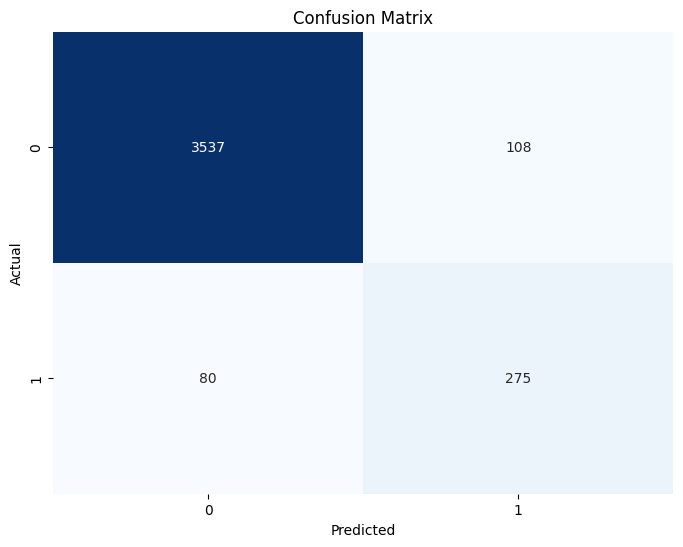

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.72      0.77      0.75       355

    accuracy                           0.95      4000
   macro avg       0.85      0.87      0.86      4000
weighted avg       0.95      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.8789833  -0.94149784 -1.15152755 ...  

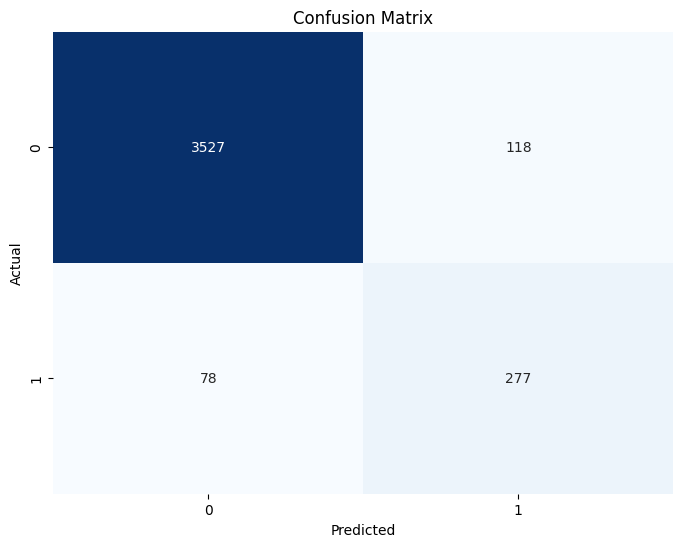

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.70      0.78      0.74       355

    accuracy                           0.95      4000
   macro avg       0.84      0.87      0.86      4000
weighted avg       0.95      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.66308176 -0.45741223 -0.24301961 ...  

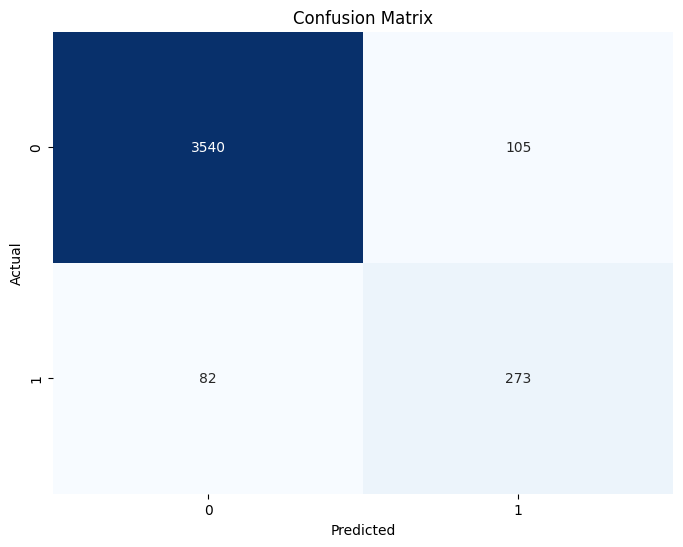

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.72      0.77      0.74       355

    accuracy                           0.95      4000
   macro avg       0.85      0.87      0.86      4000
weighted avg       0.95      0.95      0.95      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.88076554 -0.71937284 -0.63540112 ...  

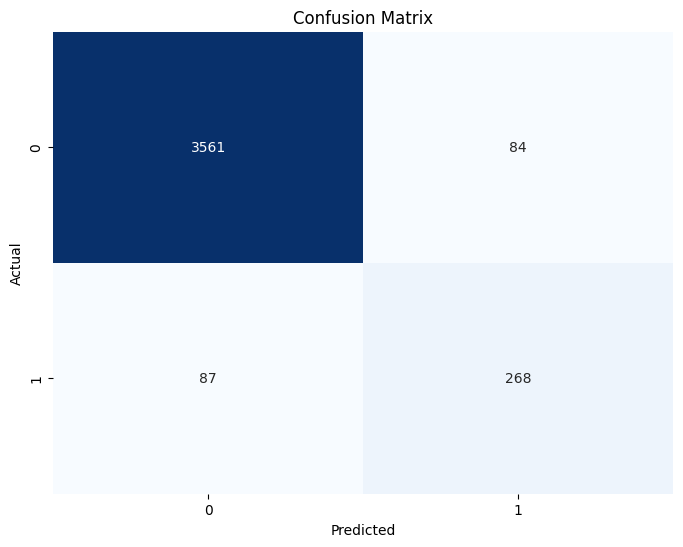

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3645
           1       0.76      0.75      0.76       355

    accuracy                           0.96      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.96      0.96      0.96      4000

X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-0.3445721  -0.10475505  0.16226754 ...  

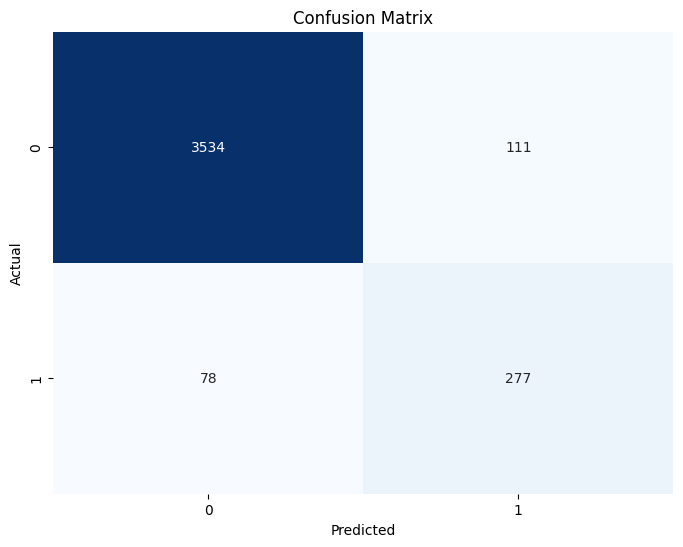

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.71      0.78      0.75       355

    accuracy                           0.95      4000
   macro avg       0.85      0.87      0.86      4000
weighted avg       0.95      0.95      0.95      4000



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression


# Function to add interaction terms to the dataframe
def add_interaction_terms(df):
    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']


    return df



# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True)


# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes',  "smoking_history_cat"]
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 73568  # Set your sample size 73568
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)



# Define the feature categories including the interaction terms
# Define the feature categories including the interaction terms
# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )
RF_true_labels_pred_list = []

rounds = 5

for i in range(rounds):
      # Split the dataset
      X_train, X_test_DoNotUse, y_train, y_train_DoNotUse = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 45 + i) # , random_state = 45 + i

      preprocessor = ColumnTransformer(
      transformers=[
          ('num', num_pipeline, num_features),
          ('cat', cat_pipeline, cat_features)
      ],
      remainder='passthrough'
  )


      # Preprocess the data
      X_train = preprocessor.fit_transform(X_train)
      #X_test = preprocessor.transform(X_test)
      print('X_test', X_test)
      print('y_test', y_test)
      print('X_train', X_train)
      print('y_train', y_train)

      # Define the model
      # Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
      #RF_hyperparameters['class_weight'] = {0: 0.7, 1: 3.3}
      RF_model = RandomForestClassifier(**RF_hyperparameters)

      # Correct class weights to be a dictionary, not a list containing a dictionary
      class_weights_dict = {0: 1, 1: 4}

      # Compute sample weights
      sample_weights = compute_sample_weight(class_weight=class_weights_dict, y=y_train)

      # Fit the model with the computed sample weights
      RF_model.fit(X_train, y_train, sample_weight=sample_weights)

      # Make predictions
      y_pred = RF_model.predict(X_test)

      # Generate and display the confusion matrix
      conf_matrix = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.title('Confusion Matrix')
      plt.savefig("confusion_matrix.png")
      plt.show()

      # Print the classification report
      print(classification_report(y_test, y_pred))

      y_pred = RF_model.predict_proba(X_test)
      prob_class_1 = y_pred[:, 1]  # Probabilities for class 1
      y_pred_classes = RF_model.predict(X_test)

      # Create a DataFrame
      RF_true_labels_pred = pd.DataFrame({
          'True_Label': y_test,
          'Predicted_Label': y_pred_classes,
          'Predicted_Probability': prob_class_1
      })

      # Append the DataFrame to the list
      RF_true_labels_pred_list.append(RF_true_labels_pred)


In [ ]:
RF_true_labels_pred_1, RF_true_labels_pred_2, RF_true_labels_pred_3, RF_true_labels_pred_4, RF_true_labels_pred_5 = RF_true_labels_pred_list
df_list = [RF_true_labels_pred_1, RF_true_labels_pred_2, RF_true_labels_pred_3, RF_true_labels_pred_4, RF_true_labels_pred_5]

def check(df):
    print(df[(df["Predicted_Label"] == 0) &  (df["Predicted_Probability"] > 0.5)])
    print(df[(df["Predicted_Label"] == 1) &  (df["Predicted_Probability"] < 0.5)])

for df in df_list:
    check(df)

Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, RF_thresholds = precision_recall_curve(y_test, prob_class_1)


In [ ]:
print(recall)

[1.        1.        1.        ... 0.0056338 0.0028169 0.       ]


In [ ]:
existing_thresholds = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
                      0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
                      0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
                      0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
                      0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
                      0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
                      0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                      0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.35 ,0.4, 0.5, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
                      0.68, 0.69 ,0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.961, 0.962, 0.963, 0.964, 0.965, 0.966,
                      0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 0.9991, 0.9992, 0.9993]

# Generating new threshold values from 0.014 to 0.1 in increments of 0.001
RF_new_thresholds = np.arange(0.014, 0.101, 0.001).tolist()

# Combine existing and new thresholds
RF_combined_thresholds = existing_thresholds + RF_new_thresholds
RF_combined_thresholds.sort()

print(RF_combined_thresholds)

[0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.011, 0.012, 0.013, 0.014, 0.014, 0.015, 0.016, 0.016999999999999998, 0.017999999999999995, 0.018999999999999996, 0.019999999999999997, 0.020999999999999994, 0.021999999999999992, 0.022999999999999993, 0.023999999999999994, 0.02499999999999999, 0.02599999999999999, 0.02699999999999999, 0.02799999999999999, 0.028999999999999988, 0.029999999999999985, 0.030999999999999986, 0.

In [ ]:
print(RF_thresholds)

[0.00182586 0.00184683 0.00191412 ... 0.95960121 0.95989517 0.96082993]


In [ ]:

RF_true_labels_pred_1, RF_true_labels_pred_2, RF_true_labels_pred_3, RF_true_labels_pred_4, RF_true_labels_pred_5 = RF_true_labels_pred_list
RF_true_labels_pred_1, RF_true_labels_pred_2, RF_true_labels_pred_3, RF_true_labels_pred_4, RF_true_labels_pred_5 = RF_true_labels_pred_list
df_list = [RF_true_labels_pred_1, RF_true_labels_pred_2, RF_true_labels_pred_3, RF_true_labels_pred_4, RF_true_labels_pred_5]

def check(df):
    print(df[(df["Predicted_Label"] == 0) &  (df["Predicted_Probability"] > 0.5)])
    print(df[(df["Predicted_Label"] == 1) &  (df["Predicted_Probability"] < 0.5)])

for df in df_list:
    check(df)

RF_true_labels_pred_1_original = RF_true_labels_pred_1.copy()
RF_true_labels_pred_2_original = RF_true_labels_pred_2.copy()
RF_true_labels_pred_3_original = RF_true_labels_pred_3.copy()
RF_true_labels_pred_4_original = RF_true_labels_pred_4.copy()
RF_true_labels_pred_5_original = RF_true_labels_pred_5.copy()


def RF_Precision_Recall_MyFunction(df, thresholds, min_positives = 1):
    results = {}

    for threshold in thresholds:
        # Calculate Predicted_Label based on the current threshold
        df['Predicted_Label'] = (df['Predicted_Probability'] >= threshold).astype(int)

        # Calculate TP, FP, and FN for each threshold
        TP = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 1)).sum()
        FP = ((df['True_Label'] == 0) & (df['Predicted_Label'] == 1)).sum()
        FN = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 0)).sum()

        num_predicted_positives = TP + FP

        if num_predicted_positives >= min_positives:
            precision = TP / num_predicted_positives
            recall = TP / (TP + FN) if TP + FN != 0 else 0
        else:
            precision =  1.0 # or set to a specific value
            recall = 0.000766  # or set to a specific value

        results[threshold] = {'TP': TP, 'FP': FP, 'FN': FN, 'Precision': precision, 'Recall': recall}

    return results


# # Example usage
# threshold_values = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
#                     0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
#                     0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
#                     0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
#                     0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
#                     0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
#                     0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
#                     0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.981]

RF_threshold_values =  RF_thresholds #RF_combined_thresholds
#threshold_values = list_of_thresholds
RF_result_1 = RF_Precision_Recall_MyFunction(RF_true_labels_pred_1_original, RF_threshold_values) # df = true_labels_pred, thresholds = threshold_values
RF_result_2 = RF_Precision_Recall_MyFunction(RF_true_labels_pred_2_original, RF_threshold_values) # df = true_labels_pred, thresholds = threshold_values
RF_result_3 = RF_Precision_Recall_MyFunction(RF_true_labels_pred_3_original, RF_threshold_values) # df = true_labels_pred, thresholds = threshold_values
RF_result_4 = RF_Precision_Recall_MyFunction(RF_true_labels_pred_4_original, RF_threshold_values) # df = true_labels_pred, thresholds = threshold_values
RF_result_5 = RF_Precision_Recall_MyFunction(RF_true_labels_pred_5_original, RF_threshold_values) # df = true_labels_pred, thresholds = threshold_values


# Function to create a DataFrame from the result
def RF_create_prc_df(result):
    precision_values = [v['Precision'] for v in result.values()]
    recall_values = [v['Recall'] for v in result.values()]
    return pd.DataFrame({
        'Threshold': list(result.keys()),
        'Precision': precision_values,
        'Recall': recall_values
    })

# Creating DataFrames for each set of results
RF_Precision_Recall_MyFunction_df_1 = RF_create_prc_df(RF_result_1)
RF_Precision_Recall_MyFunction_df_2 = RF_create_prc_df(RF_result_2)
RF_Precision_Recall_MyFunction_df_3 = RF_create_prc_df(RF_result_3)
RF_Precision_Recall_MyFunction_df_4 = RF_create_prc_df(RF_result_4)
RF_Precision_Recall_MyFunction_df_5 = RF_create_prc_df(RF_result_5)

# print(RF_Precision_Recall_MyFunction_df)

# Precision_at_thresholds_1 = RF_Precision_Recall_MyFunction_df[['Precision']]
# Recall_at_thresholds_1 = RF_Precision_Recall_MyFunction_df[['Recall']]



Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


In [ ]:
print(RF_Precision_Recall_MyFunction_df_5)

      Threshold  Precision    Recall
0      0.001826   0.088750  1.000000
1      0.001847   0.088794  1.000000
2      0.001914   0.089039  1.000000
3      0.001922   0.089062  1.000000
4      0.002058   0.089084  1.000000
...         ...        ...       ...
3702   0.959525   1.000000  0.014085
3703   0.959577   1.000000  0.011268
3704   0.959601   1.000000  0.008451
3705   0.959895   1.000000  0.005634
3706   0.960830   1.000000  0.002817

[3707 rows x 3 columns]


In [ ]:
print(RF_true_labels_pred_1)

       True_Label  Predicted_Label  Predicted_Probability
23221           0                0               0.142487
72984           0                0               0.439269
13483           0                0               0.151988
50660           1                1               0.769425
3970            1                0               0.089109
...           ...              ...                    ...
66499           0                0               0.373469
12664           1                0               0.420749
63461           0                0               0.178884
56821           0                0               0.369048
84048           1                1               0.554838

[4000 rows x 3 columns]


In [ ]:
# Investigate instances where the predicted probability is 1.0
perfect_predictions = RF_true_labels_pred_5[RF_true_labels_pred_1['Predicted_Probability'] == 1.0]
print(perfect_predictions[['True_Label', 'Predicted_Probability']])


Empty DataFrame
Columns: [True_Label, Predicted_Probability]
Index: []


<Figure size 1400x600 with 0 Axes>

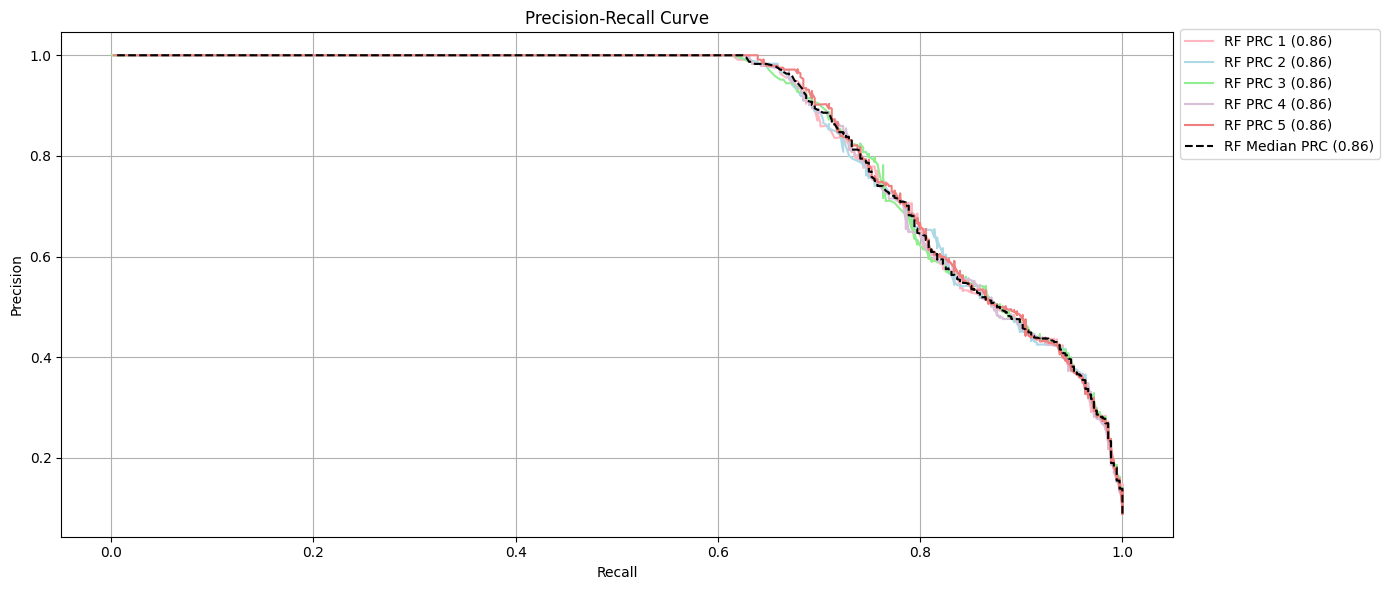

In [ ]:

########################################################################
plt.figure(figsize=(14, 6))

RF_precision_1 = RF_Precision_Recall_MyFunction_df_1['Precision']
RF_recall_1 = RF_Precision_Recall_MyFunction_df_1['Recall']
RF_thresholds_1 = RF_Precision_Recall_MyFunction_df_1['Threshold']

RF_precision_2 = RF_Precision_Recall_MyFunction_df_2['Precision']
RF_recall_2 = RF_Precision_Recall_MyFunction_df_2['Recall']
RF_thresholds_2 = RF_Precision_Recall_MyFunction_df_2['Threshold']

RF_precision_3 = RF_Precision_Recall_MyFunction_df_3['Precision']
RF_recall_3 = RF_Precision_Recall_MyFunction_df_3['Recall']
RF_thresholds_3 = RF_Precision_Recall_MyFunction_df_3['Threshold']

RF_precision_4 = RF_Precision_Recall_MyFunction_df_4['Precision']
RF_recall_4 = RF_Precision_Recall_MyFunction_df_4['Recall']
RF_thresholds_4 = RF_Precision_Recall_MyFunction_df_4['Threshold']

RF_precision_5 = RF_Precision_Recall_MyFunction_df_5['Precision']
RF_recall_5 = RF_Precision_Recall_MyFunction_df_5['Recall']
RF_thresholds_5 = RF_Precision_Recall_MyFunction_df_5['Threshold']


# [Your code for defining precision_1, recall_1, ..., precision_5, recall_5]

RF_median_precision = np.median([RF_precision_1, RF_precision_2, RF_precision_3, RF_precision_4, RF_precision_5], axis=0)
RF_median_recall = np.median([RF_recall_1, RF_recall_2, RF_recall_3, RF_recall_4, RF_recall_5], axis=0)

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']

def sort_precision_recall(precision, recall, thresholds):
    # Combine into a single data frame
    pr_data = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds})
    # Sort by recall
    pr_data_sorted = pr_data.sort_values('recall', inplace=False)
    return pr_data_sorted['precision'], pr_data_sorted['recall'], pr_data_sorted['thresholds']

# Sort each precision-recall set
RF_precision_1, RF_recall_1, RF_thresholds_1 = sort_precision_recall(RF_precision_1, RF_recall_1, RF_thresholds_1)
RF_precision_2, RF_recall_2, RF_thresholds_2 = sort_precision_recall(RF_precision_2, RF_recall_2, RF_thresholds_2)
RF_precision_3, RF_recall_3, RF_thresholds_3 = sort_precision_recall(RF_precision_3, RF_recall_3, RF_thresholds_3)
RF_precision_4, RF_recall_4, RF_thresholds_4 = sort_precision_recall(RF_precision_4, RF_recall_4, RF_thresholds_4)
RF_precision_5, RF_recall_5, RF_thresholds_5 = sort_precision_recall(RF_precision_5, RF_recall_5, RF_thresholds_5)



# Calculate Average Precision (AP) for each dataset
RF_AP_1 = auc(RF_recall_1, RF_precision_1)
RF_AP_2 = auc(RF_recall_2, RF_precision_2)
RF_AP_3 = auc(RF_recall_3, RF_precision_3)
RF_AP_4 = auc(RF_recall_4, RF_precision_4)
RF_AP_5 = auc(RF_recall_5, RF_precision_5)
RF_AP_M = auc(RF_median_recall, RF_median_precision)

# Plotting the Precision-Recall curves
plt.figure(figsize=(14, 6))
plt.plot(RF_recall_1, RF_precision_1, label=f'RF PRC 1 ({RF_AP_1:.2f})', color=colors[0])
plt.plot(RF_recall_2, RF_precision_2, label=f'RF PRC 2 ({RF_AP_2:.2f})', color=colors[1])
plt.plot(RF_recall_3, RF_precision_3, label=f'RF PRC 3 ({RF_AP_3:.2f})', color=colors[2])
plt.plot(RF_recall_4, RF_precision_4, label=f'RF PRC 4 ({RF_AP_5:.2f})', color=colors[3])
plt.plot(RF_recall_5, RF_precision_5, label=f'RF PRC 5 ({RF_AP_5:.2f})', color=colors[4])
plt.plot(RF_median_recall, RF_median_precision, label= f'RF Median PRC ({RF_AP_M:.2f})', color=colors[5], linestyle='--')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Place a legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


# RF Histrogram

In [ ]:
RF_true_labels_pred_1, RF_true_labels_pred_2, RF_true_labels_pred_3, RF_true_labels_pred_4, RF_true_labels_pred_5 = RF_true_labels_pred_list


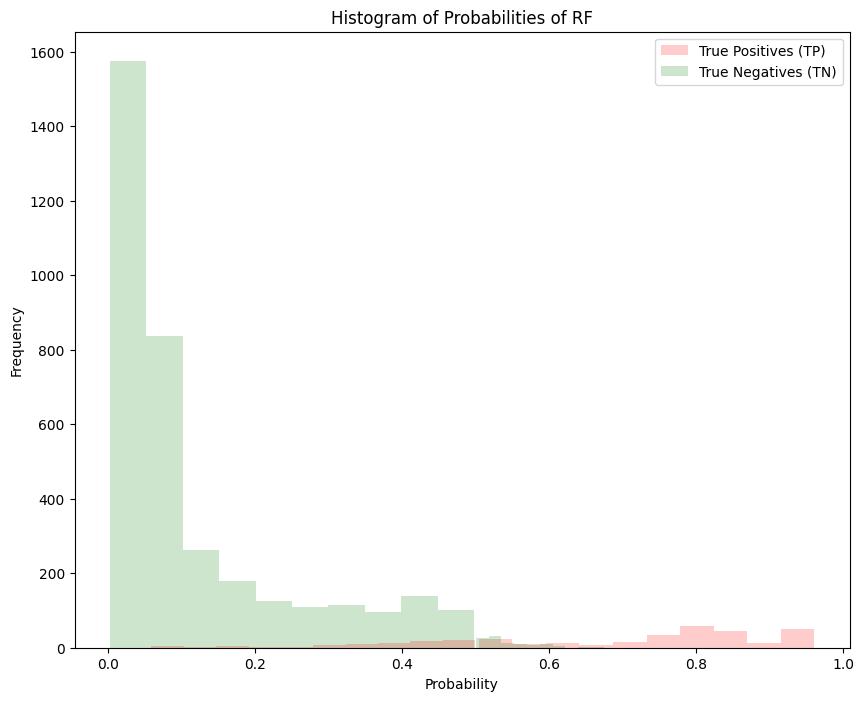

In [ ]:
TP_RF = RF_true_labels_pred_3[(RF_true_labels_pred_3['True_Label'] == 1) & (RF_true_labels_pred_3['Predicted_Label'] == 1)]
TN_RF = RF_true_labels_pred_3[(RF_true_labels_pred_3['True_Label'] == 0) & (RF_true_labels_pred_3['Predicted_Label'] == 0)]
FP_RF = RF_true_labels_pred_3[(RF_true_labels_pred_3['True_Label'] == 0) & (RF_true_labels_pred_3['Predicted_Label'] == 1)]
FN_RF = RF_true_labels_pred_3[(RF_true_labels_pred_3['True_Label'] == 1) & (RF_true_labels_pred_3['Predicted_Label'] == 0)]

TP_RF = TP_RF[['Predicted_Probability']]
TN_RF = TN_RF[['Predicted_Probability']]
FP_RF = FP_RF[['Predicted_Probability']]
FN_RF = FN_RF[['Predicted_Probability']]
# Set the size of the figure
plt.figure(figsize=(10, 8))  # Width=12 inches, Height=8 inches, for example

# Assuming prob_TP, prob_TN, prob_FP, prob_FN are your arrays of probability values
plt.hist(TP_RF, bins=10, alpha=0.2, color='red', label='True Positives (TP)')  # Blue for TP
plt.hist(TN_RF, bins=10, alpha=0.2, color='green', label='True Negatives (TN)')  # Same color for FN

plt.hist(FN_RF, bins=10, alpha=0.2, color='red')  # Green for TN
plt.hist(FP_RF, bins=10, alpha=0.2, color='green')  # Same color for FP

plt.title('Histogram of Probabilities of RF')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()  # Adds a legend to distinguish the different histograms
plt.show()


# Logistic Regression

In [ ]:
import wandb

# Initialize the WandB API client
api = wandb.Api()

# Specify the project, entity, and run ID
entity_name = "aozk"  # Replace with your entity name or WandB username
project_name = "Diabetes_Classification_LG_Complex_Interactions_1"  # Replace with your project name
run_id = "zg4bl90y"
# Fetch the run
run = api.run(f"{entity_name}/{project_name}/{run_id}")

# Access the hyperparameters (config) of the run
LG_hyperparameters = run.config

# Print the hyperparameters
print("Hyperparameters:", LG_hyperparameters)


Hyperparameters: {'C': 11.288378916846884, 'tol': 0.00029763514416313193, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 1, 'max_iter': 200, 'fit_intercept': False, 'intercept_scaling': 10}


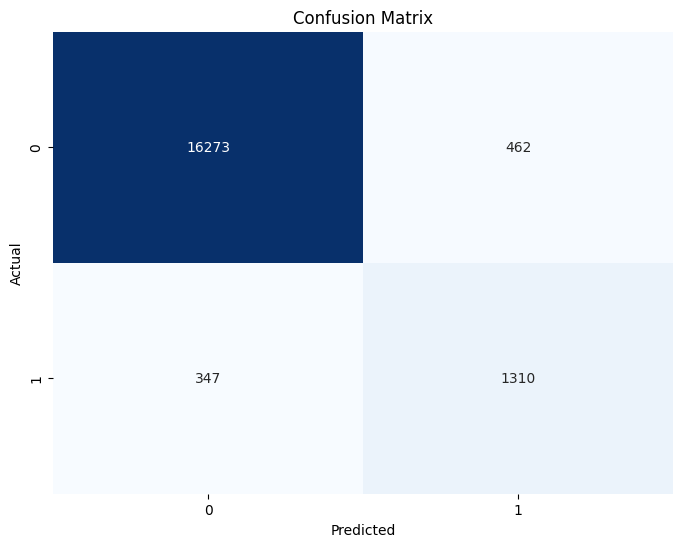

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16735
           1       0.74      0.79      0.76      1657

    accuracy                           0.96     18392
   macro avg       0.86      0.88      0.87     18392
weighted avg       0.96      0.96      0.96     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression




# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)



# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]
# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
lg_model = LogisticRegression(**LG_hyperparameters)

class_weights_list = [{0: 1, 1: 4}] # [{0: 1, 1: 3}]

# Assuming you have one set of class weights. If more, iterate over them.
weights = class_weights_list[0]

# Compute sample weights
sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

# Fit the model
lg_model.fit(X_train_processed, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = lg_model.predict(X_test_processed)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression




# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)



# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]
# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
lg_model = LogisticRegression(**LG_hyperparameters)

class_weights_list = [{0: 1, 1: 4}]

# Assuming you have one set of class weights. If more, iterate over them.
weights = class_weights_list[0]

# Compute sample weights
sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

# Fit the model
lg_model.fit(X_train_processed, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = lg_model.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))



In [ ]:
class_weights_list = [{0: 1, 1: 4}]

# Assuming you have one set of class weights. If more, iterate over them.
weights = class_weights_list[0]
print(weights)

{0: 1, 1: 4}


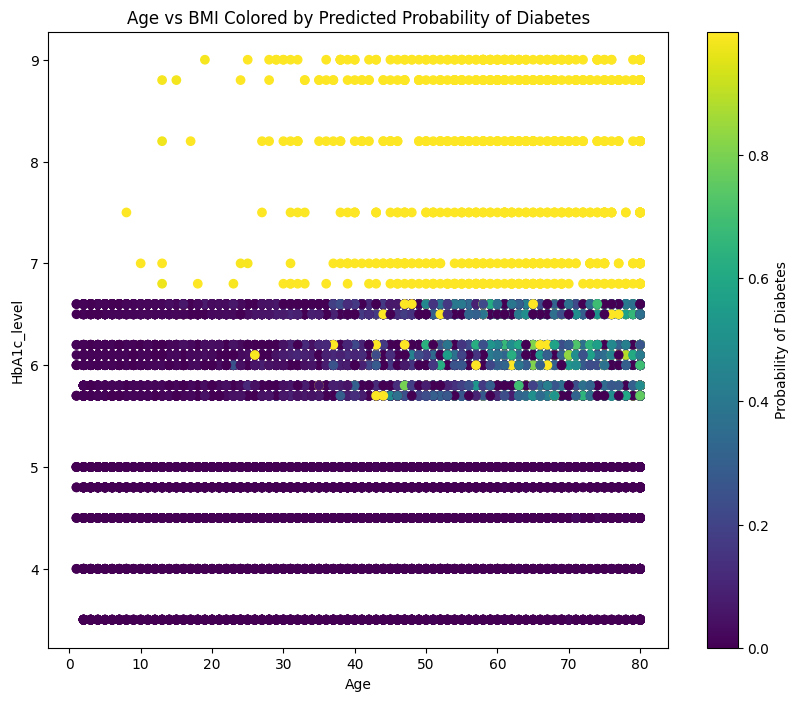

In [ ]:
lg_model = LogisticRegression(**LG_hyperparameters)

# Fit the model and make predictions
lg_model.fit(X_train_processed, y_train, sample_weight=sample_weights)
probabilities = lg_model.predict_proba(X_test_processed)

# Extract the probabilities of the positive class
prob_diabetes = probabilities[:, 1]

# Prepare DataFrame for plotting
plot_data = X_test.copy()
plot_data['prob_diabetes'] = prob_diabetes

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(plot_data['age'], plot_data['HbA1c_level'], c=plot_data['prob_diabetes'], cmap='viridis')
plt.colorbar(label='Probability of Diabetes')
plt.xlabel('Age')
plt.ylabel('HbA1c_level')
plt.title('Age vs BMI Colored by Predicted Probability of Diabetes')
plt.show()


In [ ]:
print(probabilities.min(), probabilities.max())


0.0 0.0


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
LG_classification_report_df = pd.DataFrame(report_dict).transpose()


LG_classification_report_df = LG_classification_report_df[['precision', 'recall', 'f1-score']]


second_row = LG_classification_report_df.iloc[1]

# Convert the filtered row to a new DataFrame
LG_classification_report_df = pd.DataFrame(second_row).transpose()

print(LG_classification_report_df)


   precision    recall  f1-score
1   0.739278  0.790585  0.764071


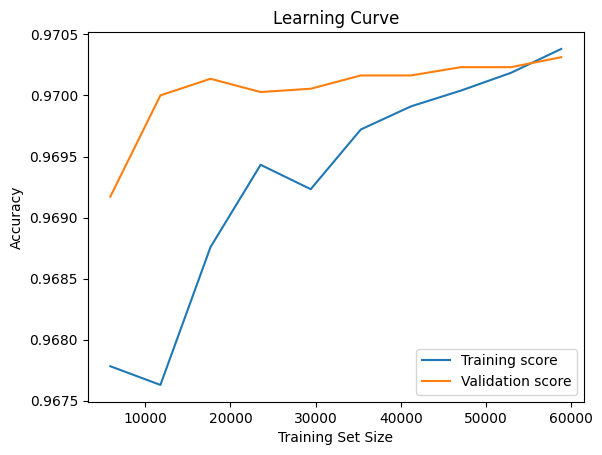

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lg_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


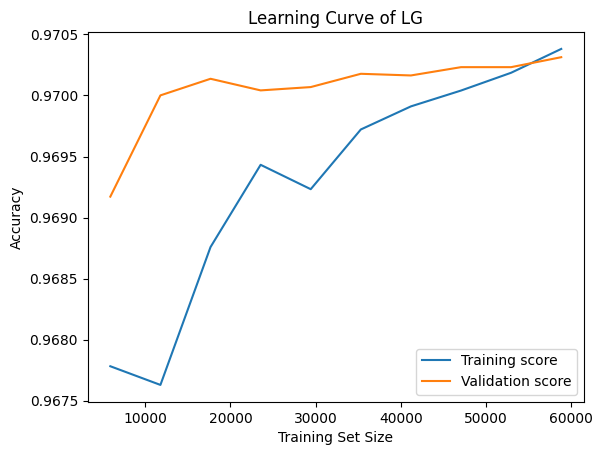

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lg_model, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve of LG')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Fit the model
lg_model.fit(X_train_processed, y_train, sample_weight=sample_weights)

# Retrieve the feature names from the ColumnTransformer
# This will include the original feature names plus any new features created by one-hot encoding
feature_names_transformed = preprocessor.get_feature_names_out()

# Check the number of transformed features
print("Number of transformed features:", len(feature_names_transformed))


Number of transformed features: 18


In [ ]:
# Get the coefficients from the model
coefficients = lg_model.coef_[0]

# Check that the number of coefficients matches the number of transformed features
if len(feature_names_transformed) != len(coefficients):
    raise ValueError(f"Number of transformed features ({len(feature_names_transformed)}) does not match number of coefficients ({len(coefficients)})")


                                           Feature  Coefficient
0                       num__HbA1c_level_cat_x_age    -0.090505
1                               num__bmi^2_x_age^2    -1.153919
2                                   num__bmi_x_age     3.125001
3                                 num__HbA1c_level     0.249142
4                         num__blood_glucose_level    -0.084292
5                                         num__age    -0.460070
6                                         num__bmi    -0.086782
7                                cat__hypertension     0.713192
8                               cat__heart_disease     0.822056
9                                  cat__gender_cat     0.295837
10                      cat__smoking_history_cat_2     0.036933
11  cat__blood_glucose_level_cat_x_HbA1c_level_cat     5.631287
12              remainder__blood_glucose_level_cat   -10.719069
13            remainder__blood_glucose_level_cat_1     7.612932
14                              remainde

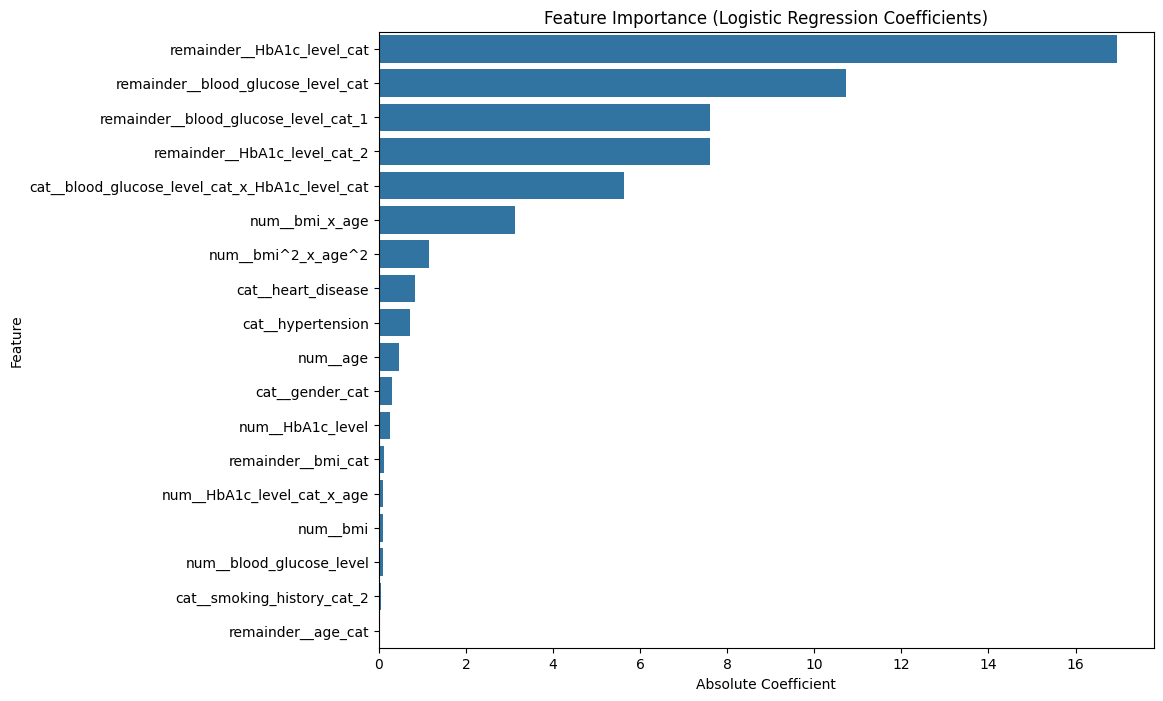

In [ ]:
# Create the DataFrame with the correct feature names
feature_importance_LG = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Coefficient': coefficients
})

# Plotting the feature importance as before...
print(feature_importance_LG)

# Sort the features by the absolute value of their coefficient for better visualization
feature_importance_LG['Absolute Coefficient'] = feature_importance_LG['Coefficient'].abs()
feature_importance_LG = feature_importance_LG.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance using Seaborn's bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute Coefficient', y='Feature', data = feature_importance_LG)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


# Logistic Regression Resampling

In [ ]:
# Function to add interaction terms to the dataframe
# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True, random_state = 55)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat', 'smoking_history']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]  # Categorical feature names smoking_history_cat_2

# Sample the data and add interaction terms
sample_size = 20000  # Set your sample size 73568
sample = random_sample(diabetesDf, sample_size)

sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)


X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)
print(X_test.shape)
X_train = preprocessor.fit_transform(X_train_initial)
X_test = preprocessor.transform(X_test)
print(X_test)

(4000, 18)
[[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]


(16000, 18)
(4000, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[ 2.46012478e+00  1.04981271e+00  1.10833306e+00 ...  3.00000000e+00
   3.00000000e+00  3.00000000e+00]
 [-1.38002304e-01  1.08616846e+00  1.13305163e+00 ...  2.00000000e+00
   2.00000000e+00  4.00000000e+00]
 [-3.85442978e-01  2.81330433e-01  5.23479183e-01 ...  1.00000000e+00
   1.00000000e+00  3.00000000e+00]
 ...
 [-1.21613667e+00 -9.980040

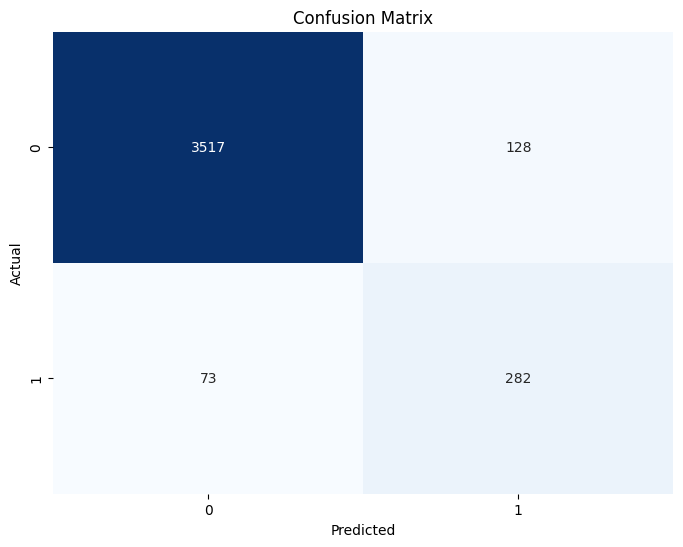

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3645
           1       0.69      0.79      0.74       355

    accuracy                           0.95      4000
   macro avg       0.83      0.88      0.85      4000
weighted avg       0.95      0.95      0.95      4000

(16000, 18)
(4000, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[ 1.76137231  0.350

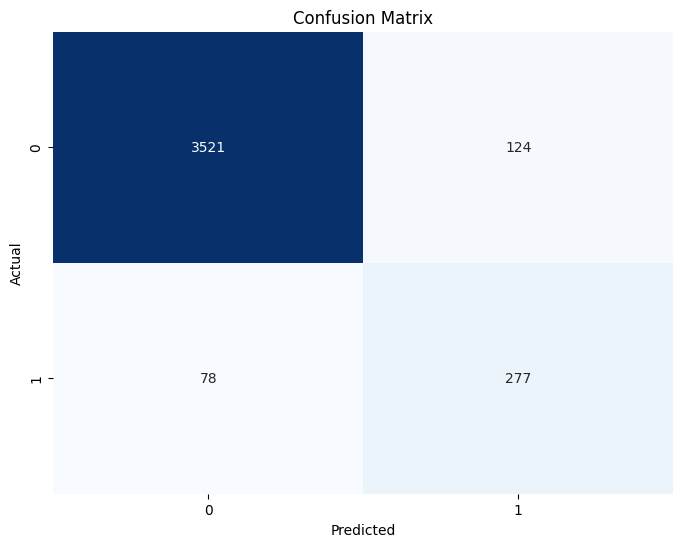

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3645
           1       0.69      0.78      0.73       355

    accuracy                           0.95      4000
   macro avg       0.83      0.87      0.85      4000
weighted avg       0.95      0.95      0.95      4000

(16000, 18)
(4000, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-1.37009261 -1.036

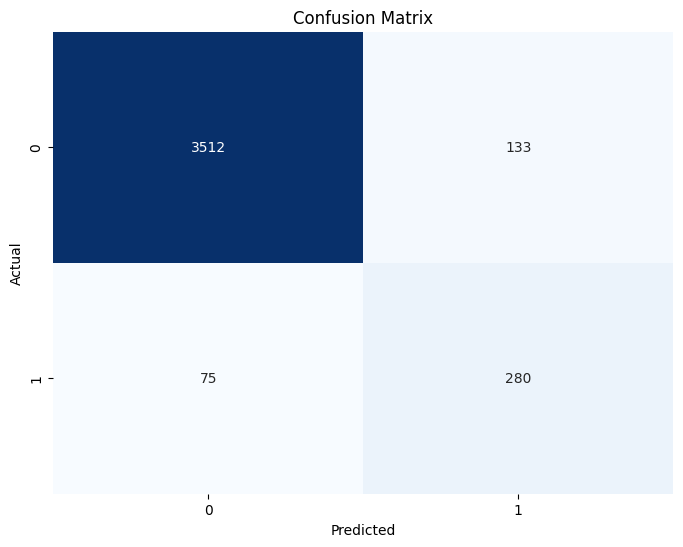

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3645
           1       0.68      0.79      0.73       355

    accuracy                           0.95      4000
   macro avg       0.83      0.88      0.85      4000
weighted avg       0.95      0.95      0.95      4000

(16000, 18)
(4000, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[ 1.42022231  1.096

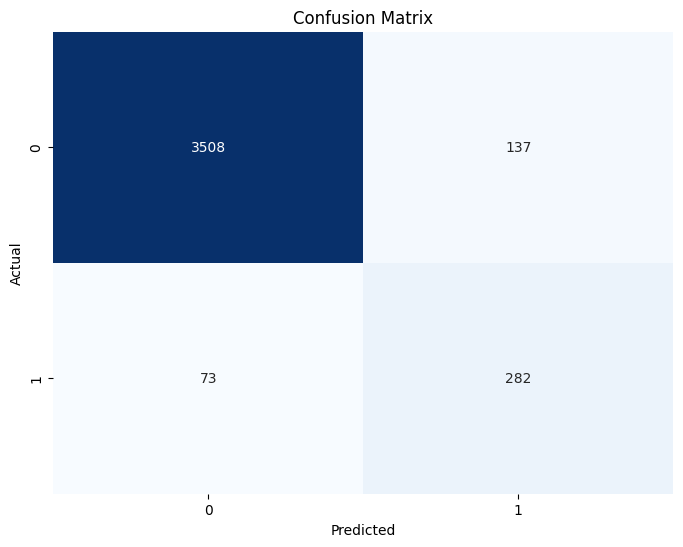

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3645
           1       0.67      0.79      0.73       355

    accuracy                           0.95      4000
   macro avg       0.83      0.88      0.85      4000
weighted avg       0.95      0.95      0.95      4000

(16000, 18)
(4000, 18)
X_test [[ 0.18530173 -0.28150695 -0.02915506 ...  2.          2.
   3.        ]
 [ 0.4349504   0.64812506  0.81979152 ...  2.          2.
   4.        ]
 [ 1.3622169   1.47061126  1.38449182 ...  2.          2.
   3.        ]
 ...
 [ 0.82725546 -0.340537   -0.09776029 ...  3.          2.
   3.        ]
 [ 0.32795811  0.44994237  0.66402203 ...  2.          2.
   4.        ]
 [ 1.14823232  4.12836148  2.74780523 ...  2.          2.
   4.        ]]
y_test 23221    0
72984    0
13483    0
50660    1
3970     1
        ..
66499    0
12664    1
63461    0
56821    0
84048    1
Name: diabetes, Length: 4000, dtype: int64
X_train [[-8.95340695e-01 -7

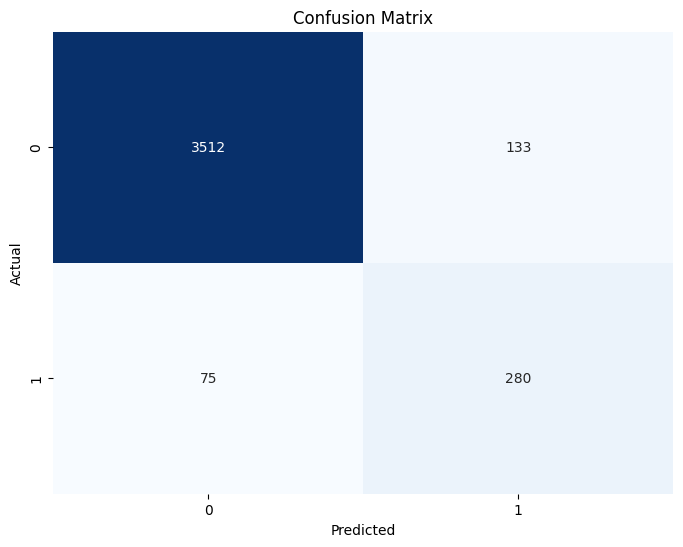

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3645
           1       0.68      0.79      0.73       355

    accuracy                           0.95      4000
   macro avg       0.83      0.88      0.85      4000
weighted avg       0.95      0.95      0.95      4000



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression


def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n = sample_size, replace = True)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat', 'smoking_history']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 20000  # Set your sample size 73568
sample = random_sample(diabetesDf, sample_size)

sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]
# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )
LG_true_labels_pred_list = []  # list for storing true labels, predicted labels, probability

rounds = 5
# Split the dataset
for i in range(rounds):
    X_train, X_test_DoNotUse, y_train, y_test_DoNotUse = train_test_split(X, y, test_size=0.2, random_state = 45 + i, stratify=y)
    print(X_train.shape)
    print(X_test.shape)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_pipeline, num_features),
            ('cat', cat_pipeline, cat_features)
        ],
        remainder='passthrough'
    )

    # Preprocess the data
    X_train = preprocessor.fit_transform(X_train)
    #X_test = preprocessor.transform(X_test)
    print('X_test', X_test)
    print('y_test', y_test)
    print('X_train', X_train)
    print('y_train', y_train)

    # Define the model
    # Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
    lg_model = LogisticRegression(**LG_hyperparameters)

    class_weights_list = [{0: 1, 1: 4}]

    # Assuming you have one set of class weights. If more, iterate over them.
    weights = class_weights_list[0]

    # Compute sample weights
    sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

    # Fit the model
    lg_model.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions
    y_pred = lg_model.predict(X_test)

    # Generate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.show()

    # Print the classification report
    print(classification_report(y_test, y_pred))

    y_pred = lg_model.predict_proba(X_test)
    prob_class_1 = y_pred[:, 1]  # Probabilities for class 1
    y_pred_classes = lg_model.predict(X_test)

    # Create a DataFrame
    LG_true_labels_pred = pd.DataFrame({
        'True_Label': y_test,
        'Predicted_Label': y_pred_classes,
        'Predicted_Probability': prob_class_1
    })

    # Append the DataFrame to the list
    LG_true_labels_pred_list.append(LG_true_labels_pred)


In [ ]:
# LG_true_labels_pred_1, LG_true_labels_pred_2, LG_true_labels_pred_3, LG_true_labels_pred_4, LG_true_labels_pred_5 = LG_true_labels_pred_list


In [ ]:
LG_true_labels_pred_1, LG_true_labels_pred_2, LG_true_labels_pred_3, LG_true_labels_pred_4, LG_true_labels_pred_5 = LG_true_labels_pred_list
df_list = [LG_true_labels_pred_1, LG_true_labels_pred_2, LG_true_labels_pred_3, LG_true_labels_pred_4, LG_true_labels_pred_5]

def check(df):
    print(df[(df["Predicted_Label"] == 0) &  (df["Predicted_Probability"] > 0.5)])
    print(df[(df["Predicted_Label"] == 1) &  (df["Predicted_Probability"] < 0.5)])

for df in df_list:
    check(df)

Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, LG_thresholds = precision_recall_curve(y_test, prob_class_1)

In [ ]:
existing_thresholds = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
                      0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
                      0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
                      0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
                      0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
                      0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
                      0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                      0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.35 ,0.4, 0.5, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
                      0.68, 0.69 ,0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.961, 0.962, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993,
                      0.994, 0.995, 0.996, 0.997, 0.999, 0.999, 0.9991, 0.9992, 0.9993, 0.9994, 0.9995, 0.9996, 0.9997,
                      0.9998, 0.99983,  0.99986, 0.99988, 0.99989,  0.9999, 0.99994, 0.99999]

# Generating new threshold values from 0.014 to 0.1 in increments of 0.001
new_thresholds = np.arange(0.014, 0.101, 0.001).tolist()

# Combine existing and new thresholds
LG_combined_thresholds = existing_thresholds + new_thresholds
LG_combined_thresholds.sort()

print(LG_combined_thresholds)

[0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.011, 0.012, 0.013, 0.014, 0.014, 0.015, 0.016, 0.016999999999999998, 0.017999999999999995, 0.018999999999999996, 0.019999999999999997, 0.020999999999999994, 0.021999999999999992, 0.022999999999999993, 0.023999999999999994, 0.02499999999999999, 0.02599999999999999, 0.02699999999999999, 0.02799999999999999, 0.028999999999999988, 0.029999999999999985, 0.030999999999999986, 0.

In [ ]:
LG_true_labels_pred_1, LG_true_labels_pred_2, LG_true_labels_pred_3, LG_true_labels_pred_4, LG_true_labels_pred_5 = LG_true_labels_pred_list
df_list = [LG_true_labels_pred_1, LG_true_labels_pred_2, LG_true_labels_pred_3, LG_true_labels_pred_4, LG_true_labels_pred_5]

def check(df):
    print(df[(df["Predicted_Label"] == 0) &  (df["Predicted_Probability"] > 0.5)])
    print(df[(df["Predicted_Label"] == 1) &  (df["Predicted_Probability"] < 0.5)])

for df in df_list:
    check(df)
# LG_true_labels_pred_1_original = LG_true_labels_pred_1.copy()
# LG_true_labels_pred_2_original = LG_true_labels_pred_2.copy()
# LG_true_labels_pred_3_original = LG_true_labels_pred_3.copy()
# LG_true_labels_pred_4_original = LG_true_labels_pred_4.copy()
# LG_true_labels_pred_5_original = LG_true_labels_pred_5.copy()


def LG_Precision_Recall_MyFunction(df, thresholds, min_positives=1):
    results = {}

    for threshold in thresholds:
        # Calculate Predicted_Label based on the current threshold
        df['Predicted_Label'] = (df['Predicted_Probability'] >= threshold).astype(int)

        # Calculate TP, FP, and FN for each threshold
        TP = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 1)).sum()
        FP = ((df['True_Label'] == 0) & (df['Predicted_Label'] == 1)).sum()
        FN = ((df['True_Label'] == 1) & (df['Predicted_Label'] == 0)).sum()

        num_predicted_positives = TP + FP

        if num_predicted_positives >= min_positives:
            precision = TP / num_predicted_positives
            recall = TP / (TP + FN) if TP + FN != 0 else 0
        else:
            precision =  1.0 # or set to a specific value
            recall = 0.000766  # or set to a specific value

        results[threshold] = {'TP': TP, 'FP': FP, 'FN': FN, 'Precision': precision, 'Recall': recall}

    return results


# # Example usage
# threshold_values = [0.0027162, 0.0028023, 0.00299955, 0.00309932, 0.00310024, 0.00329922, 0.00339915, 0.00349915,
#                     0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045,
#                     0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
#                     0.0058, 0.0059, 0.0060, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069,
#                     0.0070, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.0080, 0.0081,
#                     0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.0090, 0.0091, 0.0092, 0.0093,
#                     0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.010, 0.011, 0.012, 0.013, 0.014, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
#                     0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.981]

LG_combined_thresholds = LG_thresholds
#threshold_values = list_of_thresholds
# LG_result_1 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_1, LG_combined_thresholds) # df = true_labels_pred, thresholds = threshold_values
# LG_result_2 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_2, LG_combined_thresholds) # df = true_labels_pred, thresholds = threshold_values
# LG_result_3 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_3, LG_combined_thresholds) # df = true_labels_pred, thresholds = threshold_values
# LG_result_4 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_4, LG_combined_thresholds) # df = true_labels_pred, thresholds = threshold_values
# LG_result_5 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_5, LG_combined_thresholds) # df = true_labels_pred, thresholds = threshold_values

LG_result_1 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_1, LG_combined_thresholds)
LG_result_2 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_2, LG_combined_thresholds)
LG_result_3 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_3, LG_combined_thresholds)
LG_result_4 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_4, LG_combined_thresholds)
LG_result_5 = LG_Precision_Recall_MyFunction(LG_true_labels_pred_5, LG_combined_thresholds)


def create_prc_df(result):
    precision_values = [v['Precision'] for v in result.values()]
    recall_values = [v['Recall'] for v in result.values()]
    return pd.DataFrame({
        'Threshold': list(result.keys()),
        'Precision': precision_values,
        'Recall': recall_values})

LG_Precision_Recall_MyFunctiondf_1 = create_prc_df(LG_result_1)
LG_Precision_Recall_MyFunctiondf_2 = create_prc_df(LG_result_2)
LG_Precision_Recall_MyFunctiondf_3 = create_prc_df(LG_result_3)
LG_Precision_Recall_MyFunctiondf_4 = create_prc_df(LG_result_4)
LG_Precision_Recall_MyFunctiondf_5 = create_prc_df(LG_result_5)


Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []
Empty DataFrame
Columns: [True_Label, Predicted_Label, Predicted_Probability]
Index: []


In [ ]:
print(LG_Precision_Recall_MyFunctiondf_5)

         Threshold  Precision    Recall
0     8.301614e-11   0.088750  1.000000
1     8.383040e-11   0.088772  1.000000
2     9.002051e-11   0.088794  1.000000
3     9.062397e-11   0.088817  1.000000
4     9.262208e-11   0.088839  1.000000
...            ...        ...       ...
3906  9.999999e-01   1.000000  0.014085
3907  9.999999e-01   1.000000  0.011268
3908  9.999999e-01   1.000000  0.008451
3909  9.999999e-01   1.000000  0.005634
3910  1.000000e+00   1.000000  0.002817

[3911 rows x 3 columns]


<Figure size 1400x600 with 0 Axes>

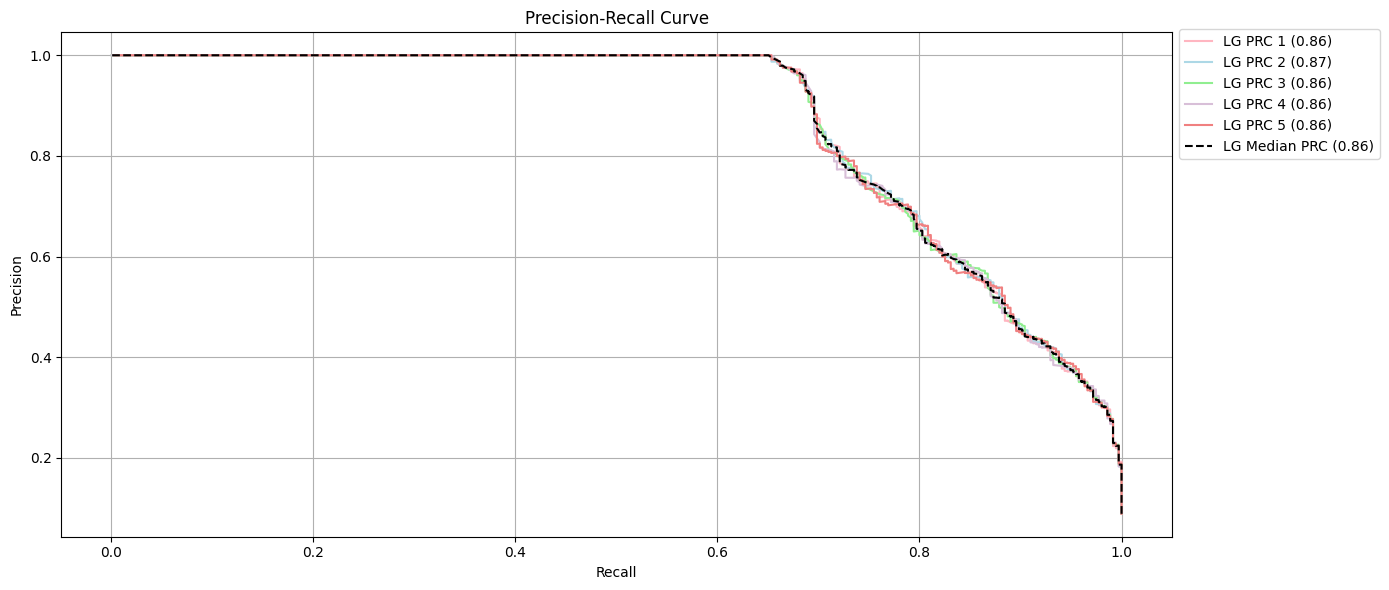

In [ ]:

########################################################################
plt.figure(figsize=(14, 6))

LG_precision_1 = LG_Precision_Recall_MyFunctiondf_1['Precision']
LG_recall_1 = LG_Precision_Recall_MyFunctiondf_1['Recall']
LG_thresholds_1 = LG_Precision_Recall_MyFunctiondf_1['Threshold']

LG_precision_2 = LG_Precision_Recall_MyFunctiondf_2['Precision']
LG_recall_2 = LG_Precision_Recall_MyFunctiondf_2['Recall']
LG_thresholds_2 = LG_Precision_Recall_MyFunctiondf_2['Threshold']

LG_precision_3 = LG_Precision_Recall_MyFunctiondf_3['Precision']
LG_recall_3 = LG_Precision_Recall_MyFunctiondf_3['Recall']
LG_thresholds_3 = LG_Precision_Recall_MyFunctiondf_3['Threshold']

LG_precision_4 = LG_Precision_Recall_MyFunctiondf_4['Precision']
LG_recall_4 = LG_Precision_Recall_MyFunctiondf_4['Recall']
LG_thresholds_4 = LG_Precision_Recall_MyFunctiondf_4['Threshold']

LG_precision_5 = LG_Precision_Recall_MyFunctiondf_5['Precision']
LG_recall_5 = LG_Precision_Recall_MyFunctiondf_5['Recall']
LG_thresholds_5 = LG_Precision_Recall_MyFunctiondf_5['Threshold']



LG_median_precision = np.median([LG_precision_1, LG_precision_2, LG_precision_3, LG_precision_4, LG_precision_5], axis=0)
LG_median_recall = np.median([LG_recall_1, LG_recall_2, LG_recall_3, LG_recall_4, LG_recall_5], axis=0)

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']


def sort_and_calculate_auc(recall, precision):
    # Combine recall and precision into a single array and sort by recall
    recall_precision = sorted(zip(recall, precision), key=lambda x: x[0])
    sorted_recall, sorted_precision = zip(*recall_precision)

    # Calculate AUC
    return auc(sorted_recall, sorted_precision)


# Calculate Average Precision (AP) for each dataset
# Calculate Average Precision (AP) for each dataset
LG_AP_1 = sort_and_calculate_auc(LG_recall_1, LG_precision_1)
LG_AP_2 = sort_and_calculate_auc(LG_recall_2, LG_precision_2)
LG_AP_3 = sort_and_calculate_auc(LG_recall_3, LG_precision_3)
LG_AP_4 = sort_and_calculate_auc(LG_recall_4, LG_precision_4)
LG_AP_5 = sort_and_calculate_auc(LG_recall_5, LG_precision_5)
LG_AP_M = sort_and_calculate_auc(LG_median_recall, LG_median_precision)


# Plotting the Precision-Recall curves
plt.figure(figsize=(14, 6))
plt.plot(LG_recall_1, LG_precision_1, label=f'LG PRC 1 ({LG_AP_1:.2f})', color=colors[0])
plt.plot(LG_recall_2, LG_precision_2, label=f'LG PRC 2 ({LG_AP_2:.2f})', color=colors[1])
plt.plot(LG_recall_3, LG_precision_3, label=f'LG PRC 3 ({LG_AP_3:.2f})', color=colors[2])
plt.plot(LG_recall_4, LG_precision_4, label=f'LG PRC 4 ({LG_AP_5:.2f})', color=colors[3])
plt.plot(LG_recall_5, LG_precision_5, label=f'LG PRC 5 ({LG_AP_5:.2f})', color=colors[4])
plt.plot(LG_median_recall, LG_median_precision, label= f'LG Median PRC ({LG_AP_M:.2f})', color=colors[5], linestyle='--')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Place a legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


# LG Histogram

In [ ]:
LG_true_labels_pred_1, LG_true_labels_pred_2, LG_true_labels_pred_3, LG_true_labels_pred_4, LG_true_labels_pred_5 = LG_true_labels_pred_list


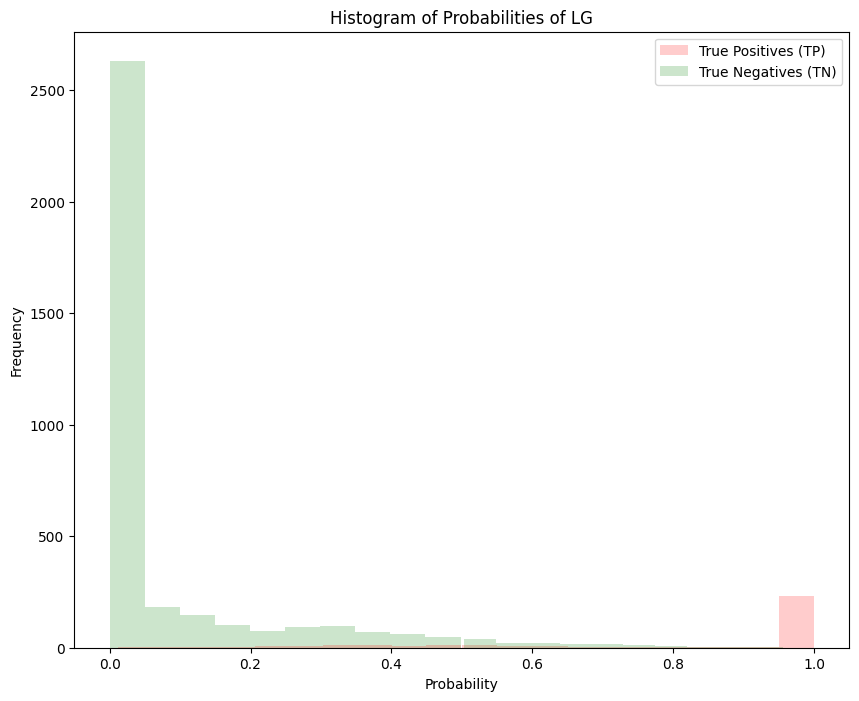

In [ ]:
TP_LG = LG_true_labels_pred_3[(LG_true_labels_pred_3['True_Label'] == 1) & (LG_true_labels_pred_3['Predicted_Label'] == 1)]
TN_LG = LG_true_labels_pred_3[(LG_true_labels_pred_3['True_Label'] == 0) & (LG_true_labels_pred_3['Predicted_Label'] == 0)]
FP_LG = LG_true_labels_pred_3[(LG_true_labels_pred_3['True_Label'] == 0) & (LG_true_labels_pred_3['Predicted_Label'] == 1)]
FN_LG = LG_true_labels_pred_3[(LG_true_labels_pred_3['True_Label'] == 1) & (LG_true_labels_pred_3['Predicted_Label'] == 0)]

TP_LG = TP_LG[['Predicted_Probability']]
TN_LG = TN_LG[['Predicted_Probability']]
FP_LG = FP_LG[['Predicted_Probability']]
FN_LG = FN_LG[['Predicted_Probability']]
# Set the size of the figure
plt.figure(figsize=(10, 8))  # Width=12 inches, Height=8 inches, for example

# Assuming prob_TP, prob_TN, prob_FP, prob_FN are your arrays of probability values
plt.hist(TP_LG, bins=10, alpha=0.2, color='red', label='True Positives (TP)')  # Blue for TP
plt.hist(TN_LG, bins=10, alpha=0.2, color='green', label='True Negatives (TN)')  # Same color for FN

plt.hist(FN_LG, bins=10, alpha=0.2, color='red')  # Green for TN
plt.hist(FP_LG, bins=10, alpha=0.2, color='green')  # Same color for FP

plt.title('Histogram of Probabilities of LG')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()  # Adds a legend to distinguish the different histograms
plt.show()


# Models NO CLASS WEIGHTS

# LG NCW

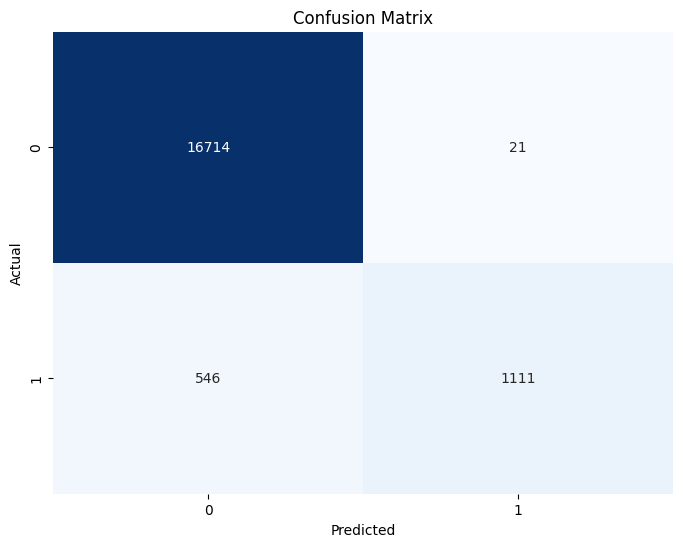

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16735
           1       0.98      0.67      0.80      1657

    accuracy                           0.97     18392
   macro avg       0.97      0.83      0.89     18392
weighted avg       0.97      0.97      0.97     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression


def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df


# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)



# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]
# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
lg_model_ncw = LogisticRegression(**LG_hyperparameters)

# class_weights_list = [{0: 1, 1: 3}]

# # Assuming you have one set of class weights. If more, iterate over them.
# weights = class_weights_list[0]

# # Compute sample weights
# sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

# Fit the model
lg_model_ncw.fit(X_train_processed, y_train)# sample_weight=sample_weights

# Make predictions
y_pred = lg_model_ncw.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


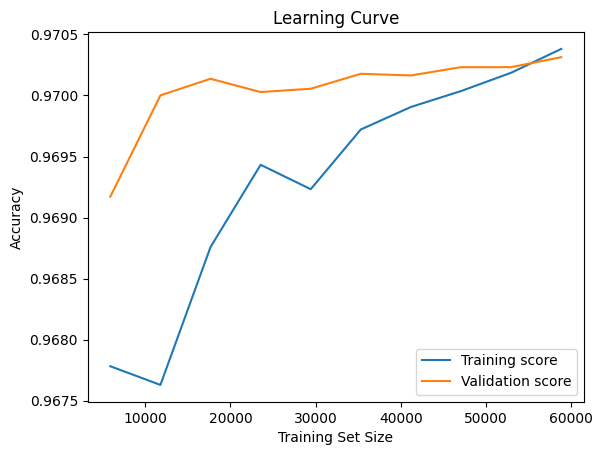

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lg_model_ncw, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
LG_classification_report_df_NCW = pd.DataFrame(report_dict).transpose()


LG_classification_report_df_NCW = LG_classification_report_df_NCW[['precision', 'recall', 'f1-score']]


second_row = LG_classification_report_df_NCW.iloc[1]

# Convert the filtered row to a new DataFrame
LG_classification_report_df_NCW = pd.DataFrame(second_row).transpose()

print(LG_classification_report_df_NCW)


   precision    recall  f1-score
1   0.981449  0.670489  0.796701


In [ ]:
# Fit the model
lg_model.fit(X_train_processed, y_train, sample_weight=sample_weights)

# Retrieve the feature names from the ColumnTransformer
# This will include the original feature names plus any new features created by one-hot encoding
feature_names_transformed = preprocessor.get_feature_names_out()

# Check the number of transformed features
print("Number of transformed features:", len(feature_names_transformed))


Number of transformed features: 18


In [ ]:
# Get the coefficients from the model
coefficients = lg_model.coef_[0]

# Check that the number of coefficients matches the number of transformed features
if len(feature_names_transformed) != len(coefficients):
    raise ValueError(f"Number of transformed features ({len(feature_names_transformed)}) does not match number of coefficients ({len(coefficients)})")


                                           Feature  Coefficient
0                       num__HbA1c_level_cat_x_age    -0.090490
1                               num__bmi^2_x_age^2    -1.153936
2                                   num__bmi_x_age     3.125015
3                                 num__HbA1c_level     0.249115
4                         num__blood_glucose_level    -0.084311
5                                         num__age    -0.460074
6                                         num__bmi    -0.086780
7                                cat__hypertension     0.713200
8                               cat__heart_disease     0.822047
9                                  cat__gender_cat     0.295838
10                      cat__smoking_history_cat_2     0.036914
11  cat__blood_glucose_level_cat_x_HbA1c_level_cat     5.631410
12              remainder__blood_glucose_level_cat   -10.719236
13            remainder__blood_glucose_level_cat_1     7.612966
14                              remainde

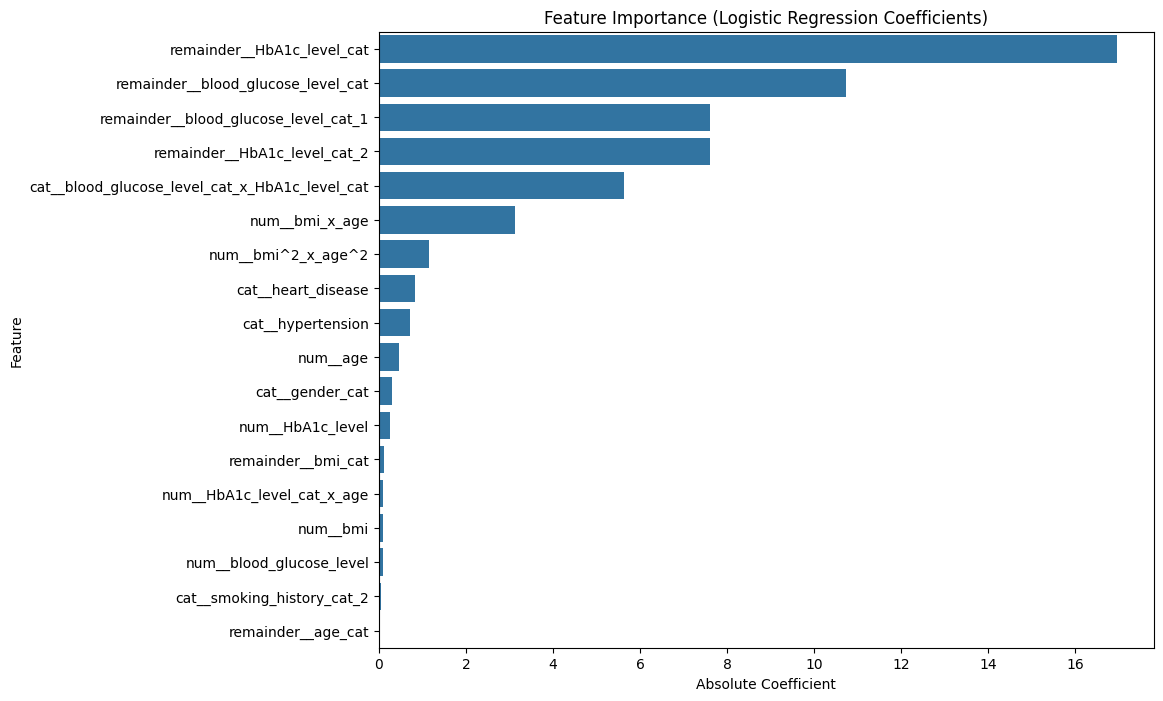

In [ ]:
# Create the DataFrame with the correct feature names
feature_importance = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Coefficient': coefficients
})

# Plotting the feature importance as before...
print(feature_importance)

# Sort the features by the absolute value of their coefficient for better visualization
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance using Seaborn's bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


# XG BOOST NCW

In [ ]:
XGB_hyperparameters['scale_pos_weight'] = None # not perfoming that well especially learning curve
print(XGB_hyperparameters)

{'gamma': 2.0656885664152327, 'max_depth': 4, 'objective': 'binary:logistic', 'reg_alpha': 0.1034061883116515, 'subsample': 0.8487967144301252, 'reg_lambda': 1.439060422705018, 'eval_metric': 'logloss', 'tree_method': 'gpu_hist', 'n_estimators': 384, 'learning_rate': 0.021246762152162965, 'max_delta_step': 0, 'colsample_bytree': 0.6012962846453576, 'min_child_weight': 1, 'scale_pos_weight': None}


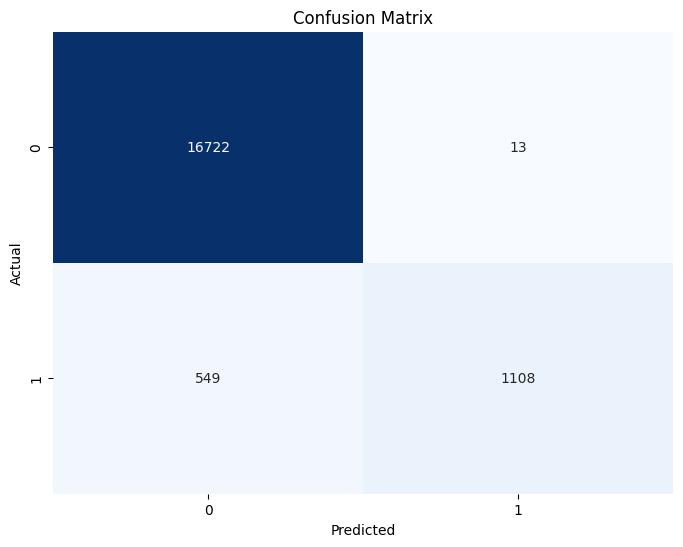

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16735
           1       0.99      0.67      0.80      1657

    accuracy                           0.97     18392
   macro avg       0.98      0.83      0.89     18392
weighted avg       0.97      0.97      0.97     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression


def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat','age_cat', 'bmi_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# bmi_cat_x_age
# age_cat_x_bmi excluded for the moment both

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]
# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
XG_model_NCW = XGBClassifier(**XGB_hyperparameters)

# Fit the model
XG_model_NCW.fit(X_train_processed, y_train)

# Make predictions
y_pred = XG_model_NCW.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
XGB_classification_report_df_NCW = pd.DataFrame(report_dict).transpose()


XGB_classification_report_df_NCW = XGB_classification_report_df_NCW[['precision', 'recall', 'f1-score']]


second_row = XGB_classification_report_df_NCW.iloc[1]

# Convert the filtered row to a new DataFrame
XGB_classification_report_df_NCW = pd.DataFrame(second_row).transpose()

print(XGB_classification_report_df_NCW)


   precision    recall  f1-score
1   0.988403  0.668678  0.797696


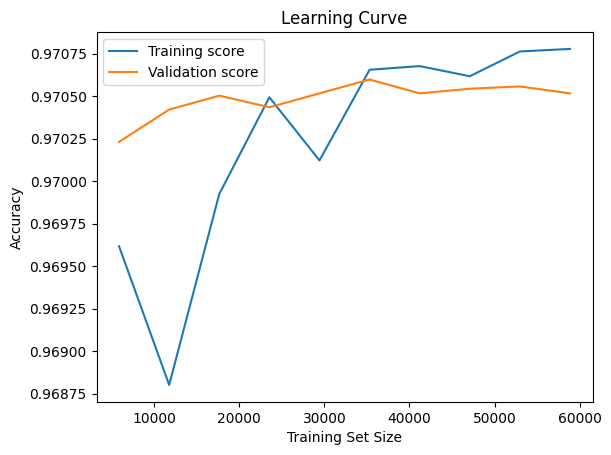

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    XG_model_NCW, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


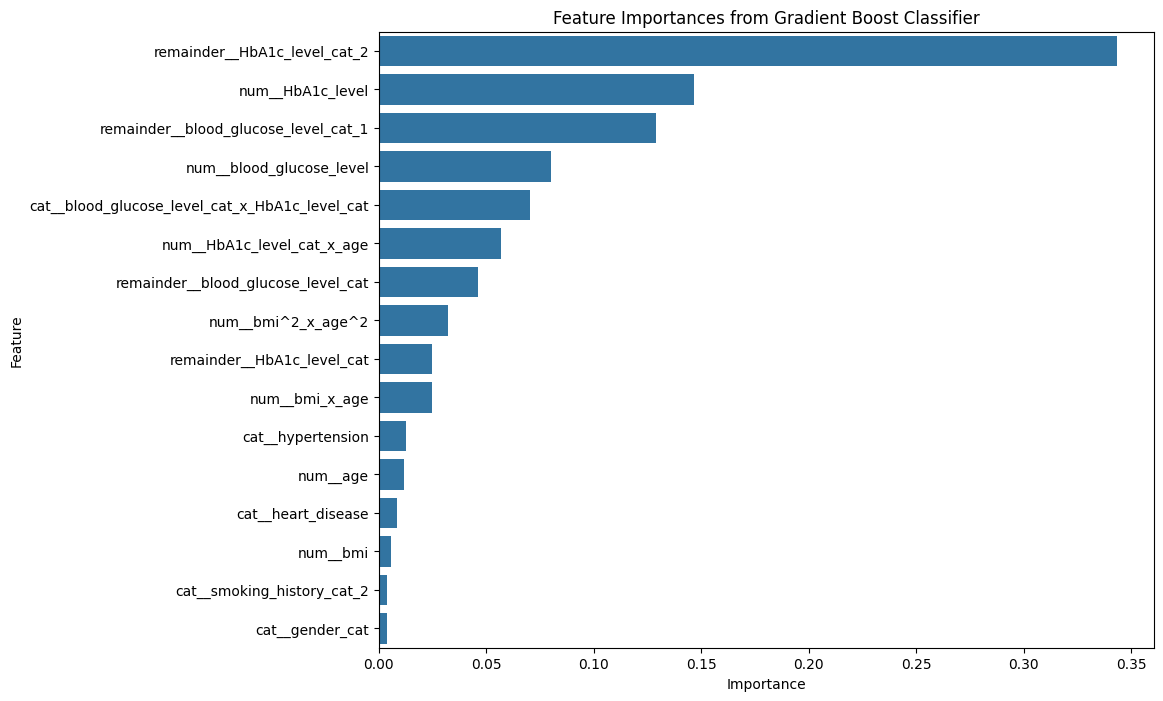

In [ ]:
importances = XG_model_NCW.feature_importances_

# Retrieve the feature names from ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# RF NCW

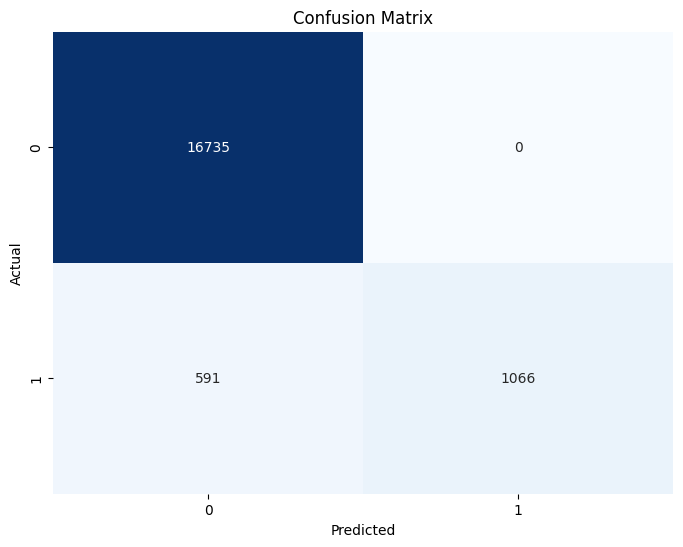

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16735
           1       1.00      0.64      0.78      1657

    accuracy                           0.97     18392
   macro avg       0.98      0.82      0.88     18392
weighted avg       0.97      0.97      0.96     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression

# Function to add interaction terms to the dataframe
def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df



# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)



# Define the feature categories including the interaction terms
# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]

# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, num_features),
#         ('cat', cat_pipeline, cat_features)
#     ],
#     remainder='passthrough'
# )

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier
RF_model_NCW = RandomForestClassifier(**RF_hyperparameters)

# Fit the model
RF_model_NCW.fit(X_train_processed, y_train)

# Make predictions
y_pred = RF_model_NCW.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
RF_classification_report_df_NCW = pd.DataFrame(report_dict).transpose()


RF_classification_report_df_NCW = RF_classification_report_df_NCW[['precision', 'recall', 'f1-score']]


second_row = RF_classification_report_df_NCW.iloc[1]

# Convert the filtered row to a new DataFrame
RF_classification_report_df_NCW = pd.DataFrame(second_row).transpose()

print(RF_classification_report_df_NCW)


   precision    recall  f1-score
1        1.0  0.656608  0.792714


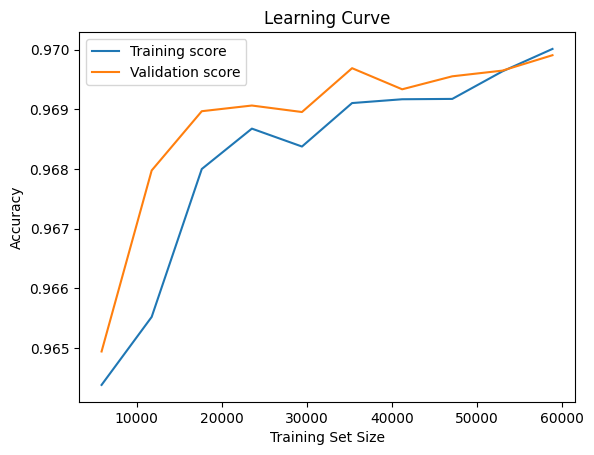

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    RF_model_NCW, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


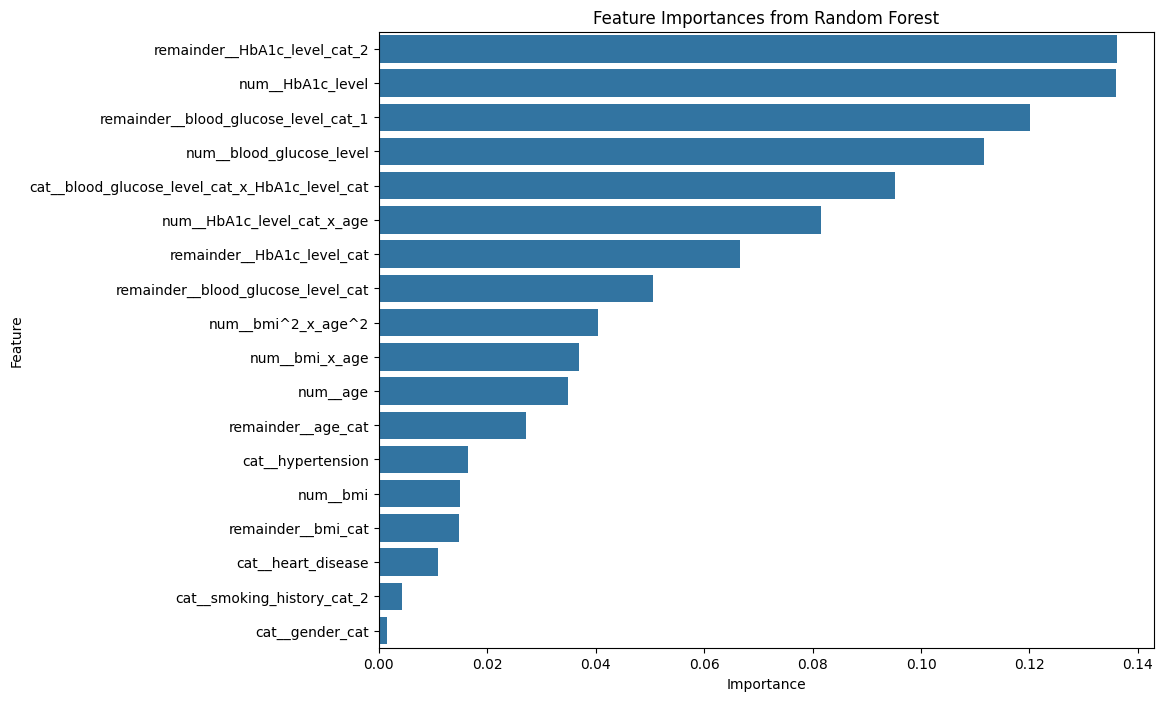

In [ ]:
# Get the feature importances
importances = RF_model_NCW.feature_importances_

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame of features and their importances
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# GB NCW

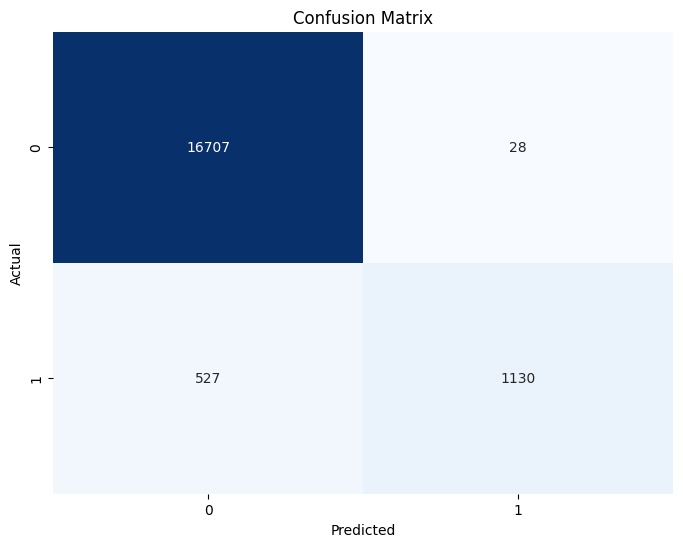

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16735
           1       0.98      0.68      0.80      1657

    accuracy                           0.97     18392
   macro avg       0.97      0.84      0.89     18392
weighted avg       0.97      0.97      0.97     18392



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight


def add_interaction_terms(df):

    df['blood_glucose_level_cat_x_HbA1c_level_cat'] = df['blood_glucose_level_cat'] *  df['HbA1c_level_cat']  # both ordianl

    df['HbA1c_level_cat_x_age'] = df['HbA1c_level_cat'] * df['age']  # HbA1c_level_cat * bmi interaction

    df['bmi^2_x_age^2'] = df['bmi'] **2  * df['age'] **2  # once

    df['bmi_x_age'] = df['bmi'] * df['age']

    return df

# Function to generate a random sample of specified size
def random_sample(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Function to generate X and y
def generate_X_y(df):
    columns_to_drop = ['gender', 'smoking_history', 'diabetes', 'blood_glucose_level_cat', "HbA1c_level_cat", 'smoking_history_cat']
    target_column = 'diabetes'
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_column]
    return X, y

# Sample the data and add interaction terms
sample_size = 91960  # Set your sample size
sample = random_sample(diabetesDf, sample_size)
sample_with_interactions = add_interaction_terms(sample)

# Generate features and target
X, y = generate_X_y(sample_with_interactions)

# Define the feature categories including the interaction terms
num_features = ['HbA1c_level_cat_x_age', 'bmi^2_x_age^2', 'bmi_x_age',

                "HbA1c_level", "blood_glucose_level", 'age', 'bmi']  # Numeric feature names including new interaction terms

cat_features = ['hypertension', 'heart_disease', 'gender_cat', "smoking_history_cat_2", 'blood_glucose_level_cat_x_HbA1c_level_cat'
]
# Define the pipelines for numeric and categorical features
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('passthrough', 'passthrough')])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='passthrough'
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the gb_model
# Assuming hyperparameters is a dictionary containing the parameters for GradientBoostingClassifier

GB_model_NCW = GradientBoostingClassifier(**GB_hyperparameters)

# class_weights_list = [{0: 1, 1: 4}]

# # Assuming you have one set of class weights. If more, iterate over them.
# weights = class_weights_list[0]

# # Compute sample weights
# sample_weights = compute_sample_weight(class_weight=weights, y=y_train)

# Fit the gb_model
GB_model_NCW.fit(X_train_processed, y_train)

# Make predictions
y_pred = GB_model_NCW.predict(X_test_processed)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

# Generating the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
GB_classification_report_df_NCW = pd.DataFrame(report_dict).transpose()


GB_classification_report_df_NCW = GB_classification_report_df_NCW[['precision', 'recall', 'f1-score']]


second_row = GB_classification_report_df_NCW.iloc[1]

# Convert the filtered row to a new DataFrame
GB_classification_report_df_NCW = pd.DataFrame(second_row).transpose()

print(GB_classification_report_df_NCW)


   precision    recall  f1-score
1    0.97582  0.681955  0.802842


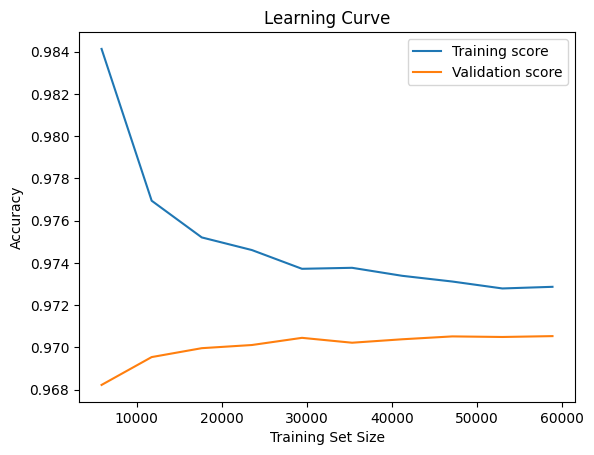

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    GB_model_NCW, X_train_processed, y_train, train_sizes =np.linspace(0.1, 1.0, 10), cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


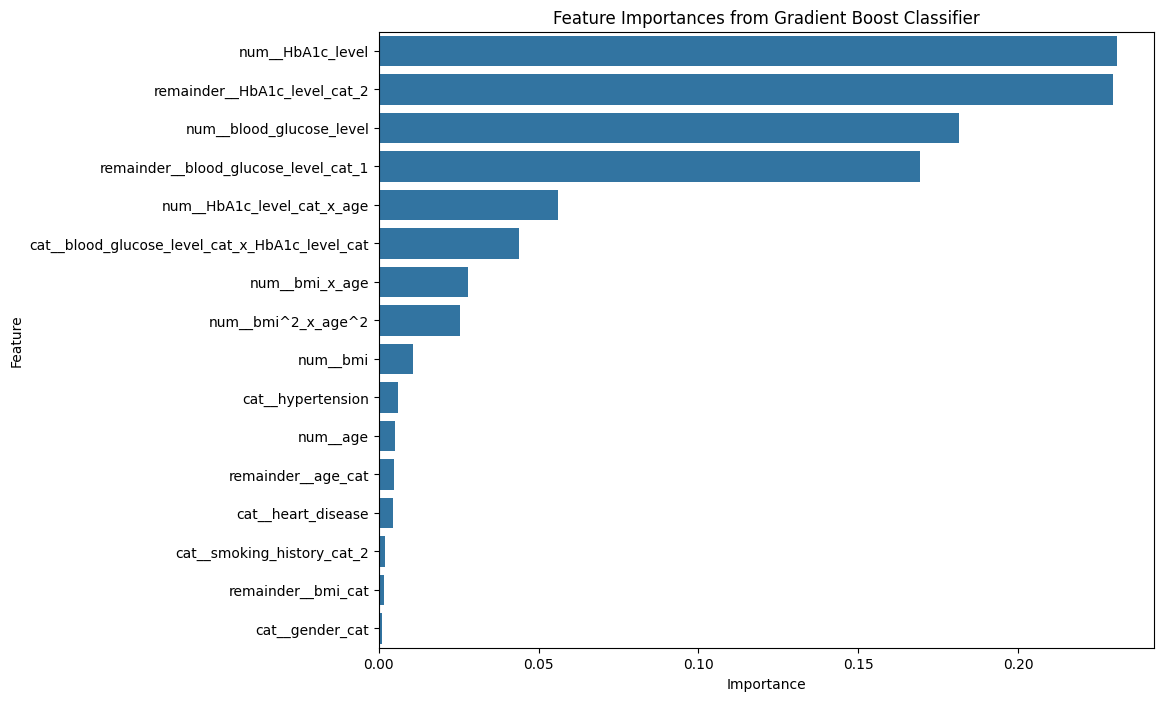

In [ ]:
importances = GB_model_NCW.feature_importances_

# Retrieve the feature names from ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# PRC REPRODUCIBILITY ALL

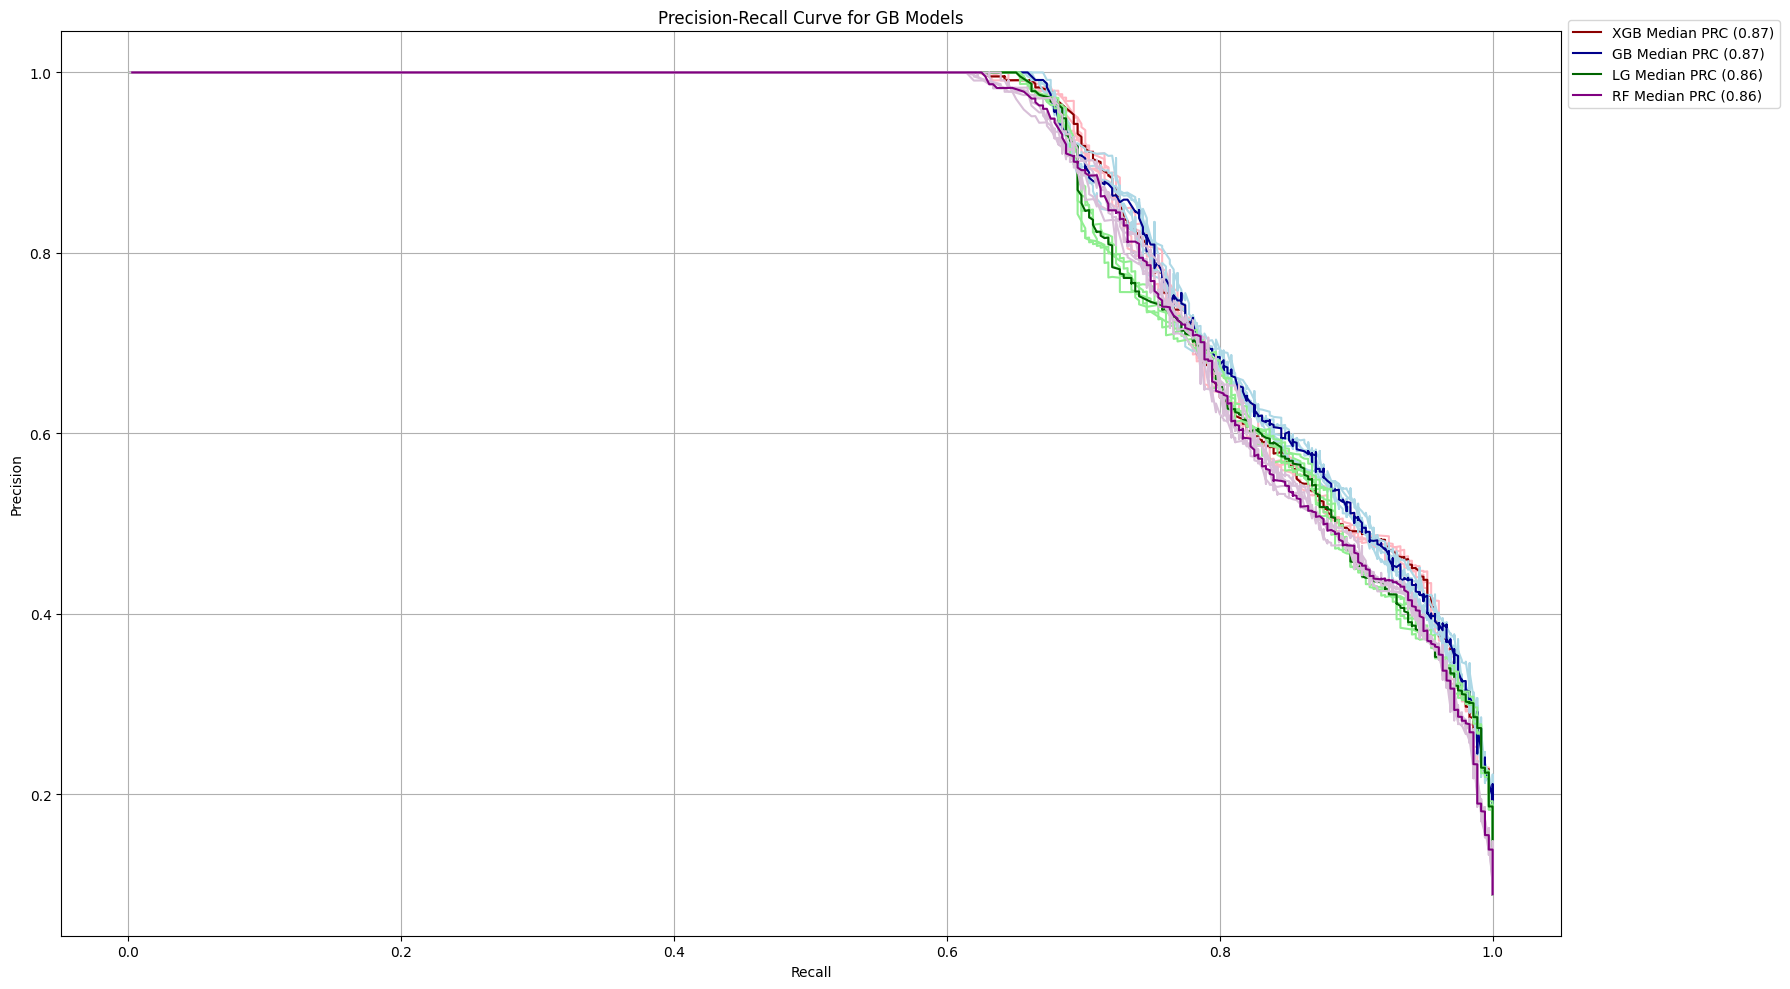

In [ ]:
plt.figure(figsize=(18, 10))

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']

plt.plot(XG_recall_1, XG_precision_1, color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, color=colors[0])
plt.plot(XG_recall_3, XG_precision_3, color=colors[0])
plt.plot(XG_recall_4, XG_precision_4, color=colors[0])
plt.plot(XG_recall_5, XG_precision_5, color=colors[0])
plt.plot(XG_median_recall, XG_median_precision, label= f'XGB Median PRC ({XG_AP_M:.2f})', color= 'darkred')

plt.plot(GB_recall_1, GB_precision_1, color=colors[1])
plt.plot(GB_recall_2, GB_precision_2, color=colors[1])
plt.plot(GB_recall_3, GB_precision_3, color=colors[1])
plt.plot(GB_recall_4, GB_precision_4, color=colors[1])
plt.plot(GB_recall_5, GB_precision_5, color=colors[1])
plt.plot(GB_median_recall, GB_median_precision, label= f'GB Median PRC ({GB_AP_M:.2f})', color='darkblue')

# Plotting the Precision-Recall curves
#plt.figure(figsize=(14, 6))
plt.plot(LG_recall_1, LG_precision_1, color=colors[2])
plt.plot(LG_recall_2, LG_precision_2, color=colors[2])
plt.plot(LG_recall_3, LG_precision_3, color=colors[2])
plt.plot(LG_recall_4, LG_precision_4, color=colors[2])
plt.plot(LG_recall_5, LG_precision_5, color=colors[2])
plt.plot(LG_median_recall, LG_median_precision, label= f'LG Median PRC ({LG_AP_M:.2f})', color='darkgreen')

# Plotting the Precision-Recall curves
#plt.figure(figsize=(14, 6))
plt.plot(RF_recall_1, RF_precision_1, color=colors[3])
plt.plot(RF_recall_2, RF_precision_2, color=colors[3])
plt.plot(RF_recall_3, RF_precision_3, color=colors[3])
plt.plot(RF_recall_4, RF_precision_4, color=colors[3])
plt.plot(RF_recall_5, RF_precision_5, color=colors[3])
plt.plot(RF_median_recall, RF_median_precision, label= f'RF Median PRC ({RF_AP_M:.2f})', color= 'purple')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GB Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()


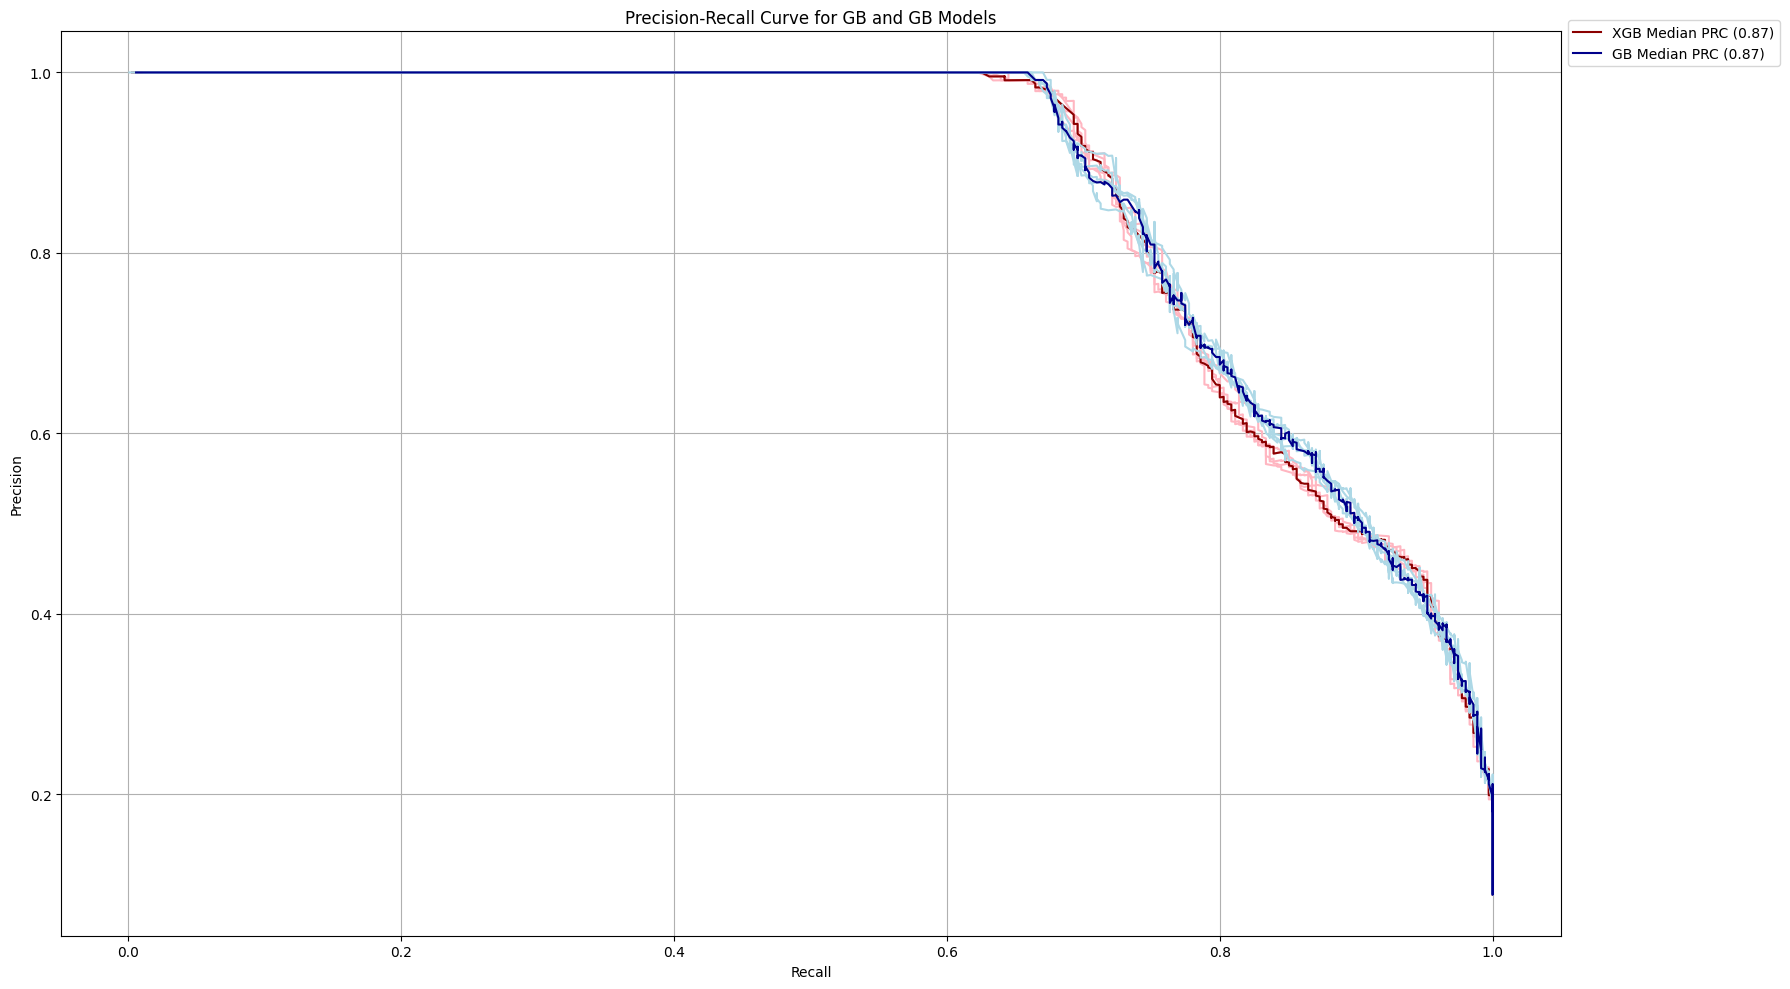

In [ ]:
plt.figure(figsize=(18, 10))

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']

plt.plot(XG_recall_1, XG_precision_1, color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, color=colors[0])
plt.plot(XG_recall_3, XG_precision_3, color=colors[0])
plt.plot(XG_recall_4, XG_precision_4, color=colors[0])
plt.plot(XG_recall_5, XG_precision_5, color=colors[0])
plt.plot(XG_median_recall, XG_median_precision, label= f'XGB Median PRC ({XG_AP_M:.2f})', color= 'darkred')

plt.plot(GB_recall_1, GB_precision_1, color=colors[1])
plt.plot(GB_recall_2, GB_precision_2, color=colors[1])
plt.plot(GB_recall_3, GB_precision_3, color=colors[1])
plt.plot(GB_recall_4, GB_precision_4, color=colors[1])
plt.plot(GB_recall_5, GB_precision_5, color=colors[1])
plt.plot(GB_median_recall, GB_median_precision, label= f'GB Median PRC ({GB_AP_M:.2f})', color='darkblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GB and GB Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

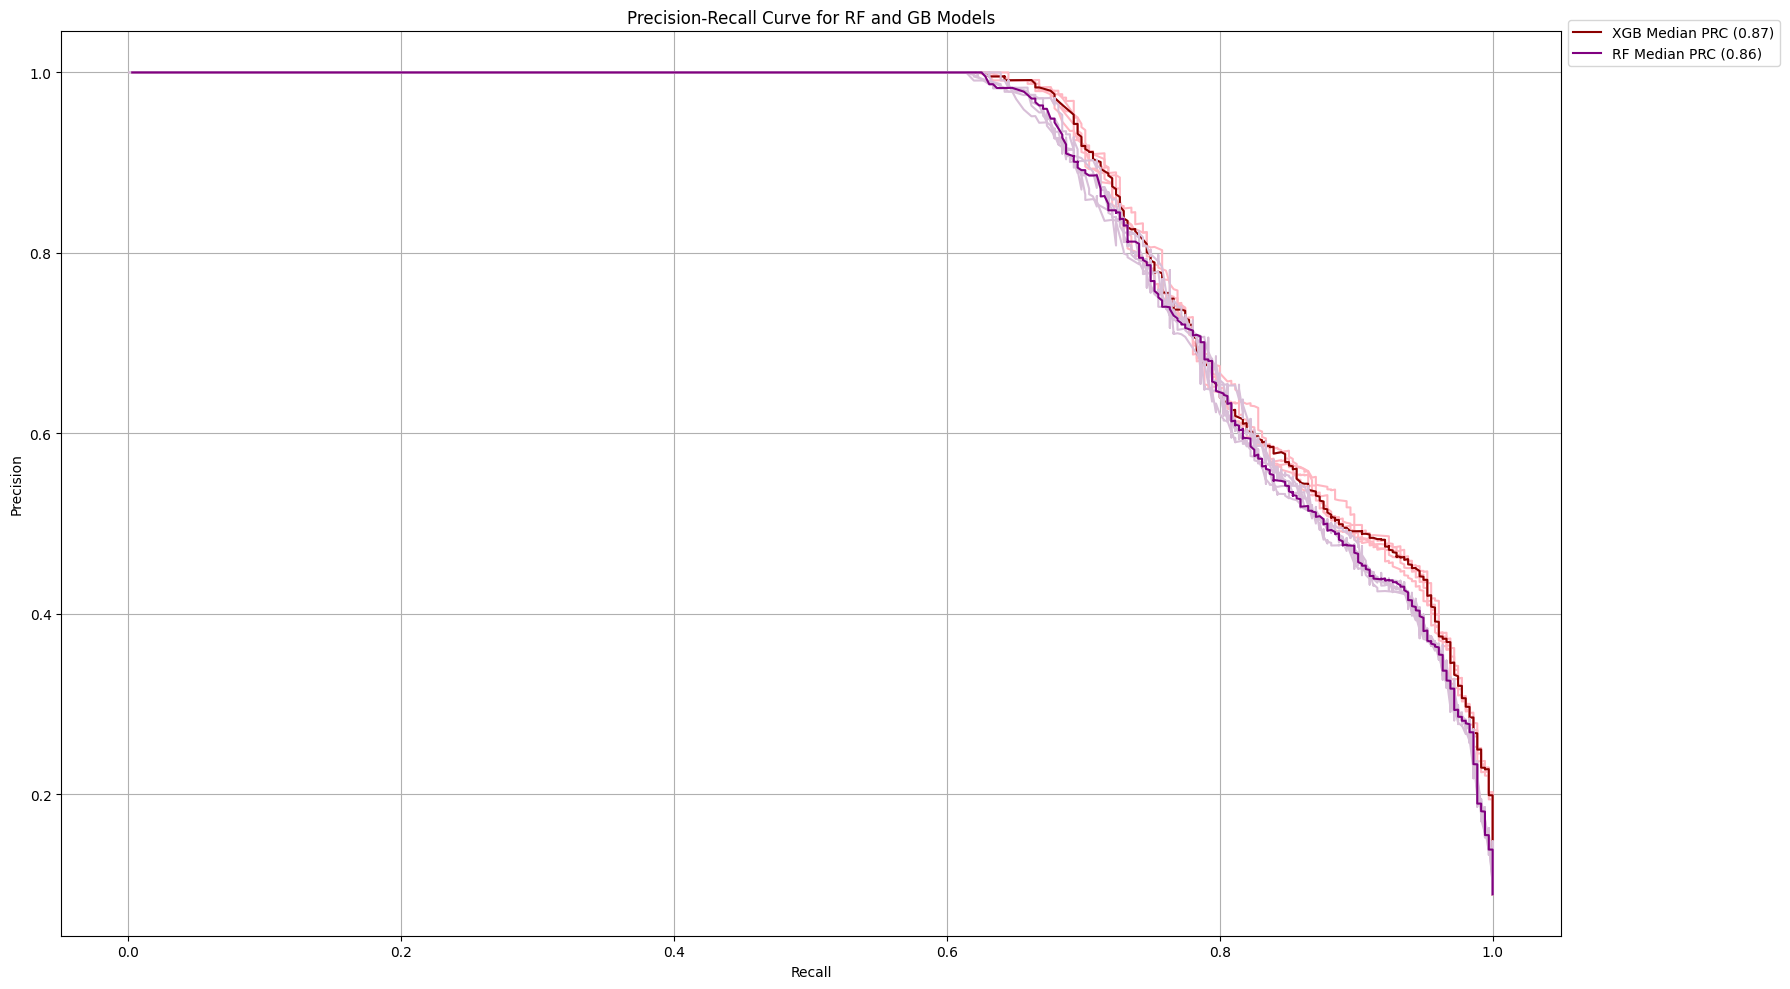

In [ ]:
plt.figure(figsize=(18, 10))

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']

plt.plot(XG_recall_1, XG_precision_1, color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, color=colors[0])
plt.plot(XG_recall_3, XG_precision_3, color=colors[0])
plt.plot(XG_recall_4, XG_precision_4, color=colors[0])
plt.plot(XG_recall_5, XG_precision_5, color=colors[0])
plt.plot(XG_median_recall, XG_median_precision, label= f'XGB Median PRC ({XG_AP_M:.2f})', color= 'darkred')

plt.plot(RF_recall_1, RF_precision_1, color=colors[3])
plt.plot(RF_recall_2, RF_precision_2, color=colors[3])
plt.plot(RF_recall_3, RF_precision_3, color=colors[3])
plt.plot(RF_recall_4, RF_precision_4, color=colors[3])
plt.plot(RF_recall_5, RF_precision_5, color=colors[3])
plt.plot(RF_median_recall, RF_median_precision, label= f'RF Median PRC ({RF_AP_M:.2f})', color= 'purple')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RF and GB Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

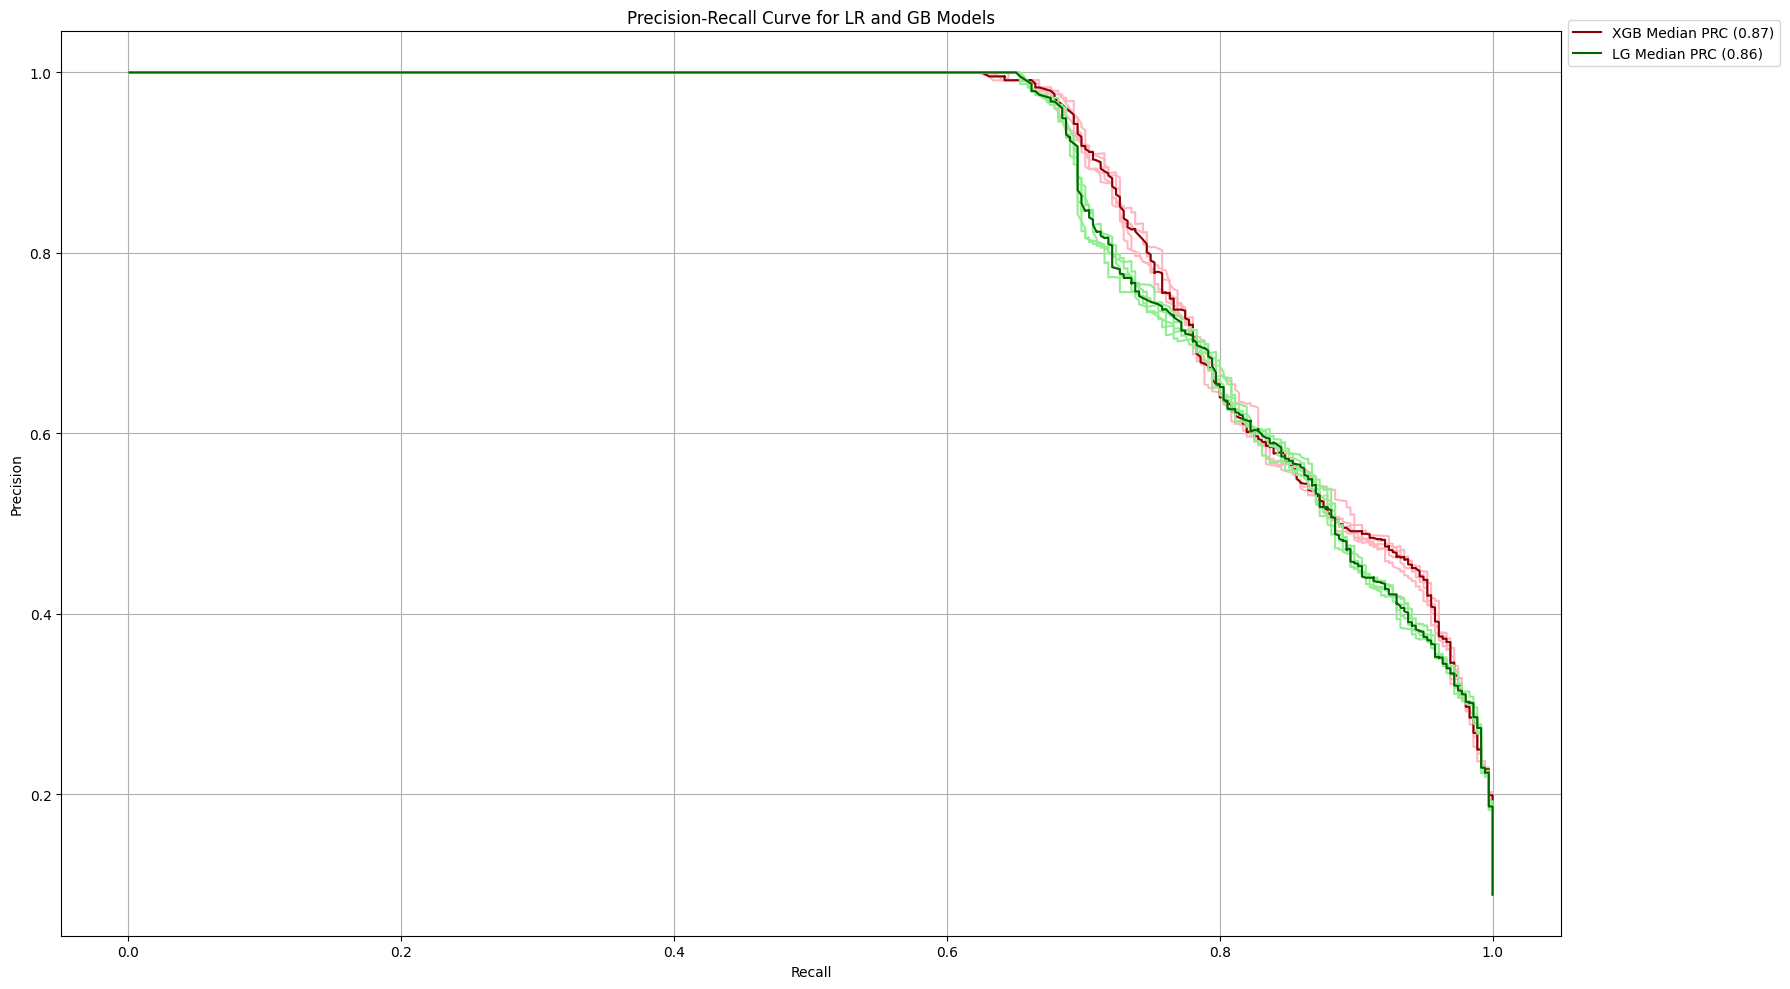

In [ ]:
plt.figure(figsize=(18, 10))

colors = ['lightpink', 'lightblue', 'lightgreen', 'thistle', 'lightcoral', 'black']

plt.plot(XG_recall_1, XG_precision_1, color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, color=colors[0])
plt.plot(XG_recall_3, XG_precision_3, color=colors[0])
plt.plot(XG_recall_4, XG_precision_4, color=colors[0])
plt.plot(XG_recall_5, XG_precision_5, color=colors[0])
plt.plot(XG_median_recall, XG_median_precision, label= f'XGB Median PRC ({XG_AP_M:.2f})', color= 'darkred')

plt.plot(LG_recall_1, LG_precision_1, color=colors[2])
plt.plot(LG_recall_2, LG_precision_2, color=colors[2])
plt.plot(LG_recall_3, LG_precision_3, color=colors[2])
plt.plot(LG_recall_4, LG_precision_4, color=colors[2])
plt.plot(LG_recall_5, LG_precision_5, color=colors[2])
plt.plot(LG_median_recall, LG_median_precision, label= f'LG Median PRC ({LG_AP_M:.2f})', color='darkgreen')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LR and GB Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

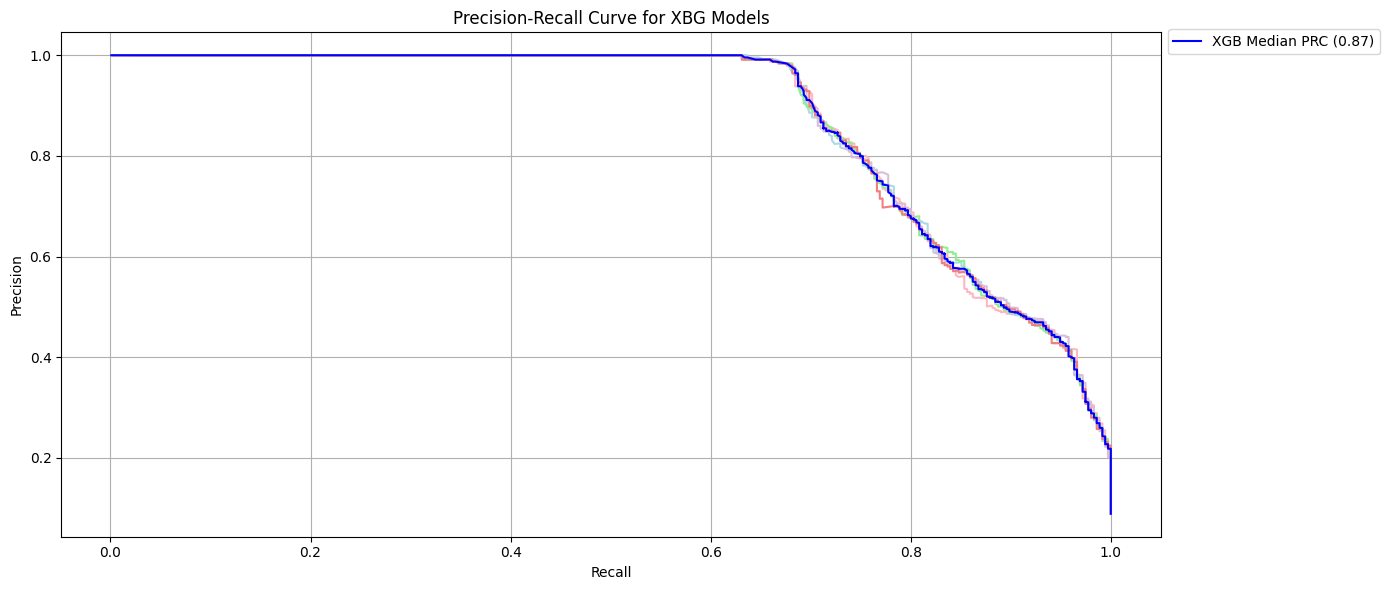

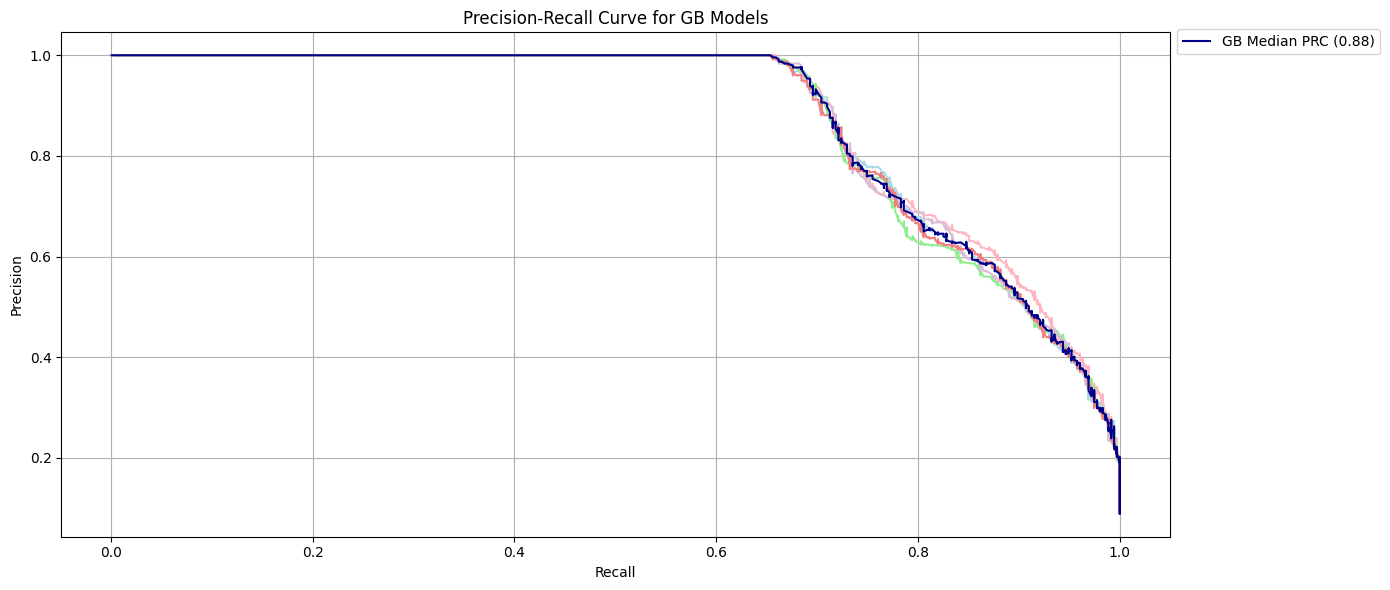

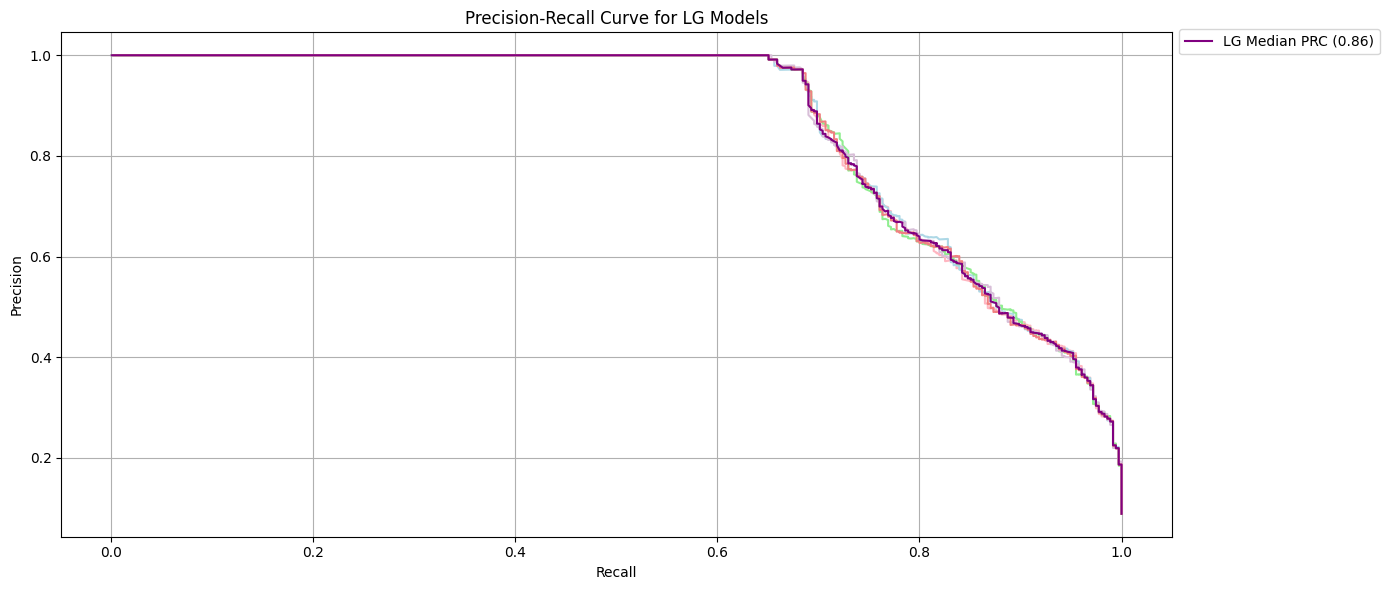

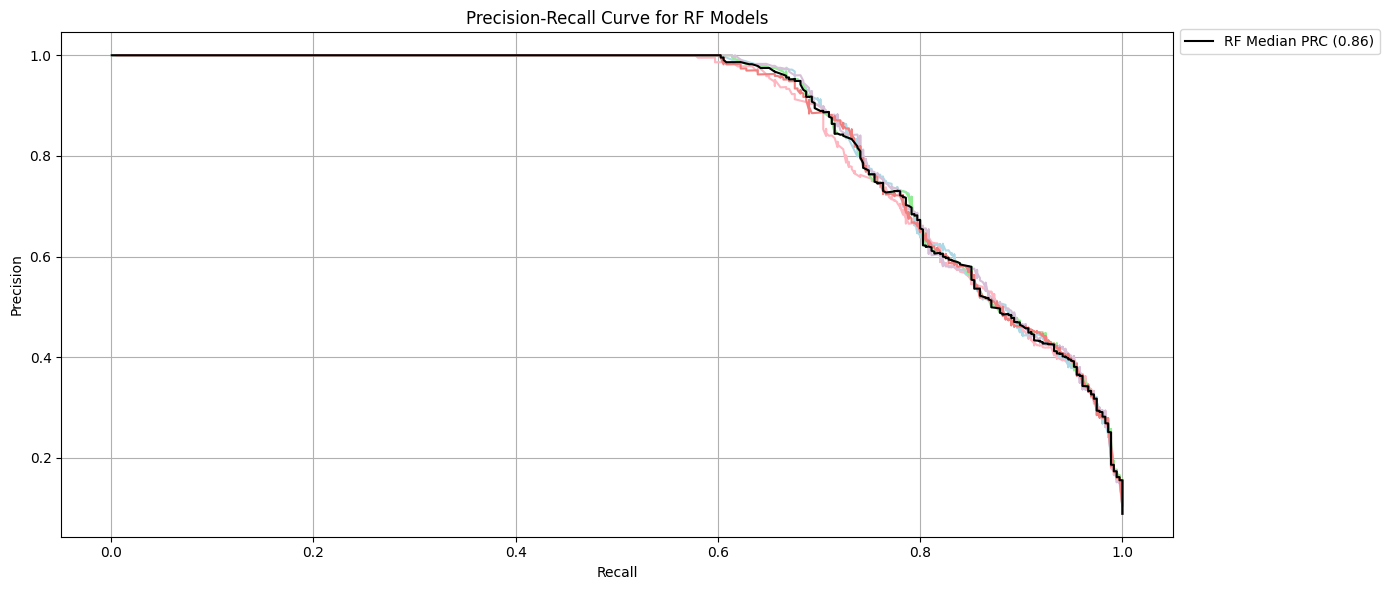

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(XG_recall_1, XG_precision_1, color=colors[0])
plt.plot(XG_recall_2, XG_precision_2, color=colors[1])
plt.plot(XG_recall_3, XG_precision_3, color=colors[2])
plt.plot(XG_recall_4, XG_precision_4, color=colors[3])
plt.plot(XG_recall_5, XG_precision_5, color=colors[4])
plt.plot(XG_median_recall, XG_median_precision, label= f'XGB Median PRC ({XG_AP_M:.2f})', color= 'blue')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XBG Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.plot(GB_recall_1, GB_precision_1, color=colors[0])
plt.plot(GB_recall_2, GB_precision_2, color=colors[1])
plt.plot(GB_recall_3, GB_precision_3, color=colors[2])
plt.plot(GB_recall_4, GB_precision_4, color=colors[3])
plt.plot(GB_recall_5, GB_precision_5, color=colors[4])
plt.plot(GB_median_recall, GB_median_precision, label= f'GB Median PRC ({GB_AP_M:.2f})', color='darkblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GB Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(LG_recall_1, LG_precision_1, color=colors[0])
plt.plot(LG_recall_2, LG_precision_2, color=colors[1])
plt.plot(LG_recall_3, LG_precision_3, color=colors[2])
plt.plot(LG_recall_4, LG_precision_4, color=colors[3])
plt.plot(LG_recall_5, LG_precision_5, color=colors[4])
plt.plot(LG_median_recall, LG_median_precision, label= f'LG Median PRC ({LG_AP_M:.2f})', color='purple')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LG Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(RF_recall_1, RF_precision_1, color=colors[0])
plt.plot(RF_recall_2, RF_precision_2, color=colors[1])
plt.plot(RF_recall_3, RF_precision_3, color=colors[2])
plt.plot(RF_recall_4, RF_precision_4, color=colors[3])
plt.plot(RF_recall_5, RF_precision_5, color=colors[4])
plt.plot(RF_median_recall, RF_median_precision, label= f'RF Median PRC ({RF_AP_M:.2f})', color= 'black')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RF Models')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

# Precision Recall F1 scores

In [ ]:
GB_classification_report_df['model'] = GB_classification_report_df['model'] = 'GB'
XGB_classification_report_df['model'] = XGB_classification_report_df['model'] = 'XGB'
RF_classification_report_df['model'] = RF_classification_report_df['model'] = 'RF'
LG_classification_report_df['model'] = LG_classification_report_df['model'] = 'LR'

In [ ]:
GB_classification_report_df_NCW['model'] = GB_classification_report_df_NCW['model'] = 'GB_NCW'
XGB_classification_report_df_NCW['model'] = XGB_classification_report_df_NCW['model'] = 'XGB_NCW'
RF_classification_report_df_NCW['model'] = RF_classification_report_df_NCW['model'] = 'RF_NCW'
LG_classification_report_df_NCW['model'] = LG_classification_report_df_NCW['model'] = 'LR_NCW'

In [ ]:
print(GB_classification_report_df)
print(XGB_classification_report_df)
print(RF_classification_report_df)
print(LG_classification_report_df)
print(LG_classification_report_df_NCW)
print(RF_classification_report_df_NCW)
print(XGB_classification_report_df_NCW)
print(GB_classification_report_df_NCW)

   precision    recall  f1-score model
1   0.737368  0.801448  0.768074    GB
   precision    recall  f1-score model
1   0.739058  0.805069  0.770653   XGB
   precision    recall  f1-score model
1   0.732275  0.779119  0.754971    RF
   precision    recall  f1-score model
1   0.739278  0.790585  0.764071    LR
   precision    recall  f1-score   model
1   0.981449  0.670489  0.796701  LR_NCW
   precision    recall  f1-score   model
1        1.0  0.656608  0.792714  RF_NCW
   precision    recall  f1-score    model
1   0.977332  0.676524  0.799572  XGB_NCW
   precision    recall  f1-score   model
1    0.97582  0.681955  0.802842  GB_NCW


In [ ]:
# Assuming you have the four DataFrames GB_classification_report_df, XGB_classification_report_df, RF_classification_report_df, LG_classification_report_df

# Create a list of the DataFrames to be merged
dfs_to_merge = [GB_classification_report_df, XGB_classification_report_df, RF_classification_report_df, LG_classification_report_df,
                GB_classification_report_df_NCW, XGB_classification_report_df_NCW, RF_classification_report_df_NCW, LG_classification_report_df_NCW]

# Concatenate the DataFrames vertically
classification_report_df = pd.concat(dfs_to_merge)

# Reset the index if needed
# merged_df.reset_index(drop=True, inplace=True)

print(classification_report_df)


   precision    recall  f1-score    model
1   0.737368  0.801448  0.768074       GB
1   0.739058  0.805069  0.770653      XGB
1   0.732275  0.779119  0.754971       RF
1   0.739278  0.790585  0.764071       LR
1   0.975820  0.681955  0.802842   GB_NCW
1   0.977332  0.676524  0.799572  XGB_NCW
1   1.000000  0.656608  0.792714   RF_NCW
1   0.981449  0.670489  0.796701   LR_NCW


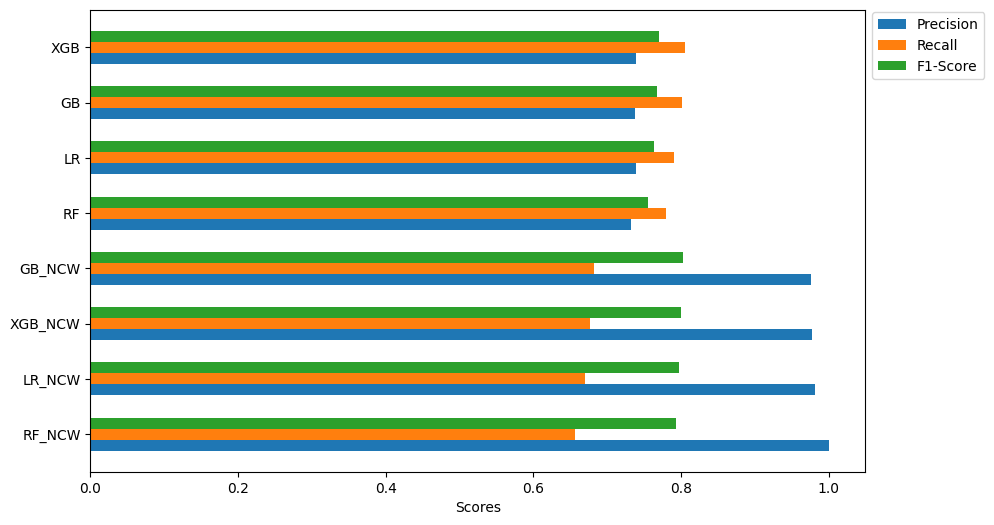

In [ ]:
# Sort the DataFrame based on 'recall' column in descending order
classification_report_df = classification_report_df.sort_values(by='recall', ascending = True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
bar_width = 0.2
index = range(len(classification_report_df))
plt.barh(index, classification_report_df['precision'], bar_width, label='Precision')
plt.barh([i + bar_width for i in index], classification_report_df['recall'], bar_width, label='Recall')
plt.barh([i + 2 * bar_width for i in index], classification_report_df['f1-score'], bar_width, label='F1-Score')

# Set Y-axis labels to be the model names
plt.yticks([i + bar_width for i in index], classification_report_df['model'])

# Set X-axis label
plt.xlabel('Scores')

# Add legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.01))

# Show the plot
plt.show()

# Probability Histogram individual

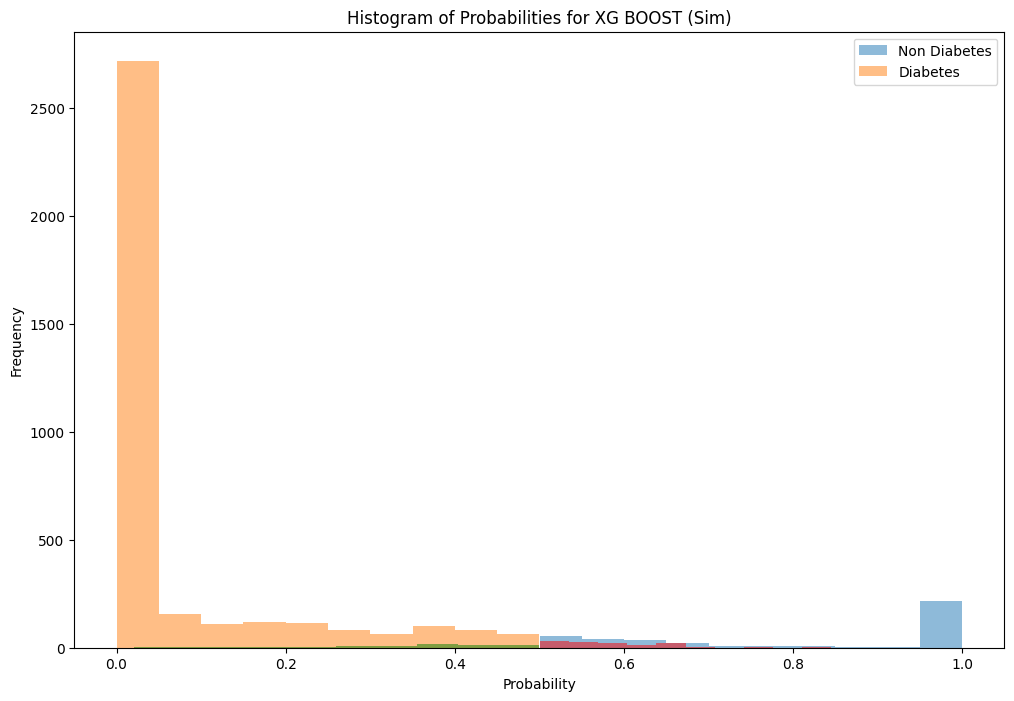

In [ ]:
#plt.hist(GB_true_labels_pred_3_probability, bins=10, edgecolor='black')
plt.figure(figsize = (12, 8))


# Create a histogram for sick probabilities
plt.hist(diabetes_XB, bins = 10, alpha = 0.5, label = 'Non Diabetes')

plt.hist(non_diabetes_XB, bins = 10, alpha = 0.5, label = 'Diabetes')

plt.hist(false_positive, bins = 10, alpha = 0.5, color = "red")

plt.hist(false_negative, bins = 10, alpha = 0.5, color = "green")

# Adding labels and title
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities for XG BOOST (Sim)')
plt.legend()

# Show the plot
plt.show()


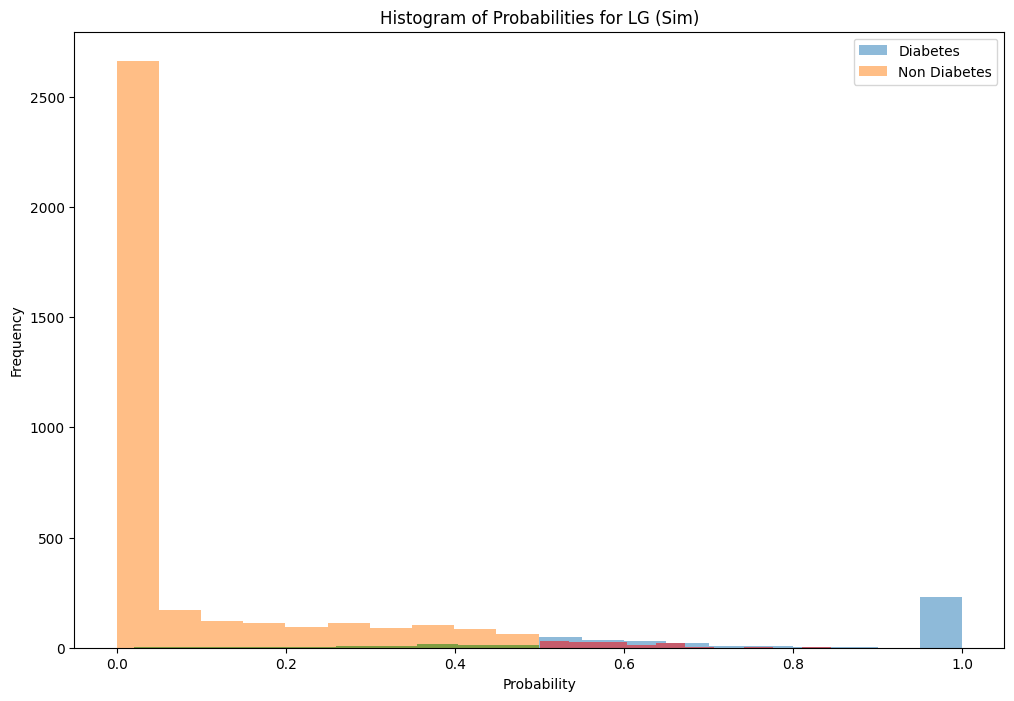

In [ ]:
#plt.hist(GB_true_labels_pred_3_probability, bins=10, edgecolor='black')
plt.figure(figsize = (12, 8))

# Create a histogram for sick probabilities
plt.hist(diabetes_LG, bins = 10, alpha = 0.5, label = 'Diabetes')

plt.hist(non_diabetes_LG, bins = 10, alpha = 0.5, label = 'Non Diabetes')

plt.hist(false_positive_LG, bins = 10, alpha = 0.5, color = "red")

plt.hist(false_negative_LG, bins = 10, alpha = 0.5, color = "green")

# Adding labels and title
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities for LG (Sim)')
plt.legend()

# Show the plot
plt.show()


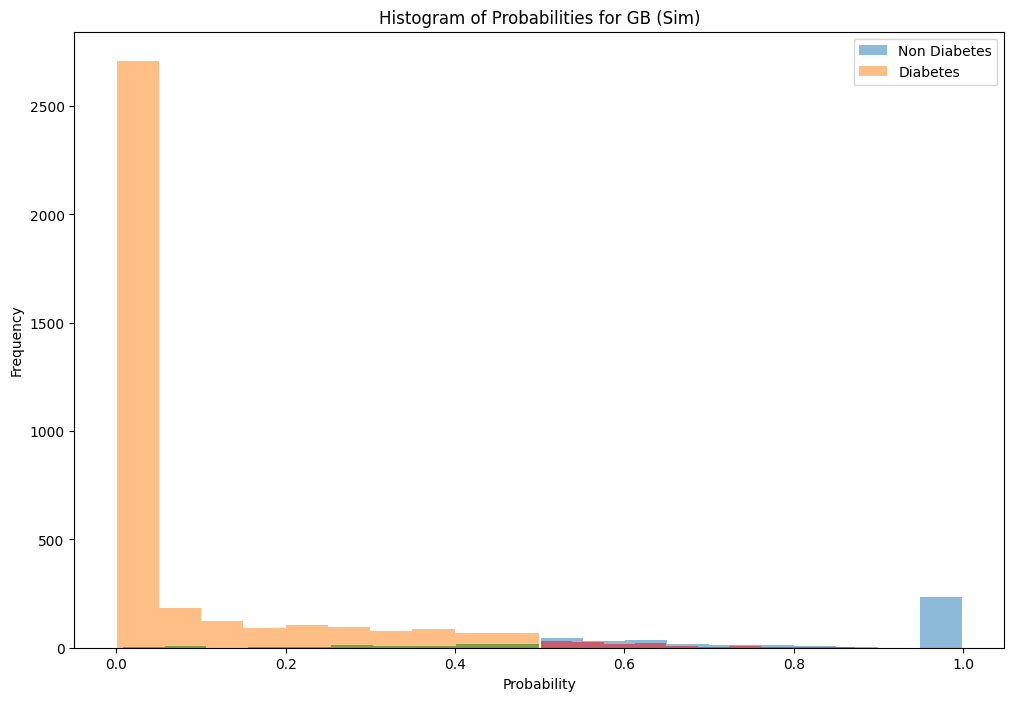

In [ ]:
#plt.hist(GB_true_labels_pred_3_probability, bins=10, edgecolor='black')
plt.figure(figsize = (12, 8))


# Create a histogram for sick probabilities
plt.hist(diabetes_sim_GB, bins = 10, alpha = 0.5, label = 'Non Diabetes')

plt.hist(non_diabetes_sim_GB, bins = 10, alpha = 0.5, label = 'Diabetes')

plt.hist(false_positive_GB, bins = 10, alpha = 0.5, color = "red")

plt.hist(false_negative_GB, bins = 10, alpha = 0.5, color = "green")

# Adding labels and title
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities for GB (Sim)')
plt.legend()

# Show the plot
plt.show()


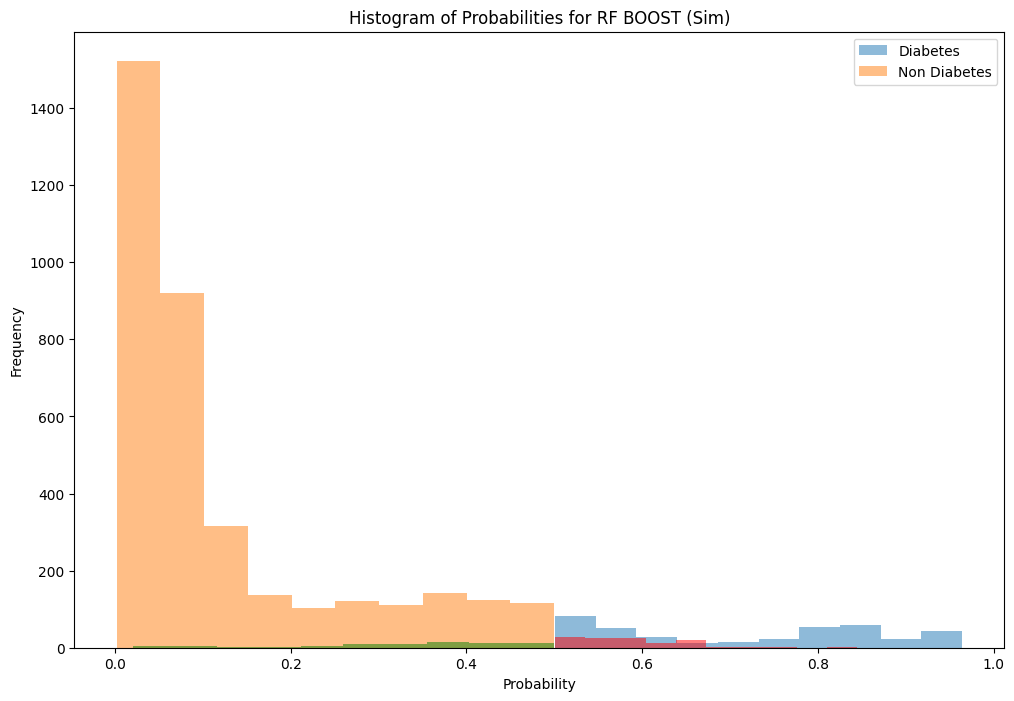

In [ ]:
#plt.hist(GB_true_labels_pred_3_probability, bins=10, edgecolor='black')
plt.figure(figsize = (12, 8))

# Create a histogram for sick probabilities
plt.hist(diabetes_RF, bins = 10, alpha = 0.5, label = 'Diabetes')

plt.hist(non_diabetes_RF, bins = 10, alpha = 0.5, label = 'Non Diabetes')

plt.hist(false_positive_RF, bins = 10, alpha = 0.5, color = "red")

plt.hist(false_negative_RF, bins = 10, alpha = 0.5, color = "green")

# Adding labels and title
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities for RF BOOST (Sim)')
plt.legend()

# Show the plot
plt.show()


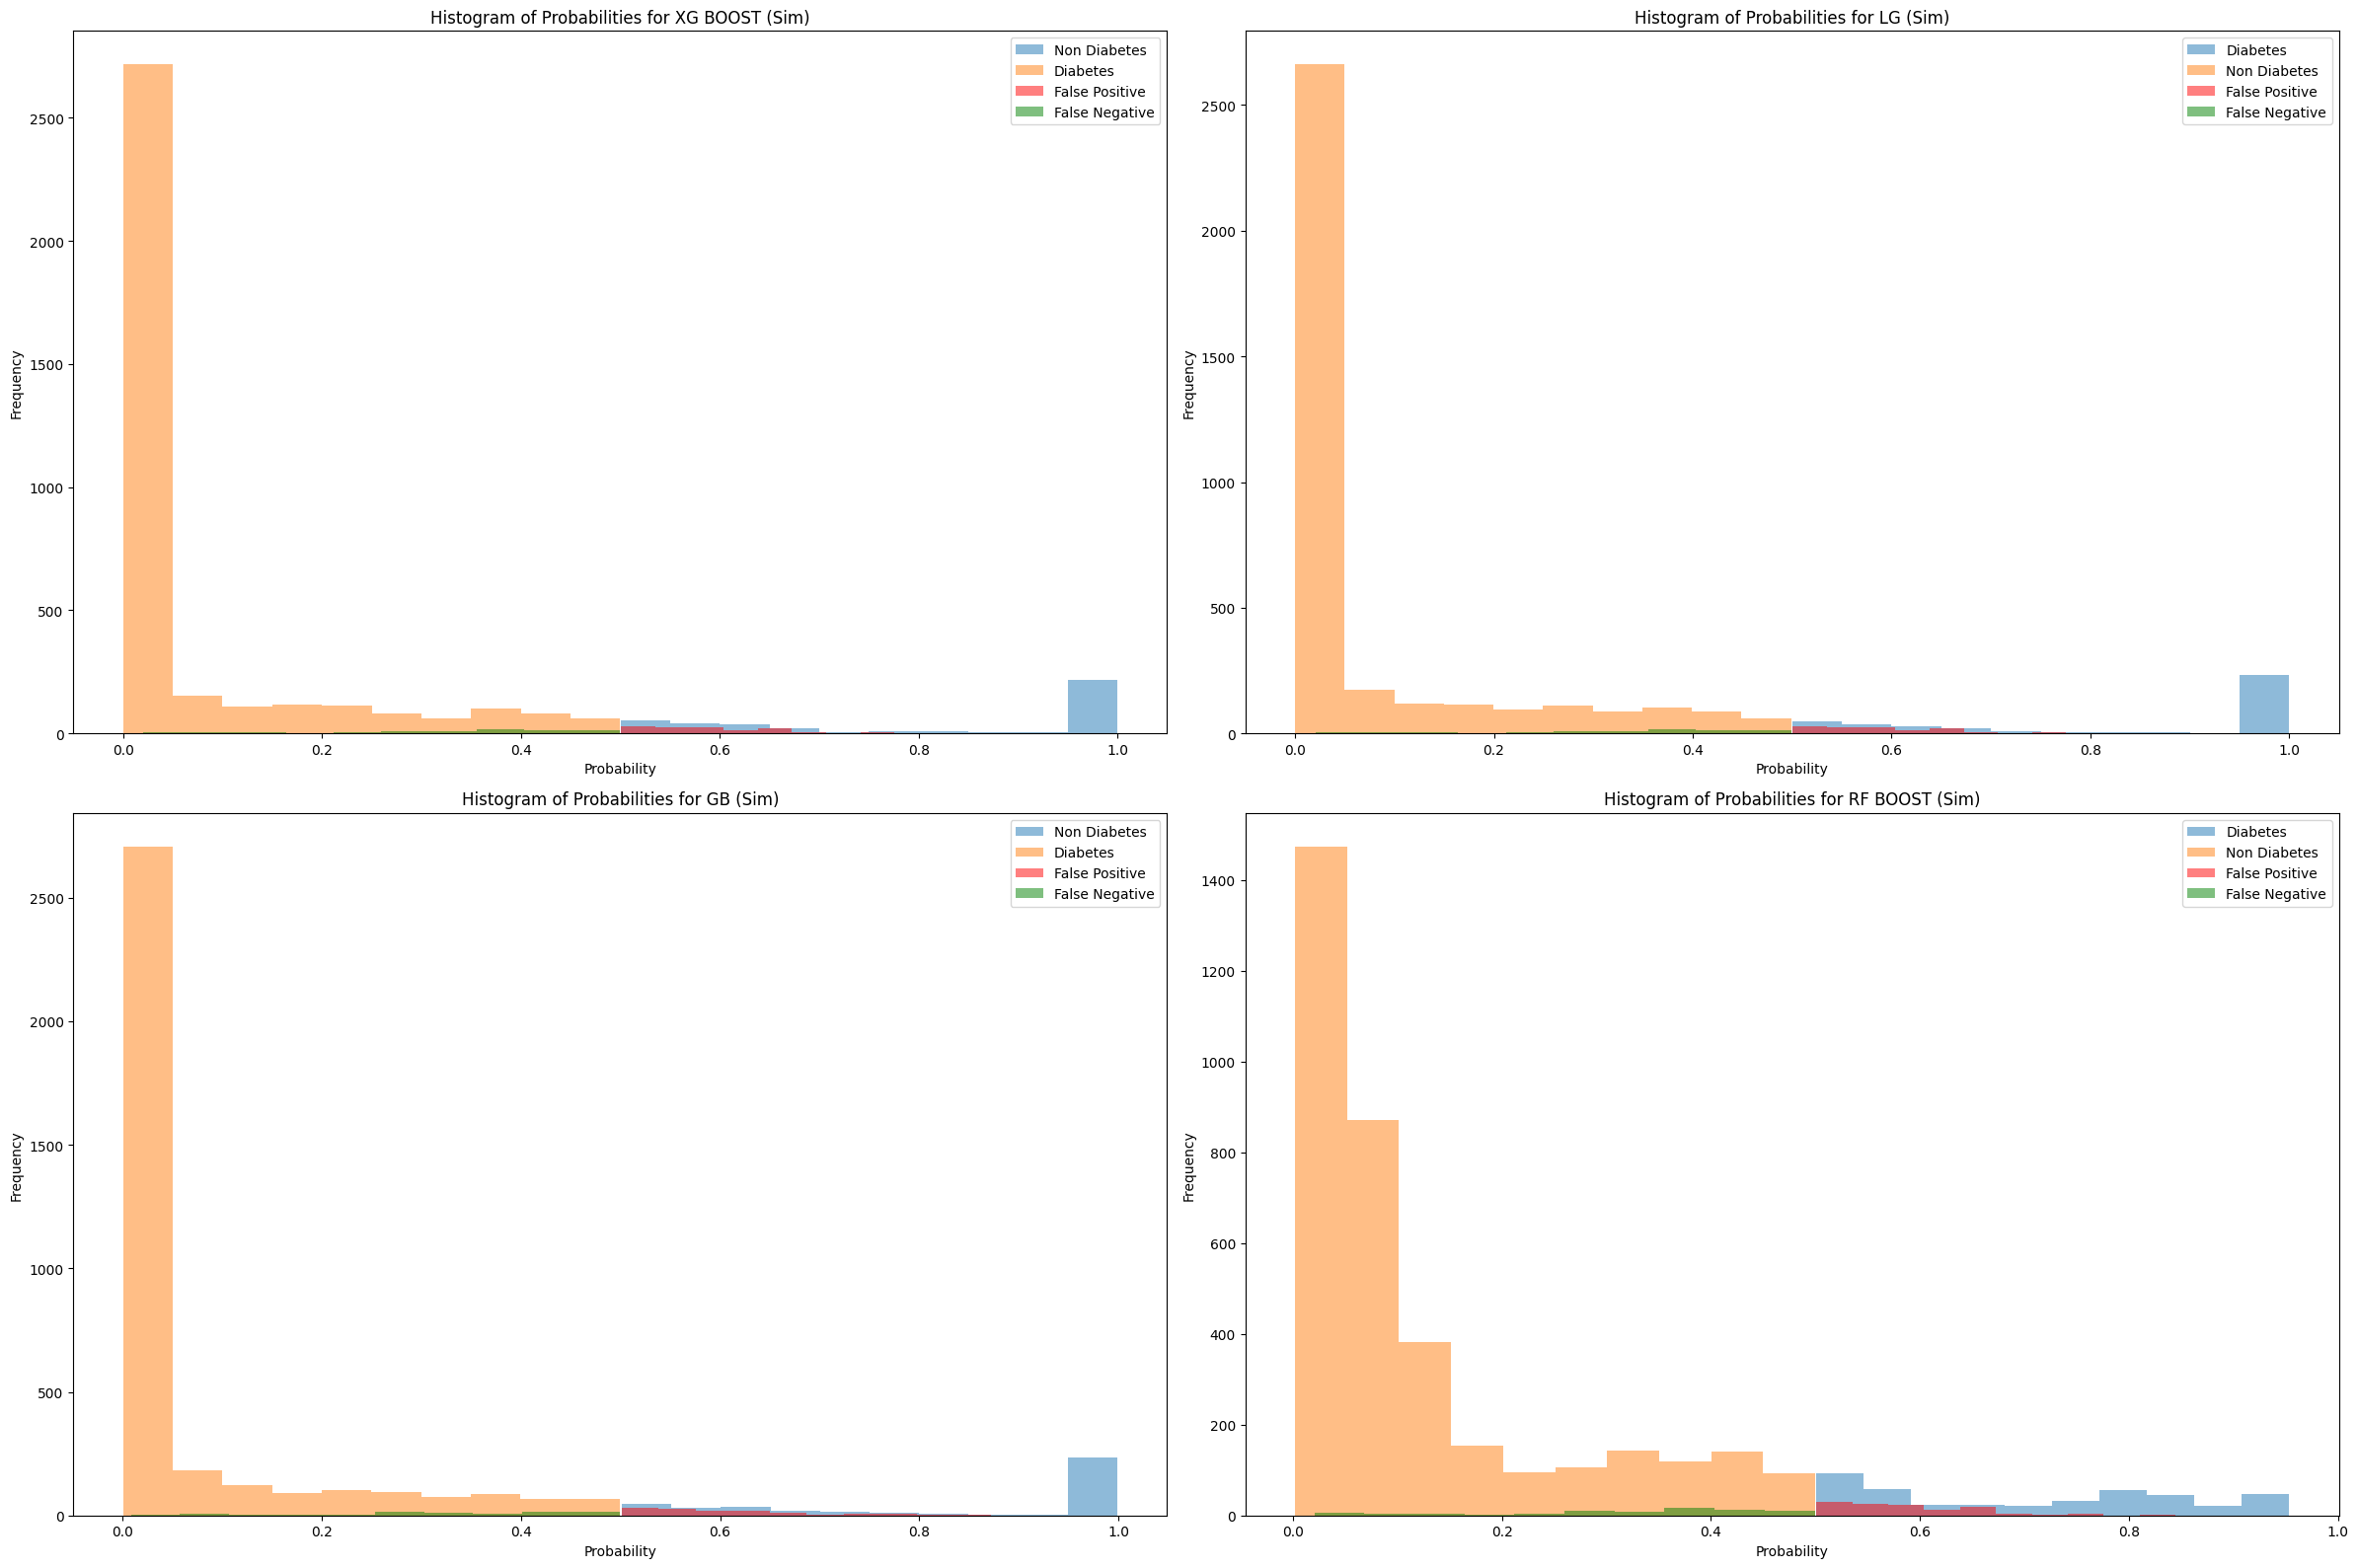

In [ ]:
import matplotlib.pyplot as plt

# Set up a grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 16))

# First histogram for XG BOOST (Sim)
axes[0, 0].hist(diabetes_XB, bins=10, alpha=0.5, label='Non Diabetes')
axes[0, 0].hist(non_diabetes_XB, bins=10, alpha=0.5, label='Diabetes')
axes[0, 0].hist(false_positive, bins=10, alpha=0.5, color="red", label = 'False Positive')
axes[0, 0].hist(false_negative, bins=10, alpha=0.5, color="green", label = 'False Negative')
axes[0, 0].set_title('Histogram of Probabilities for XG BOOST (Sim)')
axes[0, 0].set_xlabel('Probability')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Second histogram for LG (Sim)
axes[0, 1].hist(diabetes_LG, bins=10, alpha=0.5, label='Diabetes')
axes[0, 1].hist(non_diabetes_LG, bins=10, alpha=0.5, label='Non Diabetes')
axes[0, 1].hist(false_positive_LG, bins=10, alpha=0.5, color="red", label = 'False Positive')
axes[0, 1].hist(false_negative_LG, bins=10, alpha=0.5, color="green", label = 'False Negative')
axes[0, 1].set_title('Histogram of Probabilities for LG (Sim)')
axes[0, 1].set_xlabel('Probability')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Third histogram for GB (Sim)
axes[1, 0].hist(diabetes_sim_GB, bins=10, alpha=0.5, label='Non Diabetes')
axes[1, 0].hist(non_diabetes_sim_GB, bins=10, alpha=0.5, label='Diabetes')
axes[1, 0].hist(false_positive_GB, bins=10, alpha=0.5, color="red", label = 'False Positive')
axes[1, 0].hist(false_negative_GB, bins=10, alpha=0.5, color="green", label = 'False Negative')
axes[1, 0].set_title('Histogram of Probabilities for GB (Sim)')
axes[1, 0].set_xlabel('Probability')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Fourth histogram for RF BOOST (Sim)
axes[1, 1].hist(diabetes_RF, bins=10, alpha=0.5, label='Diabetes')
axes[1, 1].hist(non_diabetes_RF, bins=10, alpha=0.5, label='Non Diabetes')
axes[1, 1].hist(false_positive_RF, bins=10, alpha=0.5, color="red", label = 'False Positive')
axes[1, 1].hist(false_negative_RF, bins=10, alpha=0.5, color="green", label = 'False Negative')
axes[1, 1].set_title('Histogram of Probabilities for RF BOOST (Sim)')
axes[1, 1].set_xlabel('Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Feature Importance

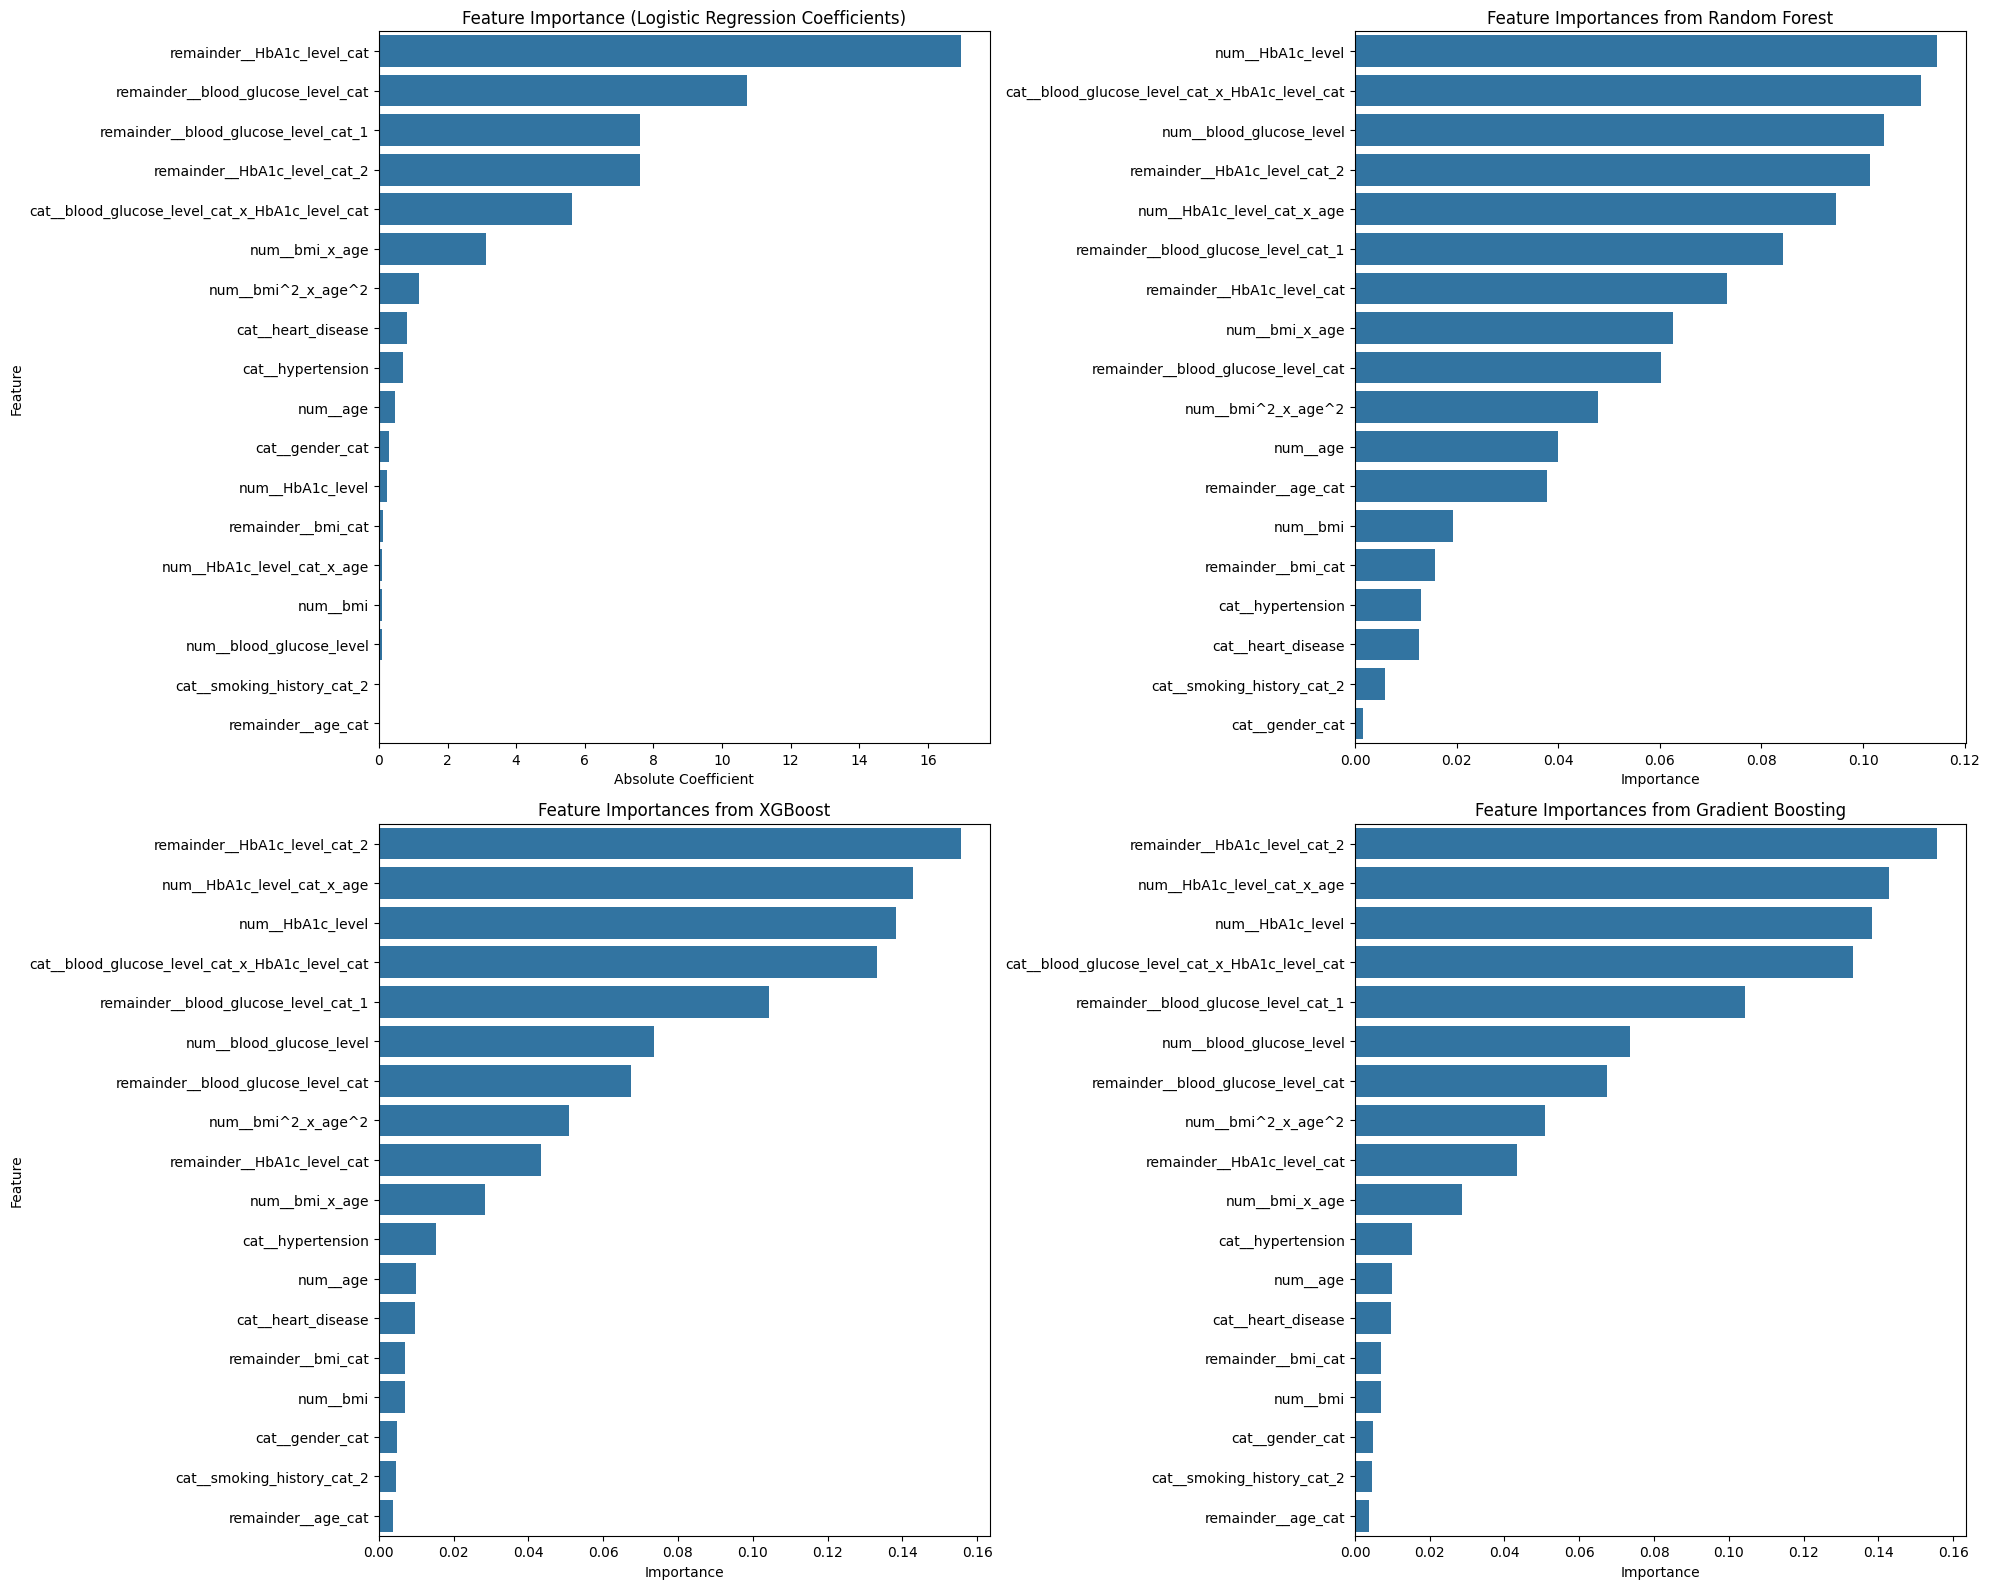

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the following variables are already defined and sorted:
# feature_importance_LG (Logistic Regression)
# feature_importance_RF (Random Forest)
# feature_importance_XGB (XGBoost)
# feature_importance_GB (Gradient Boosting)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

# Logistic Regression Feature Importance
sns.barplot(ax=axes[0, 0], x='Absolute Coefficient', y='Feature', data=feature_importance_LG)
axes[0, 0].set_title('Feature Importance (Logistic Regression Coefficients)')
axes[0, 0].set_xlabel('Absolute Coefficient')
axes[0, 0].set_ylabel('Feature')

# Random Forest Feature Importance
sns.barplot(ax=axes[0, 1], x='Importance', y='Feature', data=feature_importance_RF)
axes[0, 1].set_title('Feature Importances from Random Forest')
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_ylabel('')

# XGBoost Feature Importance
sns.barplot(ax=axes[1, 0], x='Importance', y='Feature', data=feature_importance_XGB)
axes[1, 0].set_title('Feature Importances from XGBoost')
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_ylabel('Feature')

# Gradient Boosting Feature Importance
sns.barplot(ax=axes[1, 1], x='Importance', y='Feature', data=feature_importance_GB)
axes[1, 1].set_title('Feature Importances from Gradient Boosting')
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
